 *Relazione di Laboratorio*

# Laboratorio di Simulazione Numerica #
Leonardo Giovanni Sartori, Dipartimento di Fisica, Università degli Studi di Milano

### Indice
[Introduzione](##Introduzione)

[1.  Un generatore di numeri casuali per...](###-1)

[2.  Campionamenti importanti](###-2)

[3.  Opzioni di Valore](###-3)

[4.  Dinamiche un po' caotiche](###-4)

[6.  Easying](###-6)

[7.  Backtracking](###-7)

[8.  Less is more](###-8)

[9.  Selezioni artificiali](###-9)

[10. Piani vacanze paralleli](###-10)

[11. Sbagliando si impara](###-11)

[12. Agnizione](###-12)
 

## Introduzione <a id='#Introduzione'></a>

In questa relazione di laboratorio si troveranno esposti in forma discorsiva i principali risultati ottenuti durante le 12 esercitazioni del corso di "*Laboratorio di Simulazione Numerica*". Questi risultati sono corredati di grafici e introduzioni, spesso intuitive, all'argomento trattato condite da un sano (ma sobrio) umorismo per rendere più agevole la lettura (per chi affronta per la prima volta questi argomenti o per chi si ritrova a correggerli ennesimamente). 

Nel corso della lettura risulterà chiaro come la *simulazione*, in passato snobbata semplicisticamente dai teorici e diffidata dagli sperimentali, sia oggi diventata una vera e propria *terza via* della ricerca scientifica, permettendo la soluzione di problemi altrimenti irrisolvibili. Apparirà inoltre chiaro il peso che le tecniche affrontate rivestono anche al di fuori della ricerca fino a caratterizzare oggi fortemente la vita di tutti i giorni (e ancor più, probabilmente, quella degli anni a venire).

Il tutto a partire da un generatore di numeri pseudo-casuali (GNC) fornito alla prima lezione.

## 1.  Un generatore di numeri casuali per... <a id='##-1'></a>

### 1.1 Un test preliminare

Andiamo a testare la bontà del nostro generatore verificando innanzitutto le sue capacità nell'affrontare una semplice integrazione MonteCarlo. 
L'integrale in questione è la stima del valor medio di una variabile distribuita uniformemente tra $0$ e $1$:
$ \langle r  \rangle= \int_0^1 r dr = \frac{1}{2}$, che può essere ottenuta generando uniformente reali nel dominio di integrazione e mediando i valori di $f(x)$ corrispondenti.

Come spesso avverrà all'interno di questo lavoro, i valori medi e le rispettive incertezze saranno calcolati per mezzo del metodo del **data blocking** o **media a blocchi**: un campione di $M$ passi MonteCarlo (nel nostro caso le valutazioni della funzione $f(r)$) viene suddiviso in $N$ blocchi di uguale lunghezza e, successivamente, per ciascuno di questi $N$ blocchi viene calcolato un valore medio $\langle f(r) \rangle _ i$, il quale ci consente di calcolare una deviazione standard delle medie dei blocchi come:
    $$\sigma_N = \sqrt{\frac{1}{N-1}\bigg[\frac{1}{N}\sum_{i=1}^N\langle f(r) \rangle _ i^2-\bigg(\frac{1}{N}\sum_{i=1}^N\langle f(r) \rangle _ i\bigg)^2\bigg]}$$
L'utilizzo di questo metodo non solo ci permette di avere una **stima progressiva** di valor medio e incertezza all'aumentare del numero di blocchi, ma ci permette anche di **abbattere** eventuali **correlazioni nascoste** tra misure successive nel momento in cui si considerano blocchi abbastanza grandi (nella fattispiece più grandi della lunghezza di correlazione tra le misure considerate, per una trattazione più approfondità si rimanda alla [Sezione 7](##7)).

Andiamo quindi a vedere come è andato il test:

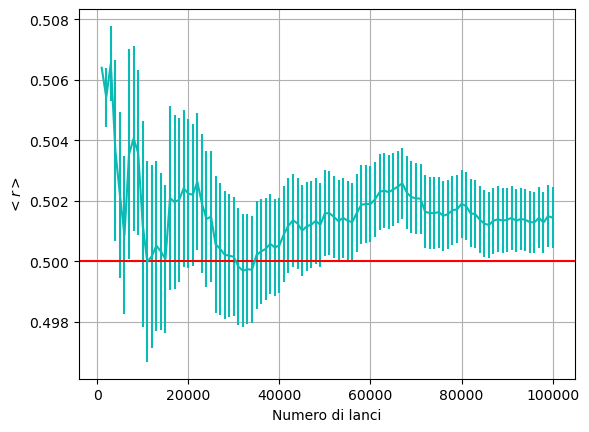

r medio (atteso 0.5): 
0.501438

Errore statistico : 
0.00101189


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# leggiamo i dati dal file data.dat
data = np.loadtxt("LSN_lecture_01/data1.dat")

# estraiamo le tre colonne
x = data[:,0]
y = data[:,1]
err = data[:,2]

# creiamo il grafico a barre
plt.errorbar(x,y,yerr=err, color = '#0ABAB5')
plt.axhline(y=0.5, color = 'r', linestyle = '-')
plt.xlabel('Numero di lanci')
plt.ylabel('$<r>$')
plt.grid(True)
plt.show()

print('r medio (atteso 0.5): ')
print(y[-1])
print('\nErrore statistico : ')
print(err[-1])

Osserviamo che, con $M=100000$ passi, impiegando $N=100$ blocchi riusciamo a ottenere una stima accurata al centesimo, con un errore inferiore alle $1.5~\sigma$.

Tramite la sua definizione come *secondo momento centrale*, sappiamo che, nel nostro caso di campionamento uniforme ( $p(x) = 1$ ), la varianza è data da $\sigma^2=\int_0^1 dr \big(r-\frac{1}{2}\big)^2=\frac{1}{12}$. Sempre con il metodo del data blocking andiamo quindi a valutare il valore progressivo della varianza e verificarne la convergenza al valor vero:

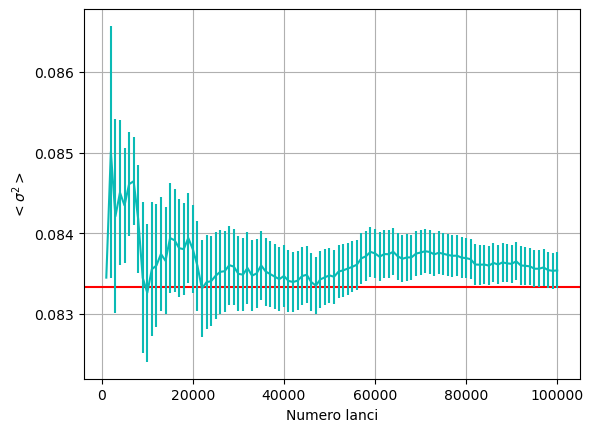

Varianza (attesa 1/12 = 0.8333 ca): 
0.0835406

Errore statistico : 
0.000222892


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# leggiamo i dati dal file data.dat
data = np.loadtxt("LSN_lecture_01/data2.dat")

# estraiamo le tre colonne
x = data[:,0]
y = data[:,1]
err = data[:,2]

# creiamo il grafico a barre
plt.axhline(y=1/12, color = 'r', linestyle = '-')
plt.errorbar(x,y,yerr=err, color = '#0ABAB5')
plt.xlabel('Numero lanci')
plt.ylabel('$<\sigma^2>$')
plt.grid(True)
plt.show()

print('Varianza (attesa 1/12 = 0.8333 ca): ')
print(y[-1])
print('\nErrore statistico : ')
print(err[-1])

Osserviamo anche qui la corretta convergenza dei valori simulati, con una accuratezza al centesimo e un errore di poco inferiore alle $1~\sigma$.

Questi dati sono quindi incoraggianti e ci spingono a pensare che, effettivamente, il nostro **generatore** sia piuttosto **uniforme**. Seppur in statistica sia impossibile provare che certi eventi casuali siano estratti da una determinata distribuzione, possiamo verificare che, nel nostro caso, la probabilità che ciò non sia vero sia in realtà piuttosto bassa.

Un buona verifica di questo fatto potrebbe essere data dal **test del $\chi^2$ di Pearson**, che, ad un set di dati, associa un numero $\chi^2$ dato da: 
$$\chi^2 = \sum_{i=1}^M \frac{\left(O_i - E_i \right)^2}{E_i}$$

Dove $O_i$ è l'i-esimo valore osservato, mentre $E_i$ è il'i-esimo valore atteso. 

Dividendo l'intervallo $[0;1)$ in $M = 100$ bin ed effettuando $n = 10000$ estrazioni, possiamo andare a confrontare il numero di occupazione dell'i-esimo bin $n_i$ con il suo valore atteso nel caso in cui il generatore fosse uniforme, in modo da ottenere:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

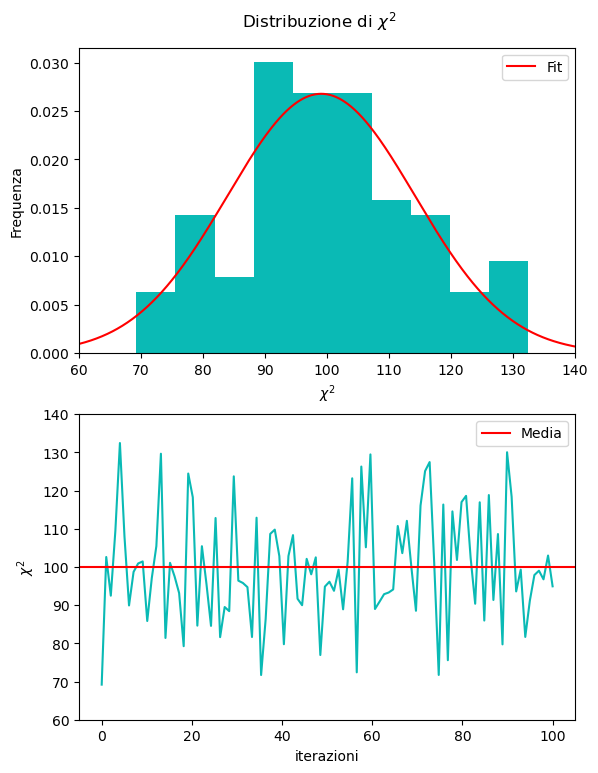

Fit Gaussiano
Chi2 medio (Atteso 100): 
99.04075786762088


Chi2 medio (Atteso 100): 
99.899928

Varianza (Atteso 200): 
212.061571038016

Errore statistico (Atteso 14.1): 
14.562333983191568


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Legge i dati da file
Chi2 = np.loadtxt("LSN_lecture_01/data3.dat")


fig, (ax1, ax2) = plt.subplots(2)

# Crea l'istogramma
n, bins, patches = ax1.hist(Chi2, bins=10, density=True, color='#0ABAB5')

#Definisce la gaussiana per il fit
def gauss(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean)**2 / (2 * stddev**2)))

# definisci i valori iniziali dei parametri del fit
p0 = [1.0, 100., 10.]

# calcola il centro di ciascun bin
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# fai il fit chi2 dei dati
params, _ = curve_fit(gauss, bin_centers, n, p0)

# Calcola il centro delle barre dell'istogramma
x = np.linspace(60, 140, 1000)

# Disegna la distribuzione Chi-quadro
ax1.plot(x, gauss(x, *params), 'r-', label='Fit')

# Aggiunge le etichette
fig.suptitle("Distribuzione di $\chi^2$")
ax1.set_xlabel("$\chi^2$")
ax1.set_ylabel("Frequenza")
ax1.set_xlim(60, 140)
ax1.legend()

# Disegna l'andamento all'aumentare dell'iterazioni
x = np.linspace(0, 100, 100)
ax2.plot(x, Chi2, color='#0ABAB5')
ax2.set_ylim(60, 140)

# Calcola media e varianza
mean = np.mean(Chi2)
var = np.var(Chi2)
ax2.axhline(y=mean, color = 'r', linestyle = '-', label = 'Media')
ax2.set_ylabel("$\chi^2$")
ax2.set_xlabel("iterazioni")
ax2.legend()

# Mostra il grafico
plt.subplots_adjust(bottom=-0.5, right=0.9, top=0.9)
plt.show()

# Stampa media e varianza
# Stampa media del fit
print('Fit Gaussiano')
print("Chi2 medio (Atteso 100): ")
print(params[1])

print("\n\nChi2 medio (Atteso 100): ")
print(mean)
print("\nVarianza (Atteso 200): ")
print(var)
print("\nErrore statistico (Atteso 14.1): ")
print(var**0.5)

Abbiamo quindi ripetuto $100$ iterazioni di questo test e raccolto i valori di $\chi^2$ ottenuti in un istogramma, il cui profilo richiama fortemente una gaussiana centrata in $n/M=100$.

Consultando le [proprietà della distribuzione $\chi^2$](https://en.wikipedia.org/wiki/Chi-squared_distribution) otteniamo che, nel nostro caso, $\langle\chi^2\rangle = n/M = 100$, mentre $\sigma^2 = 2n/M = 200$. 
Possiamo osservare il $\chi^2$ simulato è compatibile con quello vero in un range di meno di $0.01~\sigma$, mentre l'errore statistico presenta un errore relativo $\approx 1 \%$, fatto che ci permette di concludere con una buona sicurezza che quello impiegato è veramente un **generatore uniforme di numeri pseudo-casuali**.

### 1.2 Un test più elaborato

Appurata la possibilità di generare distribuzioni uniformi di numeri casuali, potrebbe essere utile chiedersi se il nostro generatore, con opportuni accorgimenti, sia in grado di generare **distribuzioni qualsiasi**. 
Per fare ciò eseguiremo un test classico della teoria delle distribuzioni: il **Teorema del Limite Centrale (CLT)**.

L'idea dell'esperimento è la seguente: simulare dei lanci di dadi, ciascuno caratterizzato da una diversa distribuzione di probabilità (per un dado standard la distribuzione dei valori estratti è uniforme, noi consideremo anche dadi esponenziali e lorentziani) e verificare che la media dei valori estratti tende a distribuirsi come una gaussiana, fatto garantito dal CLT.

Mentre nulla deve essere variato nel nostro generatore per simulare un dado standard, alcune correzioni devono essere apportate per simulare gli altri due dadi. Utilizzeremo il metodo dell'**inversa della funzione cumulativa**: sia $p(x)$ una distribuzione di probabilità, possiamo definirne la funzione cumulativa come $F(x)=\int_{-\infty}^xdt~p(t)$. Possiamo dimostrare che la variabile $x=F^{-1}(y)$ è distribuita come $p(x)$ (se y è uniformemente distribuita). Infatti, $$p_x(x)=p_y(y)\bigg(\frac{dx}{dy}\bigg)^{-1}=\frac{dF(x)}{dx}=p(x)$$

Pertanto possiamo fabbricare una variabile $x$ distribuita come $p(x) = \lambda\exp(-\lambda x)$ come $x=-\frac{1}{\lambda}\ln(1-y)$ e una $x$ distribuita come $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ come $x=\Gamma\tan\big[\pi\big(y-\frac{1}{2}\big)\big]$, dove y è sempre una variabile casuale uniformemente distribuita in $[0;1)$.

Ciò detto, andiamo a verificare i risultati:

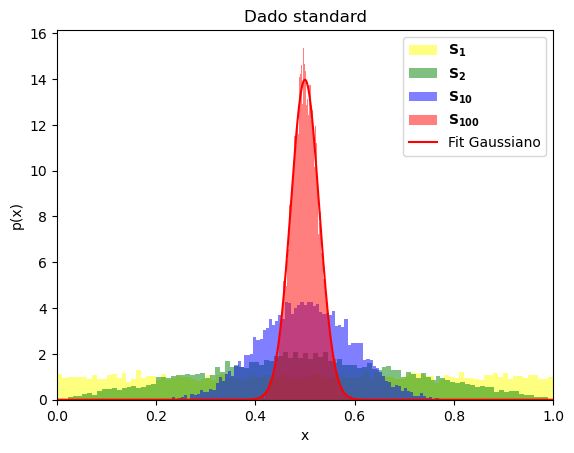

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm

# definiamo alcune quantità utili per il grafico
N =[1, 2, 10, 100]
color = ["yellow", "green", "blue", "red"]
labels = ['$\mathbf{S_1}$','$\mathbf{S_2}$','$\mathbf{S_{10}}$','$\mathbf{S_{100}}$']
bins = 100

# leggi i dati da file e fa l'istogramma
for i in range(4):
    data = np.loadtxt('LSN_lecture_01/Somme_'+str(N[i])+'punti_dado_standard.dat')
    plt.hist(data, bins, alpha = 0.5, color=color[i], density='true', label = labels[i])

# fit gaussiano
parameter = norm.fit(data)       
x = np.linspace(0, 1, bins*10)     
y = norm.pdf(x, *parameter)     
plt.plot(x, y, color = 'red', linestyle = '-', label = "Fit Gaussiano")

# cosmesi
plt.xlabel("x")
plt.ylabel('p(x)')
plt.title("Dado standard")
plt.xlim(0,1)
plt.legend(loc='upper right')

# mostra il grafico
plt.show()

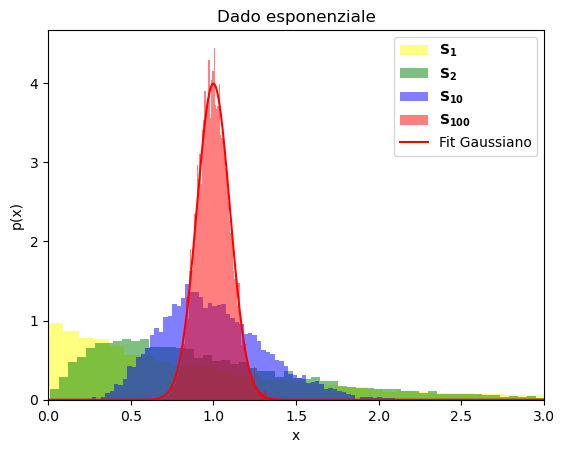

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm

# definiamo alcune quantità utili per il grafico
N =[1, 2, 10, 100]
color = ["yellow", "green", "blue", "red"]
labels = ['$\mathbf{S_1}$','$\mathbf{S_2}$','$\mathbf{S_{10}}$','$\mathbf{S_{100}}$']
bins = 100

# leggi i dati da file e fa l'istogramma
for i in range(4):
    data = np.loadtxt('LSN_lecture_01/Somme_'+str(N[i])+'punti_dado_esponenziale.dat')
    plt.hist(data, bins, alpha = 0.5, color=color[i], density='true', label = labels[i])

# fit gaussiano
parameter = norm.fit(data)       
x = np.linspace(0, 3, bins*10)     
y = norm.pdf(x, *parameter)     
plt.plot(x, y, color = 'red', linestyle = '-', label = "Fit Gaussiano")

# cosmesi
plt.xlabel("x")
plt.ylabel('p(x)')
plt.title("Dado esponenziale")
plt.xlim(0,3)
plt.legend(loc='upper right')

# mostra il grafico
plt.show()

Nei grafici precedenti abbiamo illustrato le distribuzioni seguite dalle medie dei valori estratti dai vari dadi. Si sono valutate $10000$ medie di $1, 2, 10$ e $100$ estrazioni differenti. Possiamo osservare che, nel caso dei dadi standard ed esponenziale, il CLT è rispettato e all'aumentare del numero di estrazioni per media, pur partendo da distribuzioni molto differenti, **le medie tendono a seguire una distribuzione gaussiana**. 

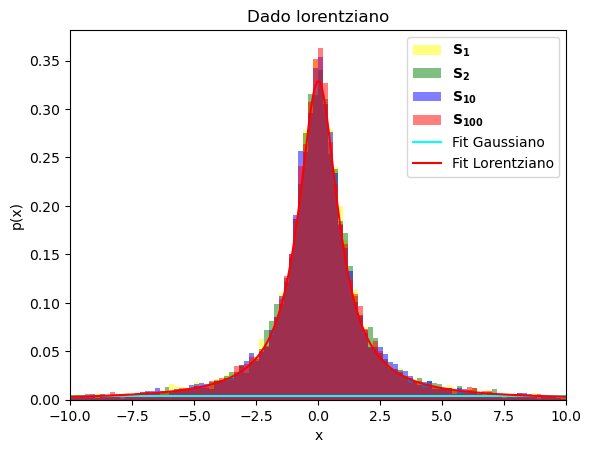

In [6]:
from scipy.stats import cauchy

# leggi i dati da file e fa l'istogramma
for i in range(4):
    data = np.loadtxt('LSN_lecture_01/Somme_'+str(N[i])+'punti_dado_lorentziano.dat')
    plt.hist(data, bins, range = (-10,+10), alpha = 0.5, color=color[i], density='true', label = labels[i])
    # è importante specificare il range, in quanto le code della lorenziana 
    # sono di gran lunga più popolate di quelle di una gaussiana e il programma non sa come collocare i bin

# fit gaussiano
parameter = norm.fit(data)
x = np.linspace(-10, 10, bins*10)  
y = norm.pdf(x, *parameter)
plt.plot(x, y, color = 'cyan', linestyle = '-', label = "Fit Gaussiano")
parameter = cauchy.fit(data)          
y = cauchy.pdf(x, *parameter)     
plt.plot(x, y, color = 'red', linestyle = '-', label = "Fit Lorentziano")


# cosmesi
plt.xlabel("x")
plt.ylabel('p(x)')
plt.title("Dado lorentziano")
plt.xlim(-10,10)
plt.legend(loc='upper right')

# mostra il grafico
plt.show()

Discorso diverso sembra invece valere per il dado lorentziano: il fit gaussiano infatti fallisce manifestamente nell'identificare la distribuzione delle medie, che invece pare restare **lorentziana**. Questo fatto sembrerebbe gettare ombre sulla bontà ed efficacia del nostro generatore, ma in realtà dobbiamo considerare il CLT nel suo enunciato più completo.

Il teorema del limite centrale infatti stabilisce che la distribuzione gaussiana sia un **attrattore** (o **punto fisso**) nello spazio delle funzioni densità di probabilità, ma non impone che questo sia **unico**. Esiste infatti una classe di pdf che appartiene **bacino di attrazione** della distribuzione normale, ma altre pdf invece potrebbero sfuggirvi e crearne uno proprio, come avviene nel caso della distribuzione di Cauchy-Lorentz.

La ragione dell'eccezionalità della lorentziana, infine, risiede nella lunghezza delle sue code, che decadono come leggi di potenza (invece che come esponenziali come avviene nel caso gaussiano) e che la inseriscono nella categoria delle cossidette **distribuzioni stabili**, le quali sono state dimostrate essere un sottoinsieme di tutti gli attrattori dello spazio delle pdf (Levy, Khintchine).

### 1.3 Rodaggio

È quindi giunto il momento di impiegare il nostro GNC per la risoluzione di problemi pratici e per fare questo non c'è scelta migliore che **l'esperimento di Buffon**.

Questo storico esperimento, come si vedrà nel corso dell'esposizione, costituisce un perfetto campo d'azione per il nostro generatore. L'idea è semplice: simulare il lancio di una serie di aghi di lunghezza $L$ su di un pavimento a righe orizzontali (a una distanza $d > L$) e calcolare la probabilità delle intersezioni tra aghi e righe. Questa probabilità dovrebbe equivalere a: $$p=\frac{2L}{\pi d}$$

Come fatto notare da Laplace, questo esperimento, per un gran numero di lanci, può essere utilizzato per una determinazione numerica del valore di **pi greco**. Infatti:
$$\pi =\lim_{N\rightarrow\infty}\frac{2LN_{lanci}}{N_{centri}d}$$

Per simulare il lancio del dato si è estratta prima la posizione della cruna (per i nostri scopi è rilevante solo la posizione verticale, ovvero un numero casuale estratto in $[0;1)$) e la posizione  verticale della punta ( da essa distante $L\sin \theta$). In questo modo però $\theta$ dovrebbe essere un numero casuale estratto in $[0;\pi)$, fatto che ci costringe sostanzialmente  a"barare" e introdurre il valore esatto di $\pi$ nel codice (che stiamo cercando invece di determinare). 


```c++
int lancio ( double L, double d, Random& rnd){
        // l'ago lanciato cade ad una certa y in (0,1)
        double y0 = rnd.Rannyu();
        // e l'altra estremità disterà in verticale L*sin(x) in (-L; L)
        double y1 = y0 + sin(rnd.Rannyu()*DBL_MAX)*L;
        // abbiamo colpito se le due estremità cadono in due strisce differenti
        if(floor(y0/d)!=floor(y1/d)){
            return 1;
        } else {
            return 0;
        }
    }
```


A questo scopo abbiamo invece estratto $\theta$ in un intervallo $[0;$ `DBL_MAX ` $)$, ovvero il massimo numero double rappresentabile dalla macchina $(\sim10^{308})$. Questa scelta introduce a priori una disomogeneità nell'estrazione degli angoli, dal momento che `DBL_MAX ` non è un esatto multiplo di $\pi$, e ne seguirà che i valori di $\theta$ compresi in $[0;$ `DBL_MAX` $\mod \pi)$ saranno estratti idealmente una volta in più rispetto a tutti gli altri. Come è facilmente intuibile però, l'errore sistematico introdotto sarà dell'ordine di $10^{-308}$, pertanto totalmente trascurabile, forse anche più della non-uniformità intrinseca al nostro GNC.

Di seguito rappresentiamo l'andamento progressivo del valore di $\pi$:

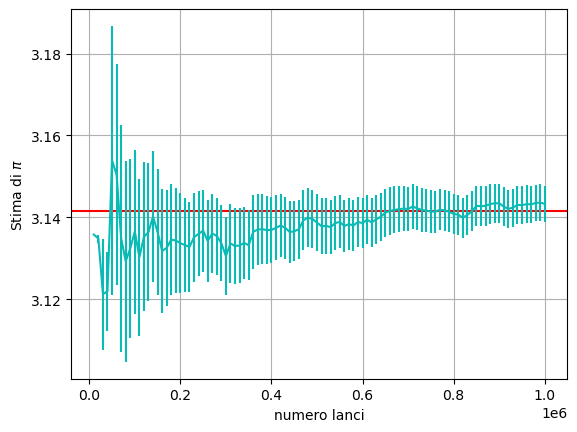

Stima di pi greco: 
3.143283

Errore statistico :
0.00443


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

# leggiamo i dati dal file data.dat
data = np.loadtxt("LSN_lecture_01/buffon.dat")

# estraiamo le tre colonne
x = data[:,0]
y = data[:,1]
err = data[:,2]

# creiamo il grafico a barre
plt.axhline(y=math.pi, color = 'r', linestyle = '-', label = "$\pi$")
plt.errorbar(x,y,yerr=err, color = '#0ABAB5')
plt.xlabel('numero lanci')
plt.ylabel('Stima di $\pi$')
plt.grid(True)
plt.show()

# stampiamo i risultati
print('Stima di pi greco: ')
print(y[-1])
print('\nErrore statistico :')
print(err[-1])

A seguito di $1000000$ divisi in $100$ blocchi, otteniamo una stima di $\pi$ in un intervallo di confidenza di circa $0.4~\sigma$. Un buon risultato.

## 2. campionamenti importanti <a id='##-2'></a>

### 2.1 Un altro integrale

Proviamo ora a svolgere il seguente integrale:
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

Analogamente a quanto fatto nel [problema 1.1](###-1), potremmo sfruttare il nostro GNC uniforme e accumulare valutazioni successive dell'integranda e quindi valutare questo difficilissimo integrale  per $100000$ passi MC divisi in $100$ blocchi, magari illustrando la progressione del risultato con un bel grafico colorato.

Questo sarebbe ciò che otterremmo:

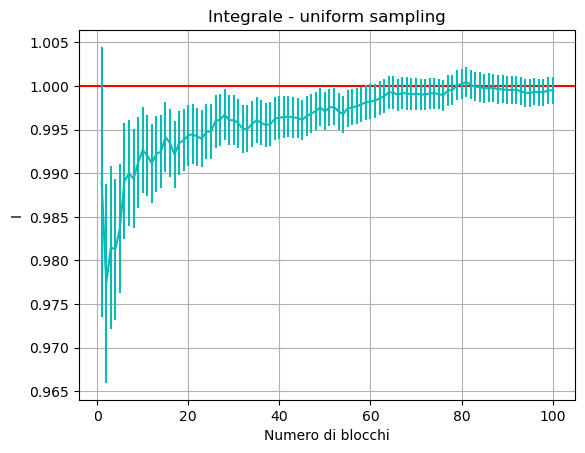

Stima di I (Atteso 1): 
0.999502

Errore statistico :
0.00154082


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# leggi i dati dai file
data1 = np.loadtxt("LSN_lecture_02/integrale_unif.dat")


# estraiamo le tre colonne
x1 = data1[:,0]/1000
y1 = data1[:,1]
err1 = data1[:,2]

# creiamo il grafico a barre
plt.axhline(y=1, color = 'r', linestyle = '-')
plt.errorbar(x1,y1,yerr=err1, color = '#0ABAB5')
plt.xlabel('Numero di blocchi')
plt.ylabel('I')
plt.grid(True)
plt.title('Integrale - uniform sampling')
plt.show()

# stampiamo i risultati
print('Stima di I (Atteso 1): ')
print(y1[-1])
print('\nErrore statistico :')
print(err1[-1])

Un risultato dignitosissimo, precisione al millesimo e un intervallo di confidenza di poco più di $0.3~\sigma$, ma la domanda potrebbe essere: è possibile migliorare?

La risposta è chiaramente sì. Finora abbiamo sempre utilizzato ascisse uniformemente distribuite per svolgere il nostro integrale, ma potremmo modificare il nostro sampling di variabili casuali in modo da rendere l'integrazione più intelligente. La nostra idea sarebbe quella di campionare una variabile distribuita come $\frac{\pi}{2}\cos(\pi x/2)$ e calcolare l'integrale:
$$\int_0^1 1~\left(\frac{\pi}{2}\cos(\pi x/2) xdx\right) $$
l'integranda in questo modo diventa la *funzione costante* e la stima dell'integrale prevede l'accumulo di valori valori simili tra loro (in questo caso tutti 1) e quindi con iuna deviazione standard minore (in questo caso nulla).  Una scelta di compromesso prevede il campionamento secondo una distribuzione distribuita in modo simile all'integranda, un sampling di questo tipo viene chiamato **importance sampling** e, come spiegato, permette integrazioni più veloci e precise.

Una scelta intelligente per la nostra nuova $p(x)$ (che ricordiamo deve essere definita positiva, normalizzata e, possibilmente, facilmente invertibile!) può essere una banale linearizzazione della *funzione coseno*.
$$p(x) = 2(1-x)$$

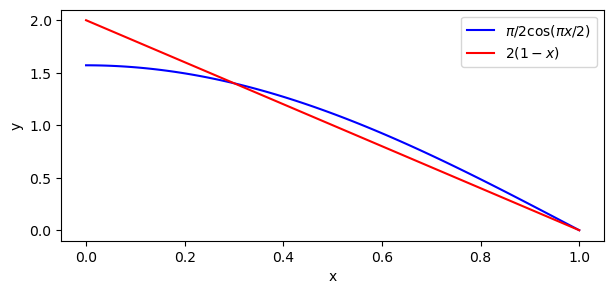

In [9]:
x = np.linspace(0, 1, 100)  
y = np.pi/2*np.cos(np.pi*x/2.)
y1 = 2*(1-x)

fig=plt.figure(figsize=(7,3))
plt.plot(x, y, color = 'blue', label='$\pi/2\cos(\pi x/2)$')
plt.plot(x, y1, color = 'red', label='$2(1-x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Che porta il nostro integrale ad assumere la forma:
$$I = \int_0^1 \frac{\pi}{2}\frac{\cos(\pi x/2)}{2(1-x)}~2(1-x)dx = 1$$
Ma si tratta di una complicazione solo apparente, infatti:

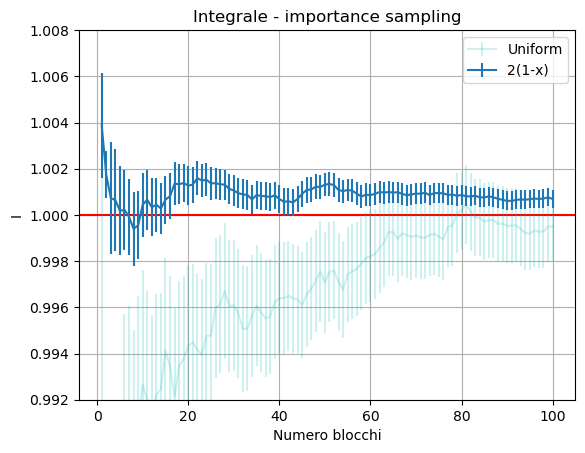

Stima di I (Atteso 1): 
1.00069

Errore statistico :
0.000387552


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# leggi i dati dai file
data1 = np.loadtxt("LSN_lecture_02/integrale_unif.dat")
data2 = np.loadtxt("LSN_lecture_02/integrale_imp.dat")

# estraiamo le tre colonne
x1 = data1[:,0]/1000
y1 = data1[:,1]
err1 = data1[:,2]
x2 = data2[:,0]/1000
y2 = data2[:,1]
err2 = data2[:,2]

# creiamo il grafico a barre
plt.axhline(y=1, color = 'r', linestyle = '-')
plt.errorbar(x1,y1,yerr=err1, label='Uniform', alpha=0.2, color = '#0ABAB5')
plt.errorbar(x2,y2,yerr=err2, label='2(1-x)')
plt.xlabel('Numero blocchi')
plt.ylabel('I')
plt.ylim(0.992, 1.008)
plt.grid(True)
plt.legend()
plt.title('Integrale - importance sampling')
plt.show()

# stampiamo i risultati
print('Stima di I (Atteso 1): ')
print(y2[-1])
print('\nErrore statistico :')
print(err2[-1])

Osserviamo una minore varianza e una maggiore velocità di convergenza a parità di punti campionati, il metodo è quindi complessivamente numericamente più efficiente, pur utilizzando una approssimazione molto grossolana della funzione coseno.

Allo stesso modo ci aspetteremmo quindi che, impiegando come pdf una funzione drasticamente diversa dalla coseno, otterremmo risultati fortemente più imprecisi. Questo è risultato per $p(x) = \frac{\pi}{2}\sin(\pi x/2)$:

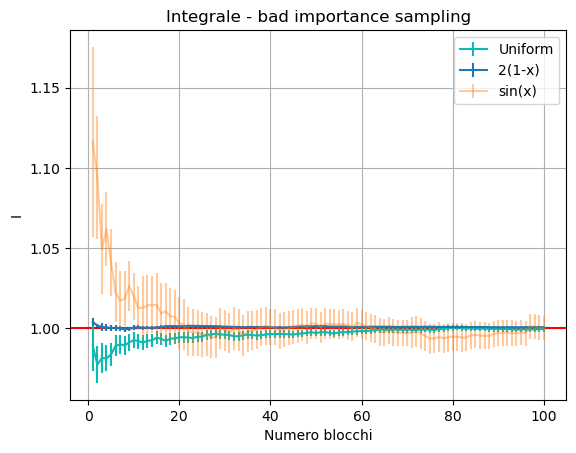

Stima di I (Atteso 1): 
1.00013

Errore statistico :
0.00756954


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# leggi i dati dai file
data1 = np.loadtxt("LSN_lecture_02/integrale_unif.dat")
data2 = np.loadtxt("LSN_lecture_02/integrale_imp.dat")
data3 = np.loadtxt("LSN_lecture_02/integrale_bad.dat")


# estraiamo le tre colonne
x1 = data1[:,0]/1000
y1 = data1[:,1]
err1 = data1[:,2]
x2 = data2[:,0]/1000
y2 = data2[:,1]
err2 = data2[:,2]
x3 = data3[:,0]/1000
y3 = data3[:,1]
err3 = data3[:,2]

# creiamo il grafico a barre
plt.axhline(y=1, color = 'r', linestyle = '-')
plt.errorbar(x1,y1,yerr=err1, label='Uniform', color = '#0ABAB5')
plt.errorbar(x2,y2,yerr=err2, label='2(1-x)')
plt.errorbar(x3,y3,yerr=err3, label='sin(x)', alpha=0.4)
plt.xlabel('Numero blocchi')
plt.ylabel('I')
plt.grid(True)
plt.legend()
plt.title('Integrale - bad importance sampling')
plt.show()

# stampiamo i risultati
print('Stima di I (Atteso 1): ')
print(y3[-1])
print('\nErrore statistico :')
print(err3[-1])

Dove possiamo notare una convergenza decisamente più lenta ed una varianza drasticamente più alta.

### 2.2 Viaggiatori ubriachi

Non farà scandalo la dichiarazione seguente: vorremmo utilizzare il calcolo stocastico per fare della **Fisica**.

Come vedremo, esiste un'ampia classe di problemi fisici in cui la ricerca di una soluzione numerica è di gran lunga preferibile a quella di una soluzione analitica, anche solo per il numero di gradi di libertà coinvolti. Ne sono un esempio particolare problemi di **dinamica molecolare** ([problemi 4](###-4)[ e 7](###-7)) o **meccanica quantistica** ([problemi 6](###-6)[ e 8](###-8)), ma non mancano le applicazioni ad altre discipline come ad esempio l'**econofisica** ([problema 3](###-3)) e, in generale, **problemi di ottimizzazione** ([problemi 9](###-9)[ e 10](###-10)) e **machine learning** ([problemi 11](###-11)[ e 12](###-12)).

Elementi base per la risoluzione di ciascuno di questi problemi sono i cossiddetti **random walks (RW)**, che non sono altro che la formalizzazione matematica di una traiettoria nello spazio costituita di passi ogni volta casuali. L'utilizzo dei RW, come vedremo, permette di simulare l'evoluzione casuale di un determinato sistema fisico a partire da una condizione iniziale e, per mezzo dell'aggiunta di opportuni vincoli, può, ad esempio, simularne un evoluzione caotica, ma fisicamente consistente (come ad esempio l'*agitazione termica*).

Testiamo quindi il nostro GNC e sottoponiamogli il calcolo di due semplici RW: uno su di un reticolo cubico (passo uno) e un altro nel continuo (con passi unitari).

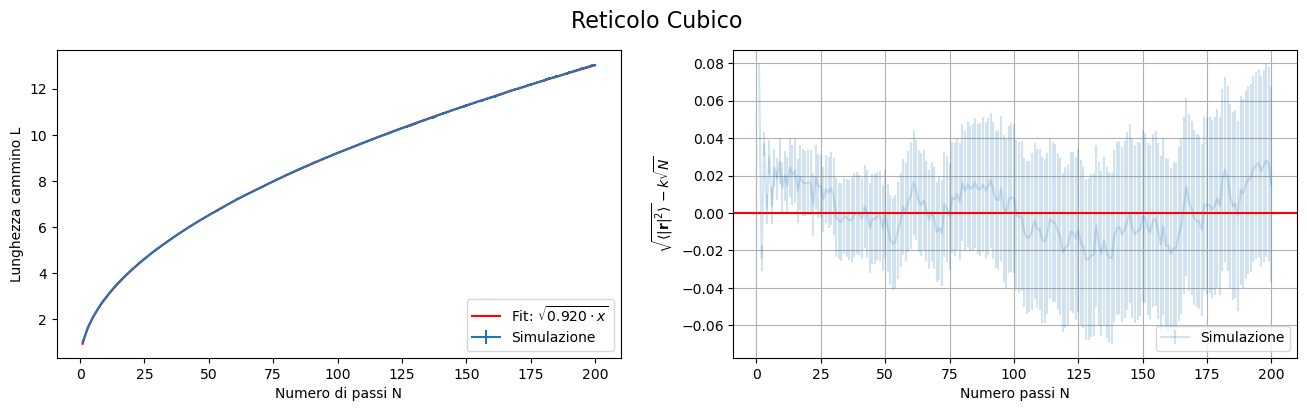

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# definiamo la funzione di fit
def func(x, a):
    return a * np.sqrt(x)

# leggi i dati dai file
data1 = np.loadtxt("LSN_lecture_02/rw_cubico.dat")

# estraiamo le tre colonne
x1 = data1[:,0]
y1 = data1[:,1]
err1 = data1[:,2]

# effettuiamo il fit dei dati
popt, pcov = curve_fit(func, x1, y1)

# crea una figura con due subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# creiamo il grafico a barre
axs[0].errorbar(x1, y1, yerr=err1, label= 'Simulazione')
axs[0].plot(x1, func(x1, *popt), 'r-', label='Fit: $\sqrt{%5.3f\cdot x}$' % tuple(popt))
axs[0].set_xlabel('Numero di passi N')
axs[0].set_ylabel('Lunghezza cammino L')
axs[0].legend(loc='lower right')

# creiamo il grafico degli errori
axs[1].errorbar(x1, y1-func(x1, *popt), yerr=err1, label= 'Simulazione', alpha= 0.2)
axs[1].axhline(y=0, color = 'r', linestyle = '-')
axs[1].set_xlabel('Numero passi N')
axs[1].set_ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$')
axs[1].legend(loc='lower right')

# centra il titolo
fig.suptitle('Reticolo Cubico', fontsize=16)

plt.grid(True)
plt.show()

Abbiamo quindi fatto eseguire al nostro GNC la simulazione di $10000$ RW di $200$ passi e abbiamo stimato le incertezze per ciascuno dei passi per mezzo della media blocchi con 100 blocchi. Di sopra è riportato il risultato per il reticolo cubico, verifichiamo che, come ci aspettiamo, il cammino presenta un **comportamento diffusivo** (ovvero $L=k\sqrt{N}$).

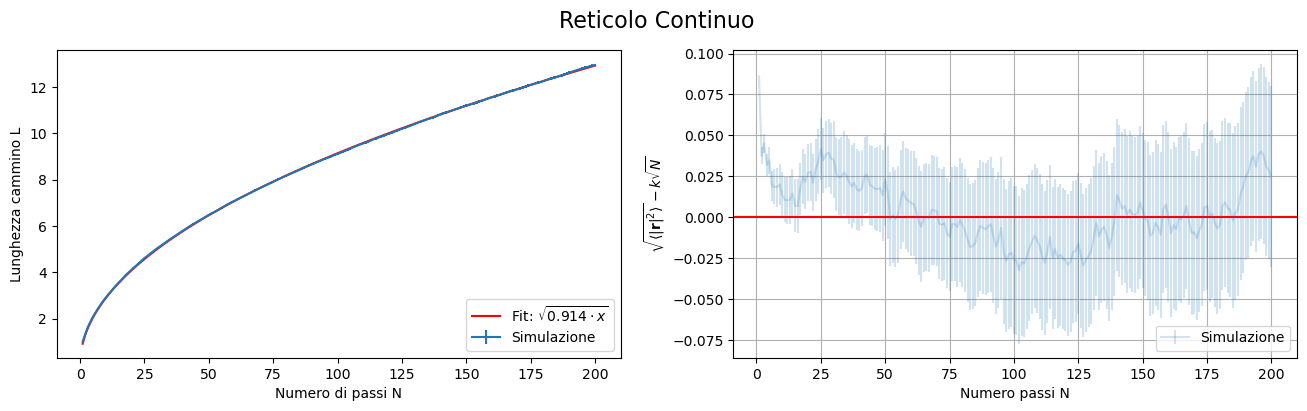

In [13]:
# leggi i dati dai file
data2 = np.loadtxt("LSN_lecture_02/rw_continuo.dat")

# estraiamo le tre colonne
x2 = data2[:,0]
y2 = data2[:,1]
err2 = data2[:,2]

# effettuiamo il fit dei dati
popt, pcov = curve_fit(func, x2, y2)

# crea una figura con due subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# creiamo il grafico a barre
axs[0].errorbar(x2, y2, yerr=err2, label= 'Simulazione')
axs[0].plot(x2, func(x2, *popt), 'r-', label='Fit: $\sqrt{%5.3f\cdot x}$' % tuple(popt))
axs[0].set_xlabel('Numero di passi N')
axs[0].set_ylabel('Lunghezza cammino L')
axs[0].legend(loc='lower right')

# creiamo il grafico degli errori
axs[1].errorbar(x2, y2-func(x2, *popt), yerr=err2, label= 'Simulazione', alpha= 0.2)
axs[1].axhline(y=0, color = 'r', linestyle = '-')
axs[1].set_xlabel('Numero passi N')
axs[1].set_ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$')
axs[1].legend(loc='lower right')

# centra il titolo
fig.suptitle('Reticolo Continuo', fontsize=16)

plt.grid(True)
plt.show()

Stesso discorso può essere fatto anche con il reticolo continuo, dove, oltre a riscontrare sempre la presenza di un comportamento diffusivo, possiamo anche verificare che, per un grande numero di passi, le distanze percorse sono quasi indistinguibili rispetto al caso cubico.

Armati di questo importante strumento possiamo quindi iniziare a svolgere qualche problema più elaborato.

## 3. Opzioni di valore <a id='##-3'></a>

Come anticipato, un'ampia classe di sistemi reali può essere trattata con soddisfazione assumendo che essi siano soggetti a evoluzioni stocastiche ed, in particolare, a **moti browniani**, una classe particolare di RW dove i passi hanno lunghezze indipendenti tra loro e sono identicamente distribuite secondo la distribuzione normale.

È ad esempio il caso della **Teoria di Black e Scholes** per l'attribuzione del prezzo di opzioni europee. La teoria, infatti, assume che l'evoluzione temporale del prezzo di questi prodotti sia analoga ad un **Moto Browniano Geometrico (GBM)**. In questo tipo di moto, una variabile $S(t)$ evolve nel tempo secondo la legge:
$$dS(t)=\mu S(t)dt+ \sigma S(t) dW(t)$$

Dove $W(t)$ è il nostro moto browniano standard, mentre i coefficienti $\mu$ e $\sigma$ vengono chiamati **drift** e **volatilità** e regolano rispettivamente l'ampiezza dell'evoluzione deterministica e stocastica della quantità $S(t)$. Per i nostri scopi $\mu$ sarà fissato uguale al tasso di interesse *risk-free* (il miglior tasso di interesse garantito da una banca per il deposito della somma $S(t)$), la volatilità invece è un parametro più complesso legato in generale alla solidità del prodotto e alle condizioni del mercato.

### 3.1 Una coppetta, solo vaniglia

Nell'esercizio seguente prezzeremo le cosiddette **opzioni put e call** europee. In finanza un'opzione è un contratto tra due (o più) parti di cui una assume un onere mentre l'altra può esercitare un diritto.
L'esempio più semplice è dato dalle opzioni europee o **"plain vanilla"**: chi vende l'opzione (A) garantisce a chi la compra (B) il diritto a comprare ( *call* ) o a vendere ( *put* ) un certo bene ad un prezzo $K$ fissato ad un istante $T$ fissato (scadenza del contratto). Altre opzioni più esotiche invece possono presentare limiti meno stringenti o nulli sulla scadenza del contratto o dipendere dallo storico totale del prezzo del bene invece che dal solo valore finale.

Stando a quanto detto finora, se un determinato bene ha un prezzo iniziale $S(0)$, questo prezzo evolverà al tempo $t$ come un GBM secondo:$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$

dove ricordiamo $W(t)\sim\mathcal{N}(0,t)$, i.e. distribuzione normale centrata in $0$ e con $\sigma=t$. Il valore di un'opzione può essere quindi calcolato nel modo seguente:
$$P[S(t)]=e^{-rt}\max\{0, K - S\}\quad C[S(t)]=e^{-rt}\max\{0, S-K\}$$

Dove il valore dell'opzione viene quindi stimato in base al profitto stimato al tempo $t$, anti-esponenziando per rendere il prezzo competitivo rispetto al deposito in banca della stessa somma nello stesso periodo.

Oltre che campionare direttamente il valore finale di $S(t)$, potremmo voler campionare direttamente i vari passi del GBM che lo determina, in tal caso al passo i-esimo:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    
dove $Z_i\sim\mathcal{N}(0,1)$. Il valore dell'opzione viene poi calcolato identicamente.

Eseguiamo quindi la simulazione dell'andamento del prezzo di opzioni put e call sia  con campionamento diretto che campionamento discreto facendo uso del data blocking per $100000$ punti divisi in $100$ utilizzando i seguenti parametri: 
- prezzo iniziale del bene: $S(0)=100$
- scadenza del contratto: $T=1$
- prezzo di vendita: $K=100$
- tasso di interesse risk-free: $r=0.1$
- volatilità: $\sigma=0.25$

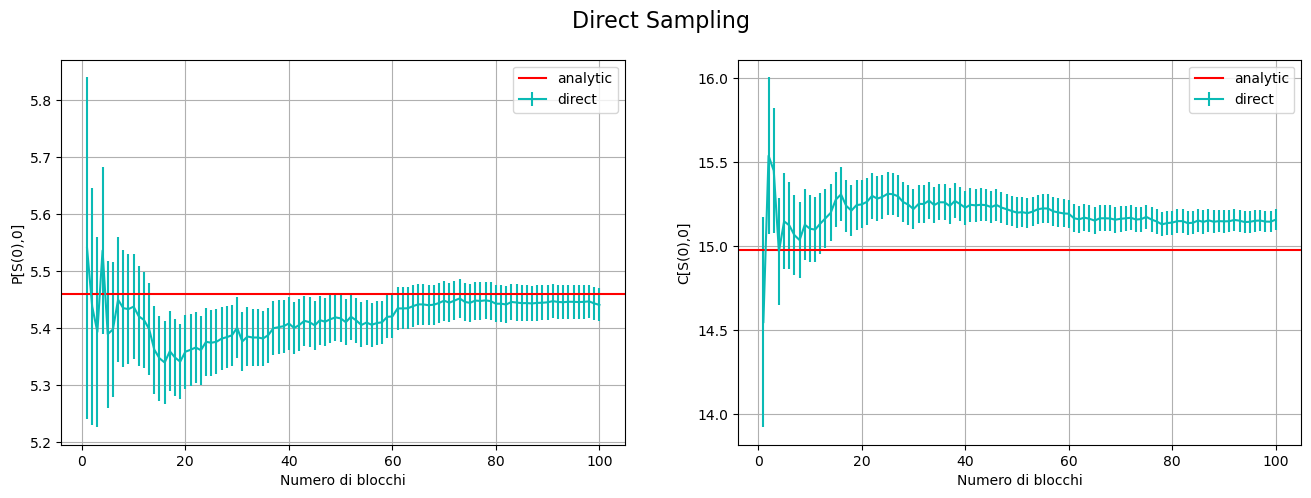

Stima opzione Put (Atteso: 5.4595325819072364): 
5.44022

Errore Statistico : 
0.0290693

Stima opzione Call (Atteso: 14.975790778311286): 
15.1574

Errore Statistico : 
0.0636899


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# leggi i dati dai file
data1 = np.loadtxt("LSN_lecture_03/put_direct.dat")
data2 = np.loadtxt("LSN_lecture_03/call_direct.dat")

# estraiamo le tre colonne
x1 = data1[:,0]
y1 = data1[:,1]
err1 = data1[:,2]
x2 = data2[:,0]
y2 = data2[:,1]
err2 = data2[:,2]

# crea una figura con due subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# creiamo il grafico a barre
axs[0].errorbar(x1,y1,yerr=err1, label='direct', color = '#0ABAB5')
axs[1].errorbar(x2,y2,yerr=err2, label='direct', color = '#0ABAB5')

# disegnamo il valore analitico
axs[0].axhline(y=5.4595325819072364, color = 'r', linestyle = '-', label='analytic')
axs[1].axhline(y=14.975790778311286, color = 'r', linestyle = '-', label='analytic')

# cosmesi
axs[0].set_xlabel('Numero di blocchi')
axs[1].set_xlabel('Numero di blocchi')
axs[0].set_ylabel('P[S(0),0]')
axs[1].set_ylabel('C[S(0),0]')
axs[0].grid(True)
axs[1].grid(True)
axs[0].legend(loc='best')
axs[1].legend(loc='best')
plt.suptitle('Direct Sampling', fontsize=16)
plt.show()

# stampa i risultati
print('Stima opzione Put (Atteso: 5.4595325819072364): ')
print(y1[-1])
print('\nErrore Statistico : ')
print(err1[-1])
print('\nStima opzione Call (Atteso: 14.975790778311286): ')
print(y2[-1])
print('\nErrore Statistico : ')
print(err2[-1])

Con il campionamento diretto del prezzo finale possiamo osservare che i risultati stimati sono piuttosto precisi (per la put $\sim1~\sigma$, mentre per la call l'errore è maggiore $\sim2~\sigma$). Gli errori relativi sono in entrambi casi minori del $1$%.

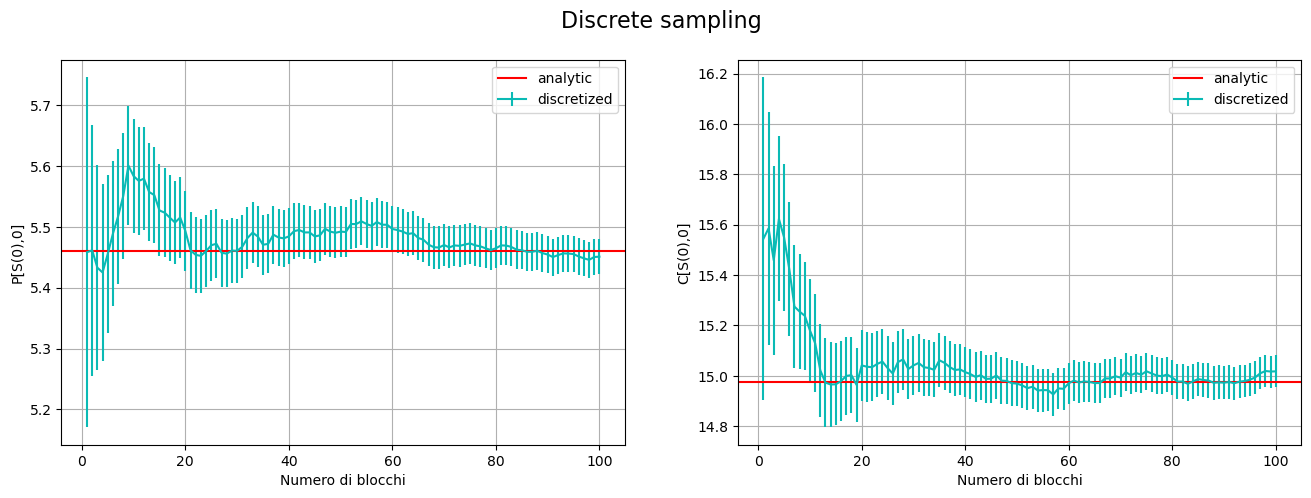

Stima opzione Put (Atteso: 5.4595325819072364): 
5.45089

Errore Statistico : 
0.0290634

Stima opzione Call (Atteso: 14.975790778311286): 
15.0178

Errore Statistico : 
0.0632264


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# leggi i dati dai file
data1 = np.loadtxt("LSN_lecture_03/put_discretize.dat")
data2 = np.loadtxt("LSN_lecture_03/call_discretize.dat")

# estraiamo le tre colonne
x1 = data1[:,0]
y1 = data1[:,1]
err1 = data1[:,2]
x2 = data2[:,0]
y2 = data2[:,1]
err2 = data2[:,2]

# crea una figura con due subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# creiamo il grafico a barre
axs[0].errorbar(x1,y1,yerr=err1, label='discretized', color = '#0ABAB5')
axs[1].errorbar(x2,y2,yerr=err2, label='discretized', color = '#0ABAB5')

# disegnamo il valore analitico
axs[0].axhline(y=5.4595325819072364, color = 'r', linestyle = '-', label='analytic')
axs[1].axhline(y=14.975790778311286, color = 'r', linestyle = '-', label='analytic')

# cosmesi
axs[0].set_xlabel('Numero di blocchi')
axs[1].set_xlabel('Numero di blocchi')
axs[0].set_ylabel('P[S(0),0]')
axs[1].set_ylabel('C[S(0),0]')
axs[0].grid(True)
axs[1].grid(True)
axs[0].legend(loc='best')
axs[1].legend(loc='best')
plt.suptitle('Discrete sampling', fontsize=16)
plt.show()

# stampa i risultati
print('Stima opzione Put (Atteso: 5.4595325819072364): ')
print(y1[-1])
print('\nErrore Statistico : ')
print(err1[-1])
print('\nStima opzione Call (Atteso: 14.975790778311286): ')
print(y2[-1])
print('\nErrore Statistico : ')
print(err2[-1])

Adoperando il campionamento discreto non si hanno variazioni significative negli errori relativi, ma le stime risultano più precise ($~0.3~\sigma$ per la put e $0.7~\sigma$ per la call. Ripetendo la simulazione per diversi valori del seed possiamo verificare che il campionamento discreto risulta lievemente più preciso nella maggior parte dei casi.

## 4. Dinamiche un po' caotiche <a id='##-4'></a>

Giungiamo quindi finalmente a fare un po' di **Fisica**. Ci dedicheremo in particolare allo studio di **sistemi macroscopici** per i quali, come ben sappiamo, una discussione in termini di meccanica classica può essere particolarmente difficoltosa da perseguire in termini analitici dal momento che i gradi di libertà in essi compresi sono dell'ordine del *Numero di Avogadro* ($~6.02\times10^{23}$). Una trattazione decisamente più abbordabile, tuttavia, può essere condotta dal punto di vista **termodinamico**, ovvero specificandone alcuni parametri macroscopici accessibili tramite gli esperimenti e denominati *variabili di stato* (i.e. energia totale, pressione e temperatura).

La branca della Fisica che si occupa di fornire il ponte tra la descrizione microscopica di un sistema fisico e la sua descrizione termodinamica viene chiamata **meccanica statistica**. Il nome è dovuto al fatto che però, contrariamente a quanto avviene per sistemi a bassi gradi di libertà, i microstati iniziali che compongono un sistema macroscopico sono *inconoscibili* e pertanto è possibile solo attribuire valori medi iniziali di posizioni e momenti abbracciando una **descrizione probabilistica**.

#### 4.0.1 Supercalifragimicrocanonico

L'obiettivo dell'esercizio seguente è effettuare simulazioni di dinamica molecolare per **ensamble microcanonici** di molecole di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) allo stato solido, liquido e gassoso nelle seguenti condizioni:
1. solido: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. liquido: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. gassoso: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

Dove l'asterisco indica che le quantità sono indicate in *unità di misura ridotte* e il *raggio di cut-off* è la distanza oltre la quale supponiamo nulla l'interazione tra coppie di particelle (in realtà questa approssimazione va a scartare tutta quella classe di particelle che popola le code dell'interazione a due corpi, introducendo un errore sistematico. Una trattazione di questo problema sarà presentata nella [sezione 7](###-7)). 

Per *ensamble di Gibbs*, in meccanica statistica, si intende un certo numero di sistemi differentemente preparati caratterizzati però tutti dallo stesso macrostato. In condizioni normali assumiamo che la varietà di comportamenti diversi nell'ensamble sia la stessa che si riscontra nell'evoluzione temporale di un sistema solo, ovvero che è possibile interscambiare le medie effettuate sull'ensamble con le medie temporali.

In particolare, un ensamble *microcanonico* o *NVE* è caratterizzato dall'essere debolmente interagente con l'esterno (in quanto isolato o confinato) e quindi conservare numero di particelle $N$, volume $V$ ed energia totale $E$. Dal punto di vista microscopico viene quindi definito dal postulato dell'**equiprobabilità**: ogni microstato caratterizzato da una energia prossima ad $E$ ha la stessa probabilità di essere assegnato o visitato.

#### 4.0.2 Un passo avanti, due passi indietro

Simulare un ensable di $10^{23}$ elementi può essere dispendioso persino numericamente. Una semplificazione può essere portata dal considerare che il nostro sistema presenti **proprietà geometriche periodiche** e concentrare la simulazione su una sola cella elementare, di lato `box`, contenente un numero più limitato di particelle, nel nostro caso $108$. In questo modo, ogni qualvolta una particella esce dalla cella elementare, applicando condizioni al bordo periodiche (PBC), assumeremo che una sua replica si introduca nella cella da un'altra vicina, esattamente dal lato opposto da cui la prima è uscita.

Per mezzo della simulazione, quindi, ci sarà possibile determinare le quantità termodinamiche dell'ensamble direttamente dalla conoscenza delle configurazioni nello spazio delle fasi delle 108 particelle (cosa invece impossibile sperimentalmente). Per fare ciò, però, necessitiamo di un algoritmo che approssimi numericamente le soluzioni delle equazioni del moto. Uno dei più usati ed efficienti è il noto **algoritmo di Verlet**, che, a partire da un'espansione al terzo ordine delle traiettorie, permette di determinare la posizione una particella ad un certo passo di integrazione a partire dalla conoscenza dei due passi precedenti secondo:
$$ \vec{r}(t+\delta t)= 2\vec{r}(t)-\vec{r}(t-\delta t)+\vec{a}(t)\delta t^2 $$

Un simile algoritmo, pur presentando grandi vantaggi in termini di **efficienza**, pur essendo **time-reversible**, data la simmetria giocata dai termini $\vec{r}(t+\delta t)$ e $\vec{r}(t-\delta t)$, e verificando **eccellenti proprietà di conservazione dell'energia** totale anche impiegando time step ampi, **non** è purtroppo **self-starting** richiedendo la conoscenza non solo delle condizioni iniziali, ma anche di quelle uno step precedente. 

L'algoritmo impiegato per le simulazioni che seguono sarà quindi un Verlet modificato dove determineremo le posizioni mancanti per mezzo di $\vec{r}(t-\delta t)=\vec{r}(t)-\vec{v}(t)\delta t$. Nel nostro codice, posizioni e velocità iniziali vengono possono essere lette dai file `config.out` e `velocity.out` generati da simulazioni precedenti (`restart == 1`) o, a partire da una configurazione cristallina specificata in `config.in`, possono essere assegnate velocità casuali secondo la *distribuzione di Maxwell-Boltzmann* correggendo eventuali effetti di **deriva** (`restart == 0`).

Iniziando la simulazione dal nulla siamo forzati a usare la seconda opzione, osserviamo però che il sistema originato in questo non sarà necessariamente in equilibrio termico, dal momento che gli effetti delle collisioni tra le molecole tenderanno a modificare la temperatura totale discostandola dal valore con il quale abbiamo inizializzato la velocità delle particelle, come possiamo osservare nei grafici che seguono:

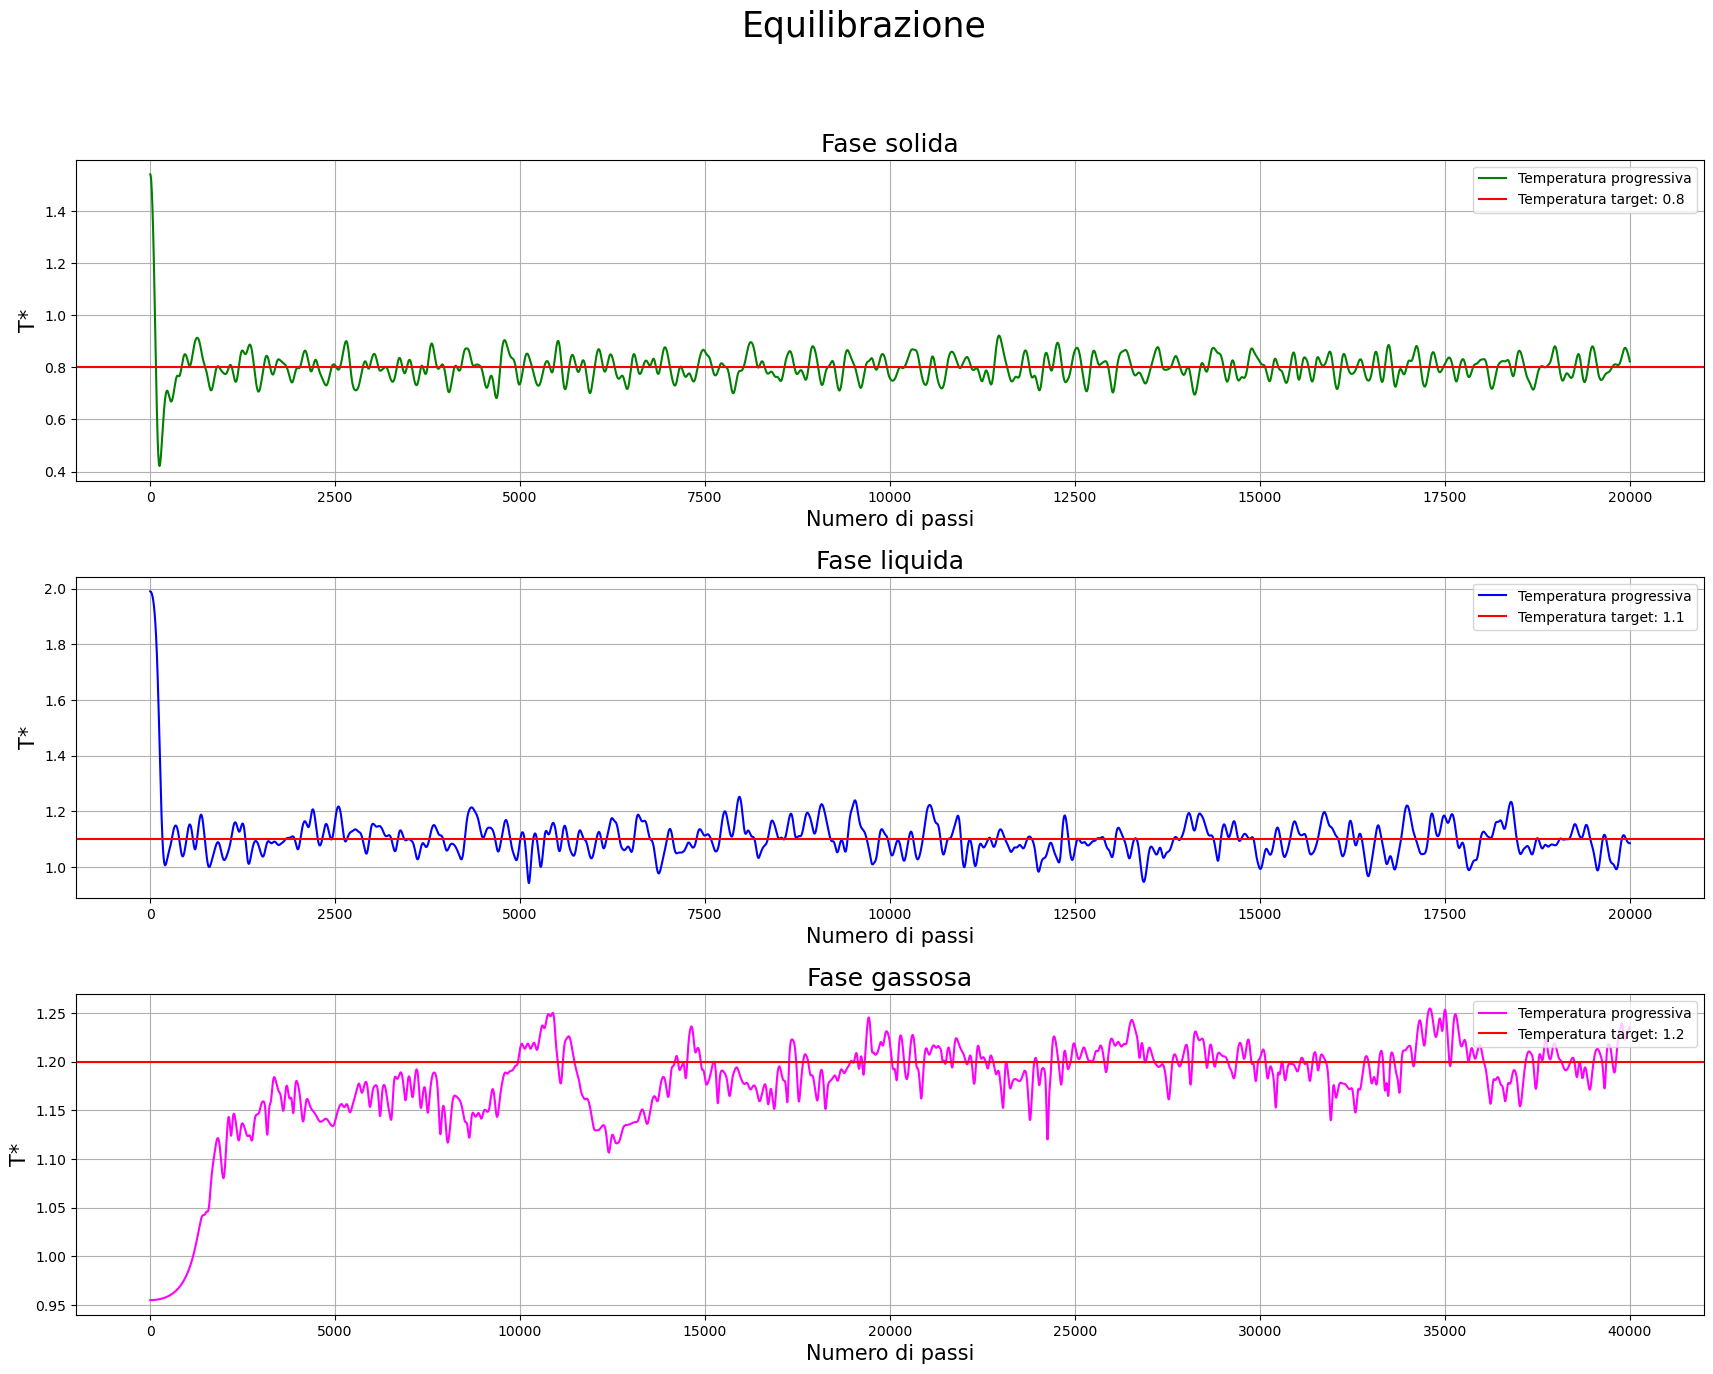

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

phases = ["solid", "liquid", "gas"]
titles = ["Fase solida", "Fase liquida", "Fase gassosa"]
colors = ['green', 'blue', 'magenta']
Teq = [0.8, 1.1, 1.2]

plt.figure(figsize=(21,15))
plt.suptitle("Equilibrazione", fontsize = 25)

for i in range(0,3):

    plt.subplot(3,1,i+1)

    data = np.loadtxt('LSN_lecture_04/MDNVE_MCNVT/output_temp_'+str(phases[i])+'_trans.dat2')
    x = data[:,0]
    y = data[:,1]
    plt.plot(x, y, label="Temperatura progressiva", color = colors[i])
    plt.title(titles[i], fontsize = 18)
    plt.ylabel('T*', fontsize = 15)
    plt.xlabel('Numero di passi', fontsize = 15)
    plt.axhline(y=Teq[i], color ="r", label = "Temperatura target: "+str(Teq[i]))
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.subplots_adjust(hspace=0.3)
    
plt.show()

Pertanto, per effettuare delle simulazioni coerenti con il modello, è necessario sottoporre il sistema ad un primo periodo di **equilibrazione** dove, a partire da temperature differenti da quelle target, il sistema attraversa un transiente prima di raggiungere l'equilibrio termodinamico. Nelle figure precedenti possiamo osservare i risultati delle equilibrazioni delle tre fasi. 

Nei casi solido e liquido osseviamo che il transiente è relativamente veloce (qualche centinaio di passi) dove le temperature crollano per poi stabilizzarsi attorno ad un certo valore con fluttuazioni dell'ordine del decimo. Il crollo è spiegato dal fatto che, ad alte densità, le collisioni tendono fortemente a diminuire l'energia cinetica delle particelle e, consequentemente, la temperatura. 

Nel caso gassoso invece osserviamo il comportamento inverso: a basse densità le molecole si trovano troppo vicine tra loro nella condizione iniziale, pertanto tenderanno ad allontanarsi scendendo verso il minimo del potenziale e aumentando consequentemente la temperatura. Osserviamo che, in questo caso, il transiente è decisamente più lungo (dell'ordine delle decine di migliaia di blocchi) e le fluttuazioni, pur aumentando di poco in ampiezza, sembrano essere correlate su distanza decisamente più lunghe, presentando come dei "battimenti" dai periodi di anche migliaia di blocchi. Per questo motivo sarà opportuno effettuare le medie di questa fase in particolare su blocchi più lunghi.

### 4.1 Formulae

Nel codice impiegato siamo in gredo di calcolare gli andamenti progressivi di energia cinetica, potenziale e totale per molecola, temperatura e pressione, nel caso in cui le molecole interagiscano a coppie per mezzo di un potenziale del tipo Lennard-Jones:
    $$U_{LJ}(r)= 4\epsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^6\right]$$
In unità ridotte, i valori ottenuti non solo hanno il pregio di non dipendere in alcun modo dal tipo di molecole che si stanno simulando, ma risultano anche essere tutti nell'ordine dell'unità (il che fornisce un buon controllo sulla bontà dei risultati). Di seguito le espressioni per le quantità macroscopiche a partire da quelle microscopiche:
$$E^* = K^* +V^*$$

$$K^* = \frac{1}{2}\sum_i{v^*_i}^2$$

$$T^* = \frac{2K^*}{3N}$$

$$U^* = 4\left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N  \left(\frac{1}{|\vec{r^*_i} -\vec{r^*_j}|}\right)^{12} - 
\left(\frac{1}{|\vec{r^*_i} -\vec{r^*_j}|}\right)^6 \right\rangle$$

$$ p^* = \rho^*T^* + \frac{1}{3V^*} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\left[ \left(\frac{1}{|\vec{r^*_i} -\vec{r^*_j}|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r^*_i} -\vec{r^*_j}|}\right)^6 \right] \right\rangle $$

Ricordando che $E = \epsilon E^*$, $K = \epsilon K^*$, $U = \epsilon U^*$, $T = \frac{\epsilon}{k_B} T^*$, $p=\frac{\epsilon}{\sigma^3}p^*$.

Mentre il calcolo delle prime tre quantità risulta immediato, per energia potenziale e pressione è stato necessario prima accumulare i valori tra parentesi angolari per tutte le particelle separate da una distanza minore di quella di cut-off
```c++
      if(dr < rcut)
      {
        vij = 1.0/pow(dr,12) - 1.0/pow(dr,6);
        fij = vij + 0.5/pow(dr,6);
        v += vij;
        f += fij;
      }
```

e successivamente calcolare la stime di pressione e energia potenziale su cui successivamente mediare:
```c++
    walker[iv] = 4.0 * v; // Potential energy
    walker[ip] = rho*walker[it] + 48. * f /((double)vol*3.); // Pressure
```
dove il vettore ```walker``` raccoglie i valori delle osservabili macroscopiche ad ogni passo.

### 4.2 Risultati

Si è quindi proceduto con la simulazione delle tre fasi, su una lunghezza di $50$ blocchi da $2000$ passi ciascuno, dopo aver effettuato le equilibrazioni. Di seguito si trovano i grafici delle quantità macroscopiche in unità ridotte e, stampate a schermo, le migliori stime in unità SI per l'Argon.

#### 4.2.1 Fase solida


Energia Cinetica :
1.197e+03 +- 0.4946  J/mol

Energia Potenziale :
-6.645e+03 +- 0.5194  J/mol

Energia Totale :
-5.448e+03 +- 0.08217  J/mol

Pressione :
4.051e+08 +- 1.133e+05  Pa

Temperatura :
96.01 +- 0.03966  K


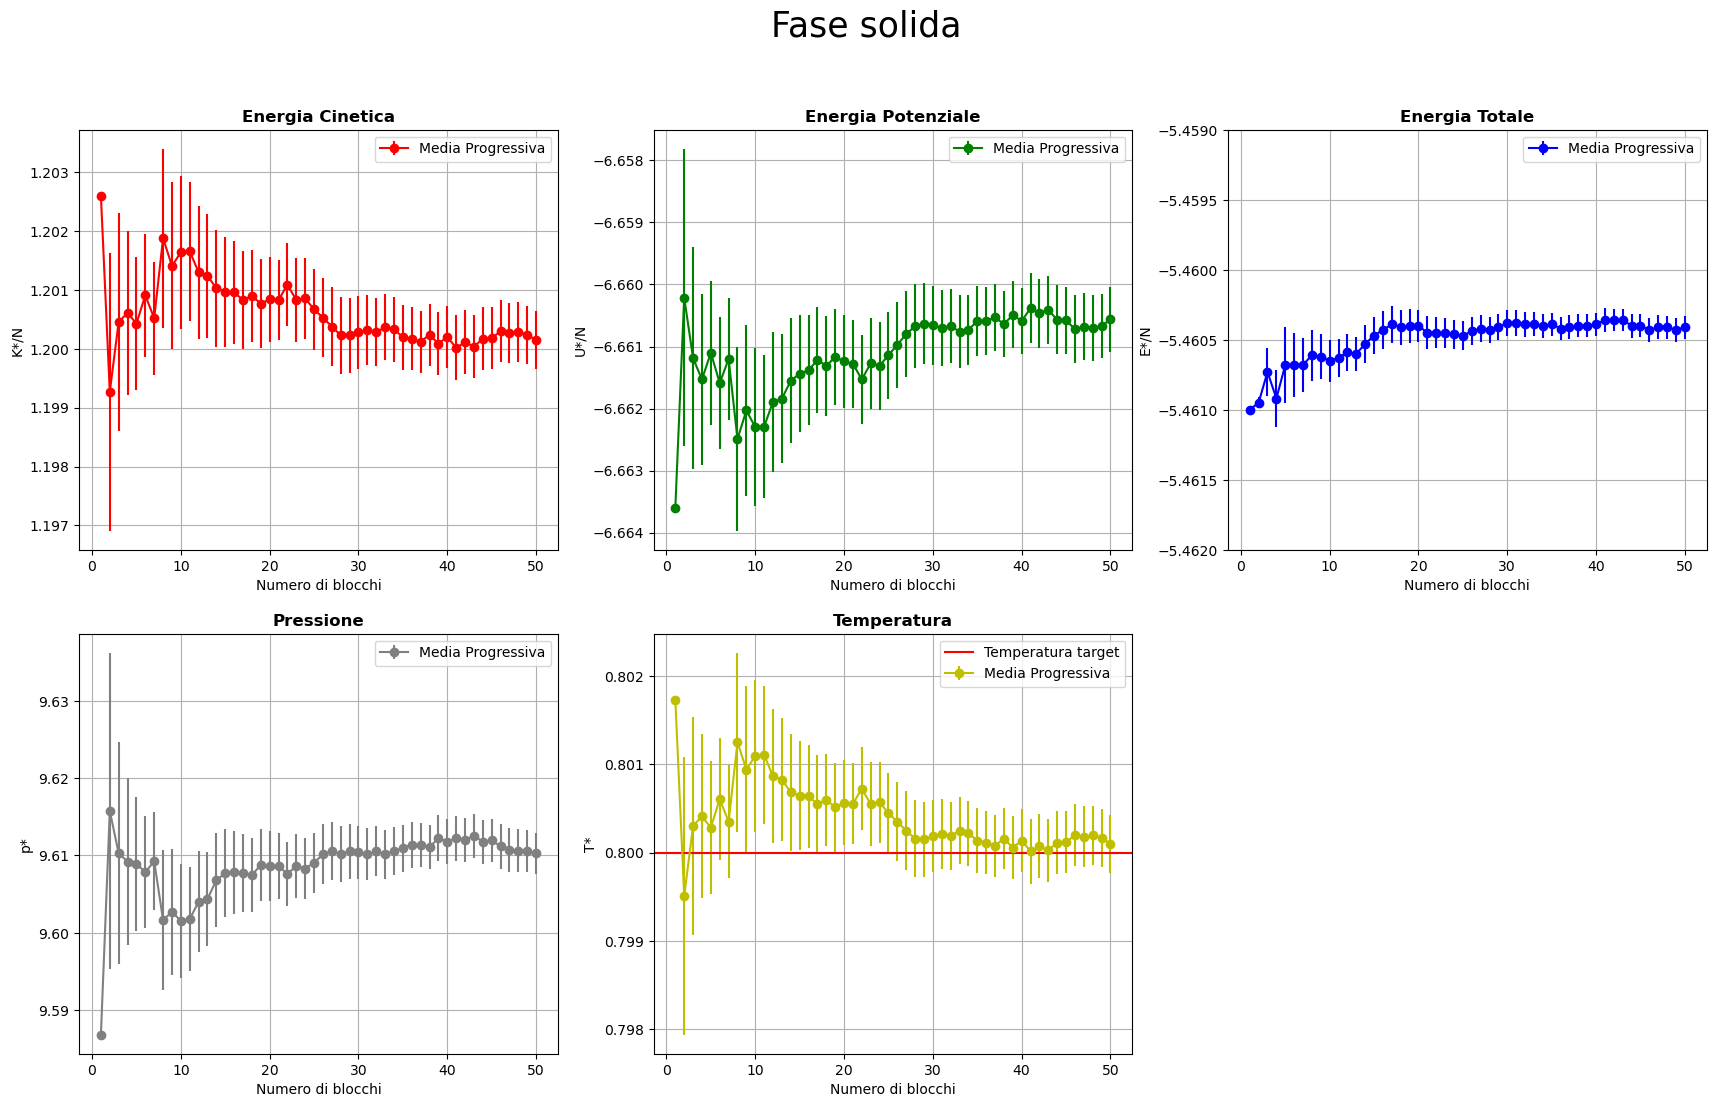

In [6]:
from scipy import constants

#solid
plt.figure(figsize=(21,12))
plt.suptitle("Fase solida", fontsize = 25)

colors = ["r", "g", "b", "grey", "y"]
quantita=["ekin", "epot", "etot", "pres", "temp"]
titles=['Energia Cinetica', 'Energia Potenziale', 'Energia Totale', 'Pressione', 'Temperatura']
ylabels=['K*/N', 'U*/N', 'E*/N', 'p*', 'T*']
conversions =[120*constants.R, 120*constants.R, 120*constants.R, 120*constants.k/(0.34*10**(-9))**3, 120]
units=['J/mol', 'J/mol', 'J/mol', 'Pa', 'K']

# costruisce 5 subplot per le quantità macroscopiche
for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    # carica i dati da file
    data = np.loadtxt('LSN_lecture_04/MDNVE_MCNVT/output_'+str(quantita[i])+'_solid.dat2')
    x = data[:,0]
    ave = data[:,1]
    ave_prog = data[:,2]
    err = data[:,3]

    # disegna il grafico a barre
    plt.errorbar(x, ave_prog, yerr = err, marker='o', label='Media Progressiva', color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Numero di blocchi')
    if(i==2) :
        plt.ylim(-5.462, -5.459)
    plt.grid(True)
    plt.legend()
    
    # stampa i valori finali in unità SI
    print('\n'+titles[i]+' :')
    value = ave_prog[-1]*conversions[i]
    error = err[-1]*conversions[i]
    print(format(value, '.4') + ' +- ' + format(error, '.4') + '  ' + units[i])

plt.axhline(y=0.8, color ="r", label='Temperatura target')
plt.grid(True)
plt.legend()
plt.show()


Osserviamo innanzitutto che le fluttuazioni dell'energia totale sono dell'ordine dello 0.0001%, fatto che verifica quanto detto in precedenza sulle ottime proprietà di conservazione dell'energia dell'algoritmo di Verlet. Inoltre, la convergenza della media progressiva della temperatura al valore target, verifica la bontà dell'equilibrazione effettuata in precedenza.

Per questo stesso motivo osserviamo che i profili di energia cinetica e potenziale sono speculari (al crescere dell'una, descresce l'altra). Da costruzione il grafico della temperatura non è che un riscalamento di quello dell'energia cinetica, mentre la pressione, coerentemente, presenta un comportamento intermedio tra quello dell'energia potenziale e della temperatura.

#### 4.2.2 Fase liquida


Energia Cinetica :
1.651e+03 +- 2.86  J/mol

Energia Potenziale :
-5.006e+03 +- 2.875  J/mol

Energia Totale :
-3.355e+03 +- 0.1524  J/mol

Pressione :
9.19e+07 +- 5.753e+05  Pa

Temperatura :
132.4 +- 0.2293  K


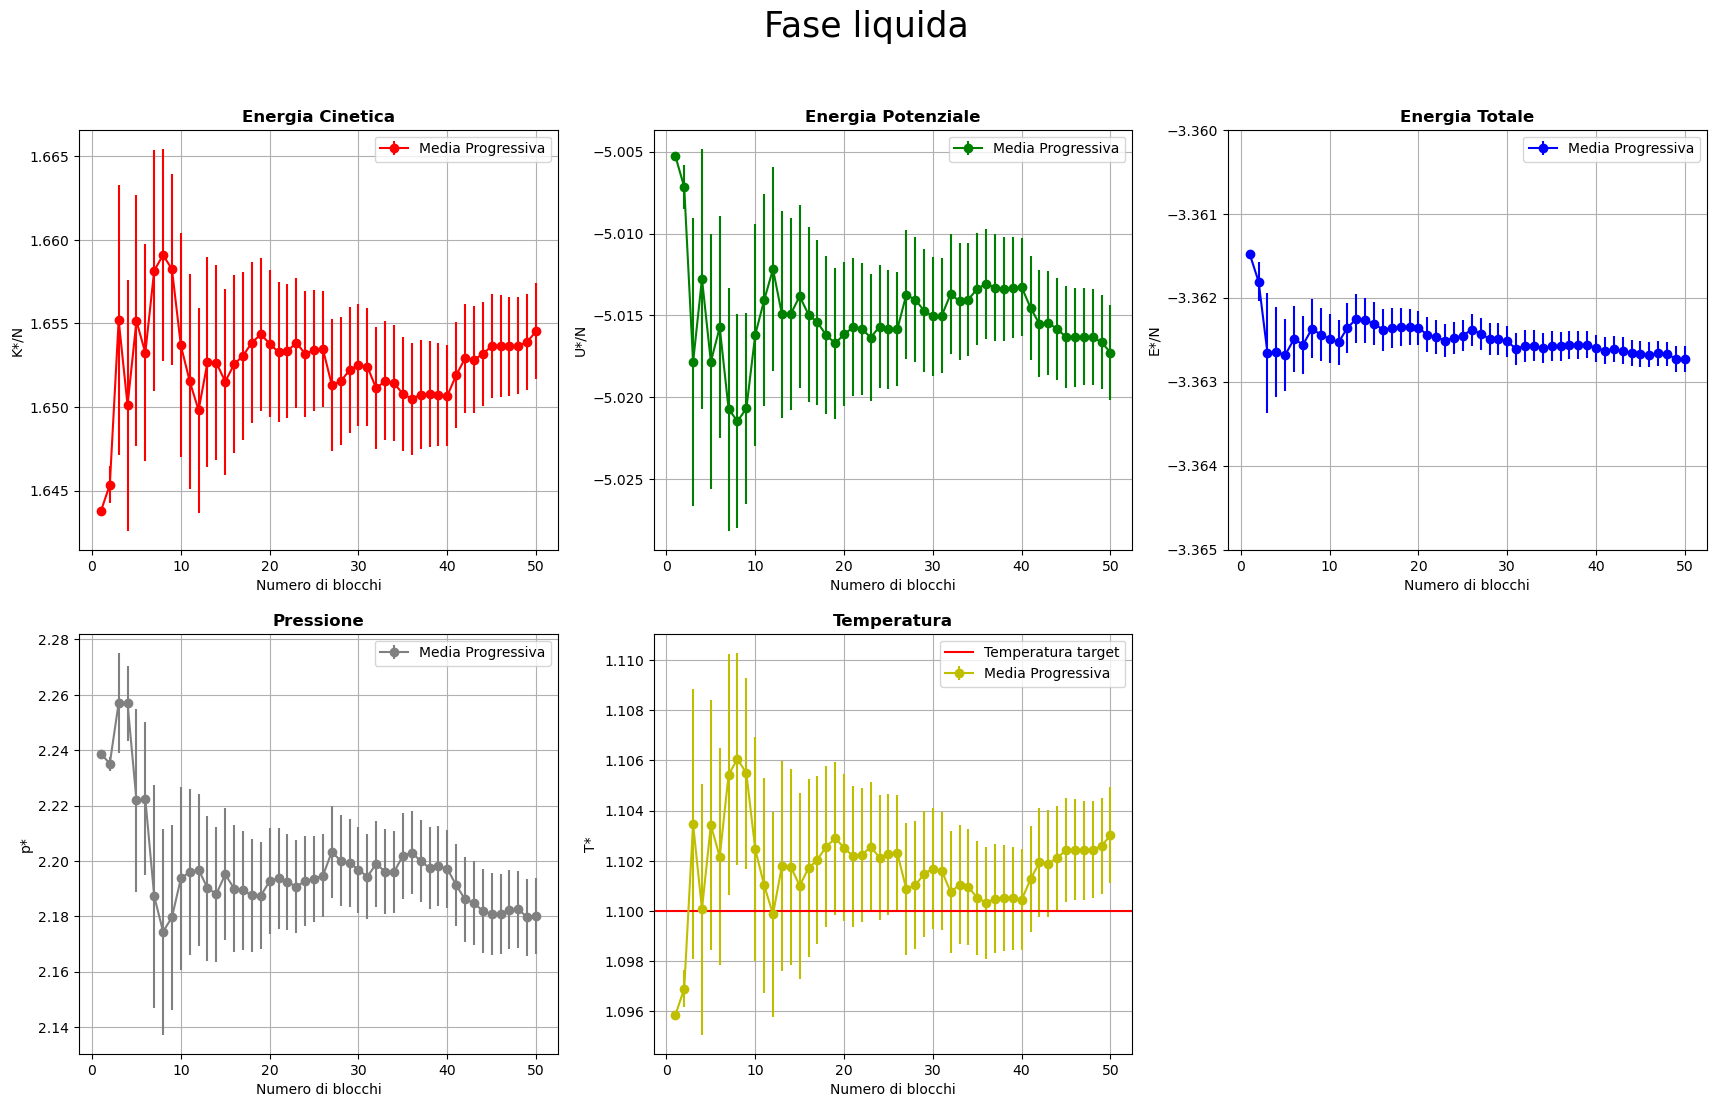

In [18]:
#liquid
plt.figure(figsize=(21,12))
plt.suptitle("Fase liquida", fontsize = 25)

# costruisce 5 subplot per le quantità macroscopiche
for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    # carica i dati da file
    data = np.loadtxt('LSN_lecture_04/MDNVE_MCNVT/output_'+str(quantita[i])+'_liquid.dat2')
    x = data[:,0]
    ave = data[:,1]
    ave_prog = data[:,2]
    err = data[:,3]

    # disegna il grafico a barre
    plt.errorbar(x, ave_prog, yerr = err, marker='o', label='Media Progressiva', color = colors[i])
    plt.title(titles[i], fontweight='bold')
    if(i==2) :
        plt.ylim(-3.365, -3.360)
    plt.ylabel(ylabels[i])
    plt.xlabel('Numero di blocchi')
    plt.grid(True)
    plt.legend()
    
    # stampa i valori finali in unità SI
    print('\n'+titles[i]+' :')
    value = ave_prog[-1]*conversions[i]
    error = err[-1]*conversions[i]
    print(format(value, '.4') + ' +- ' + format(error, '.4') + '  ' + units[i])

plt.axhline(y=1.1, color ="r", label='Temperatura target')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

plt.show()

Osserviamo anche in questo caso la conservazione dell'energia (fluttazioni 0.0005%), e la convergenza della media progressiva della temperatura, seppur meno buona rispetto al caso solido. Si può valutare quindi di effettuare una equilibrazione su tempi più lunghi, come ad esempio si è fatto per il caso gassoso. Valgono ancora le altre considerazioni effettuate per la fase solida.

Come ragionevolmente ci aspettiamo, inoltre, osserviamo un aumento di tutte le energie e una diminuzione della pressione (le molecole sono infatti più libere di muoversi rispetto al caso solido).

#### 4.2.3 Fase gassosa


Energia Cinetica :
1.804e+03 +- 5.331  J/mol

Energia Potenziale :
-407.1 +- 5.334  J/mol

Energia Totale :
1.397e+03 +- 0.009656  J/mol

Pressione :
2.096e+06 +- 8.641e+03  Pa

Temperatura :
144.6 +- 0.4274  K


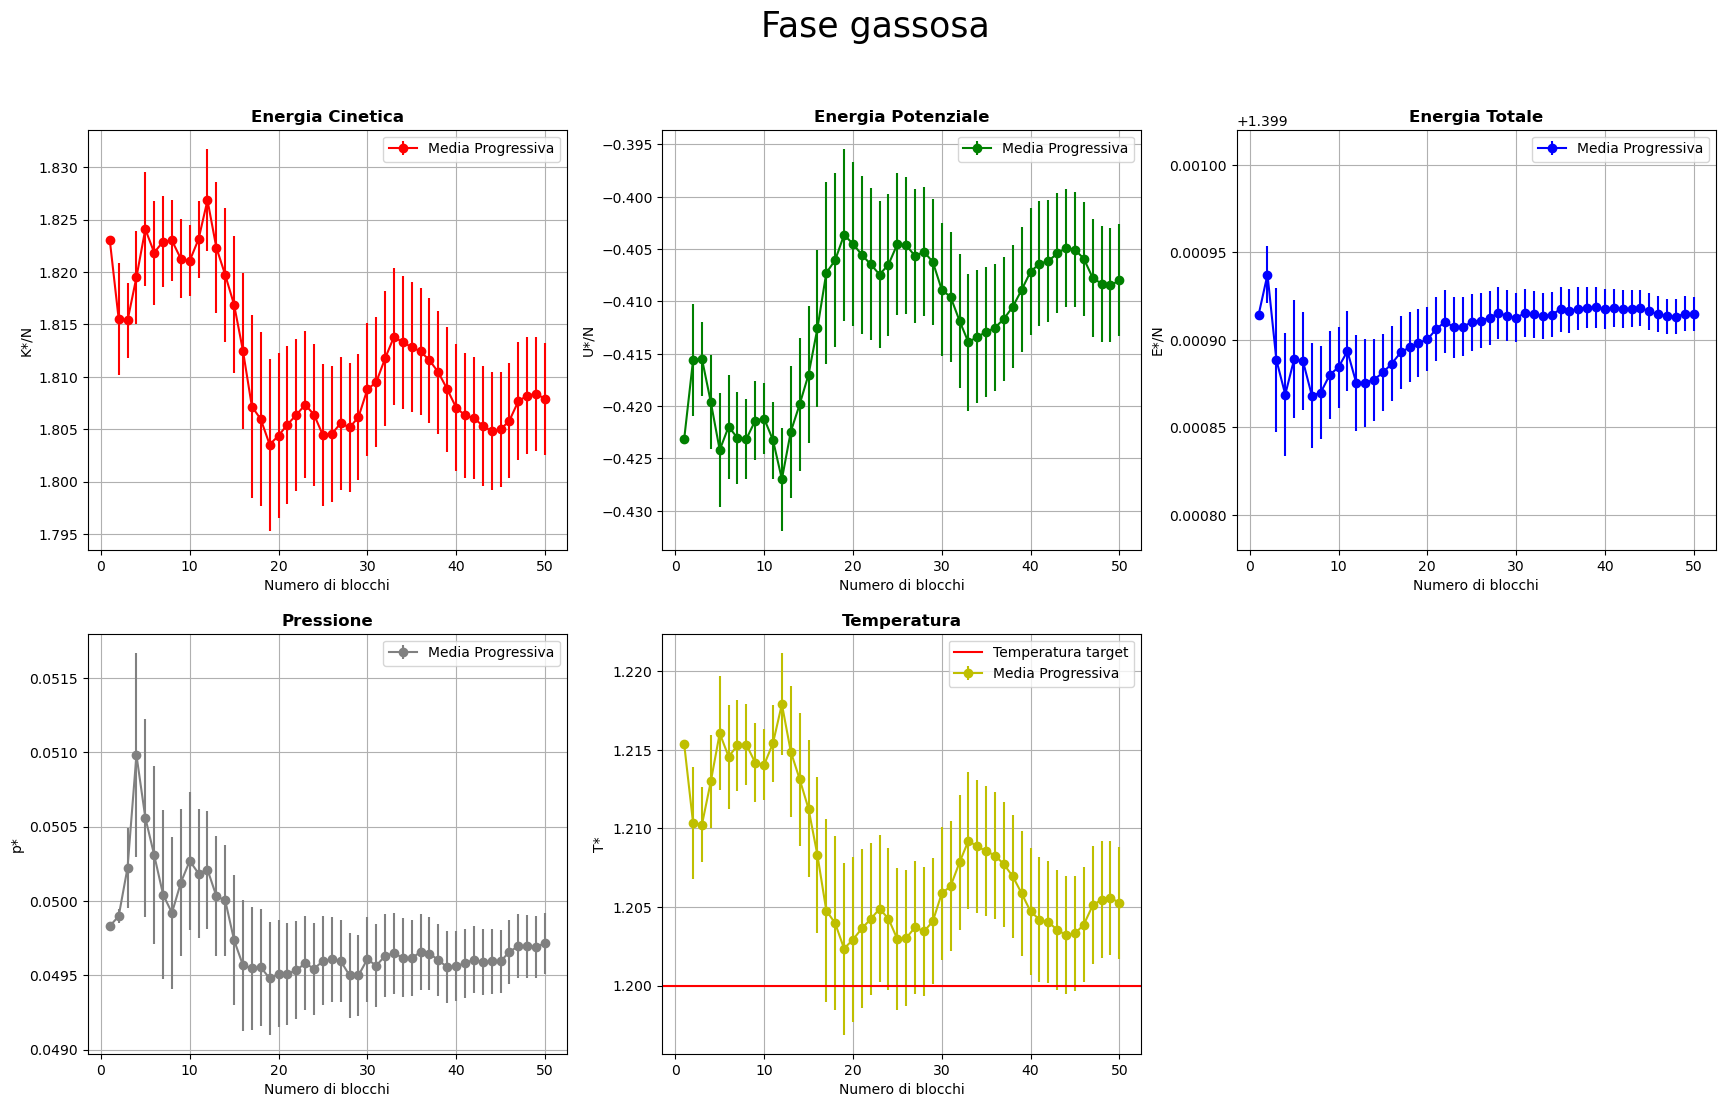

In [13]:
#gas
plt.figure(figsize=(21,12))
plt.suptitle("Fase gassosa", fontsize = 25)

# costruisce 5 subplot per le quantità macroscopiche
for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    # carica i dati da file
    data = np.loadtxt('LSN_lecture_04/MDNVE_MCNVT/output_'+str(quantita[i])+'_gas.dat2')
    x = data[:,0]
    ave = data[:,1]
    ave_prog = data[:,2]
    err = data[:,3]

    # disegna il grafico a barre
    plt.errorbar(x, ave_prog, yerr = err, marker='o', label='Media Progressiva', color = colors[i])
    plt.title(titles[i], fontweight='bold')
    if(i==2) :
        plt.ylim(1.39978, 1.40002)
    plt.ylabel(ylabels[i])
    plt.xlabel('Numero di blocchi')
    plt.grid(True)
    plt.legend()
    
    # stampa i valori finali in unità SI
    print('\n'+titles[i]+' :')
    value = ave_prog[-1]*conversions[i]
    error = err[-1]*conversions[i]
    print(format(value, '.4') + ' +- ' + format(error, '.4') + '  ' + units[i])

plt.axhline(y=1.2, color ="r", label='Temperatura target')
plt.grid(True)
plt.legend()
plt.show()

plt.show()

Come evidenziato nel paragrafo precedente, la simulazione della fase gassosa risulta decisamente più instabile rispetto alle altre, pertanto si è scelto di effettuare medie su blocchi da 5000 passi, anzichè 2000.

Osserviamo che le fluttazioni dell'energia totale sono sempre dell'ordine dello 0.0001%, mentre la convergenza della media della temperatura al valore target è decisamente più lenta, dovuta alle grandi fluttuazioni presenti nel modello anche dopo l'equilibrazione. Valgono ancora le altre considerazioni effettuate per le fasi precedenti.

**N.B. i valori di E$_{tot}$ possono soffrire di troncamento da parte della `ofstream`, si consiglia di specificare la precisione.**

Verifichiamo coerentemente inoltre una ulteriore diminuzione della pressione e aumento delle energie, in particolare sottolineando come l'energia totale sia diventata positiva, confermando quindi la presenza di molecole libere, coerentemente alla descrizione di una fase gassosa.  

## 6. Easying <a id='##-6'></a>

#### 6.0.1 Chespiralicanonico!

Seppur di grande interesse, gli ensamble microcanonci non sono gli unici esistenti ed anzi spesso potrebbe valere la pena considerare degli insiemi statistici in cui le quantità conservate sono differenti da quelle di un NVE.
È il caso ad esempio di sistemi immersi in grandi serbatoi ad una certa temperatura $T$. Seppur globalmente questo complesso sia un NVE, sistema e serbatoio sono liberi di scambiare energia tra loro e l'enormità del serbatoio obbliga il sistema a mantersi in equilibrio termico con esso, imponendogli la conservazione della temperatura. Un sistema di questo tipo costituisce quello che viene chiamato un **ensamble canonico** o **NVT**.

Se un ensamble microcanonico era contraddistinto dall'*equiprobabilità*, discorso differente vale invece per quello canonico: la probabilità di rilevare il nostro sistema in un determinato stato sarà proporzionale al volume che la sua configurazione microscopica occupa nello spazio delle fasi, in altre parole:
    $$\rho(\vec{q}, \vec{p}) = \frac{1}{Q(V, T)}e^{-H(\vec{q}, \vec{p})/k_BT}$$
Dove $\vec{q}$ e $\vec{p}$ sono le coordinate 3N-dimensionali nello spazio delle fasi del sistema NVT, $H(\vec{q}, \vec{p})$ è la corrispondente Hamiltoniana, mentre $Q(V, T)$ è detta *funzione di partizione* ed è fissata per normalizzazione come:
    $$Q(V, T)=\int \frac{d^{3N}q~d^{3N}p}{h^{3N}N!}e^{-H(\vec{q}, \vec{p})/k_BT}$$
    
La simulazione di sistemi di questo tipo pone quindi una sfida considerevole: effettuare il campionamento di variabili casuali distribuite secondo una distribuzione multi-dimensionale e la cui normalizzazione non è nota! 
Accettare la sfida con l'impiego delle sole tecniche di [sezione 2](###-2), anche se raffinate per mezzo di tecniche di rigetto, resta una scelta decisamente incauta dal momento che l'assenza di informazioni riguardo la normalizzazione risulta un *ostacolo insormontabile*. 

#### 6.0.2 M(RT)^2

In nostro soccorso però giunge il prodotto di un'allegra serata tra amici: l'*algoritmo di Metropolis-Rosenbluth-Rosenbluth-Teller-Teller* noto semplicemente come **algoritmo di Metropolis** o **M(RT)^2**.

L'idea che sottostà a questo algoritmo è tanto semplice quanto geniale: campionare una determinata distribuzione N-dimensionale per mezzo della simulazione di un RW che si sposa come "strisciandone al di sotto" passando con più agilità al di sotto dei massimi e con più difficoltà in corrispondenza dei minimi.

<figure>
    <img src="LSN_lecture_06/MRT2ex.png" alt="MRT2" width=400px />
   <figcaption style="text-align: center;"> Fig. Una rappresentazione della dinamica di M(RT)^2.</figcaption>
</figure>

La probabilità di compiere un passo $\vec{x}\rightarrow\vec{y}$ è determinata da 

$$K(y|x))=T(y|x)A(y|x)$$

Dove $T(y|x)$ è una probabilità di transizione test, mentre $A(y|x)$ è la probabilità di accettare la mossa proposta che, nel caso particolare del Metropolis, è data da: $$A(y|x)=\min\left[1, \frac{T(x|y)p(y)}{T(y|x)p(x)}\right]$$

Un simile algoritmo permette manifestamente di campionare una distribuzione non normalizzata, dal momento che $A(y|x)$ dipende solo dal rapporto delle probabilità. La scelta di $T(y|x)$, infine, condiziona fortemente l'efficienza e la convergenza dell'algoritmo. Infatti, probabilità di trasizione che favoriscono mosse ampie possono portare a scartare la maggioranza delle mosse proposte, danneggiando l'efficienza dell'algoritmo, mentre quelle che ne favoriscono di troppo corte comportano alta accettazione, generando risultati fortemente correlati. È sempre quindi buona cosa seguire una **regola empirica** che prevede di scegliere $T(y|x)$ in modo da otteenere una accettazione attorno al **50%**.

#### 6.0.3 Bagno caldo

La forzatura nell'utilizzo di una simile cautela ci fa chiedere se non esista una possibile variante del Metropolis che possa funzionare con profitto magari accettando sempre la mossa proposta, evitando una faticosa ricerca di una $T(y|x)$ ideale. Questo è il caso del **campionamento di Gibbs** o **algoritmo heat-bathing**, che assegna la nuova posizione del RW andando a campionarne ogni coordinata nel caso in cui tutte le altre restino fisse. Per la coordinata k-esima, la probabilità di transizione sarà data dalla probabilità condizionata:
$$p(x'_k|\{x_j : j\neq k\}) = \frac{p(x_1...x'_k...x_N)}{\sum_{x_k}p(x_1...x_k...x_N)}$$

Dove osserviamo che, anche in questo caso, il problema della normalizzazione scompare.
Di fatto quello che si sta facendo è trattare ogni singola coordinata del RW come una particella di un gas caldo (che quindi evolve indipendentemente dalle altre secondo una certa distribuzione di probabilità).

### 6.1 Catene di spin

Vogliamo ora verificare la validità di quanto detto finora in modo da ottenere una procedura relativamente semplice per simulare ensamble canonici. Per fare ciò effettueremo una prova sul **modello di Ising 1D**, un semplice modello unidimensionale per descrivere il magnetismo nella materia che ha il pregio di essere analiticamente risolubile.

Assumiamo una catena di $N=50$ spin che interagiscono solo tra primi vicini tramite l'Hamiltoniana:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove nel nostro caso $J=1$ (ferromagnete) e $h$ è il valore del campo magnetico esterno. Trattandosi di una catena, inoltre, $s_{N+1}=s_1$.

Come anticipato, il modello di Ising monodimensionale è esattamente risolubile in termini delle sue quantità macroscopiche come energia interna, calore specifico, magnetizzazione e suscettibilità magnetica. Lo scopo dell'esperimento sarà quindi calcolare tramite gli algoritmi di Gibbs e Metropolis le migliori stime di queste quantità a temperature fissate ed effettuare il confronto con i valori analitici. Gli algoritmi cercheranno di modificare il valore di ciascuno spin uno ad uno e calcoleranno di volta in volta i valori delle quantità macroscopiche secondo le relazioni:
- $U(N,T) = \langle H \rangle_{h=0}$
- $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
- $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
- $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Sono state effettuate simulazioni per 20 temperature nell'intervallo $(0.5, 2.0]$, ciascuna stima è stata calcolata per mezzo di una media su $20$ blocchi da $10000$ passi ciascuno. Per evitare problemi di *equilibrazione*, si è scelto di effettuare le simulazioni con temperature via via descrescenti, recuperando ogni volta le configurazioni delle simulazioni precedenti. La lunghezza dei blocchi, infine, è stata scelta in modo da abbattere le correlazioni.

#### 6.1 Energia interna

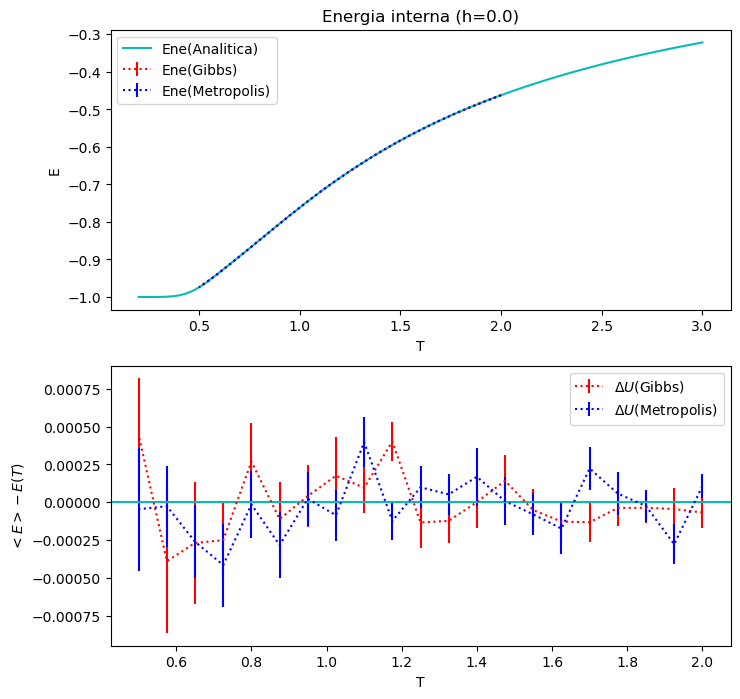

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# carica i dati da file
data = np.loadtxt('LSN_lecture_06/Ising_1D/output.ene-Gibbs.0')
x=data[:,0]
yg=data[:,2]
errg=data[:,3]
data = np.loadtxt('LSN_lecture_06/Ising_1D/output.ene-Metro.0')
ym=data[:,2]
errm=data[:,3]

plt.figure(figsize = (8,8))

# disegna il grafico dei dati
plt.subplot(2,1,1)
plt.errorbar(x, yg, yerr = errg, linestyle="dotted", label="Ene(Gibbs)", color = "r")
plt.errorbar(x, ym, yerr = errm, linestyle="dotted", label="Ene(Metropolis)", color = "b")
plt.title('Energia interna (h=0.0)')
plt.xlabel('T')
plt.ylabel('E')

# curva esatta
points=100
T = np.linspace(0.2,3.0,num=points)
def e(t):
    return -np.tanh(1./t)*(1+np.tanh(1./t)**48)/(1+np.tanh(1./t)**50)
ene = e(T)
plt.plot(T, ene, label="Ene(Analitica)", color = '#0ABAB5')
plt.legend()

# disegna l'ingrandimento per gli errori
plt.subplot(2,1, 2)
ene = e(x)
plt.errorbar(x, yg-ene, yerr = errg, linestyle="dotted", label="$\Delta U$(Gibbs)", color = "r")
plt.errorbar(x, ym-ene, yerr = errm, linestyle="dotted", label="$\Delta U$(Metropolis)", color = "b")
plt.axhline(y=0, color ="#0ABAB5")
plt.xlabel('T')
plt.ylabel('$< E > - E(T)$')
plt.legend()

plt.show()

Nelle figure sopra possiamo osservare il confronto tra i valori simulati e il valore analitico assieme ad ingrandimento che permette di effettuare più consistentemente il confronto. Osserviamo che entrambi gli algoritmi presentano un comportamento simile e si scostano al più di $2.5 \sigma$ dai valori analitici. I valori, tuttavia, sono accurati alla quarta cifra decimale, il che ci suggerisce la particolare bontà ed efficacia dei metodi proposti.

#### 6.1.2 Calore specifico

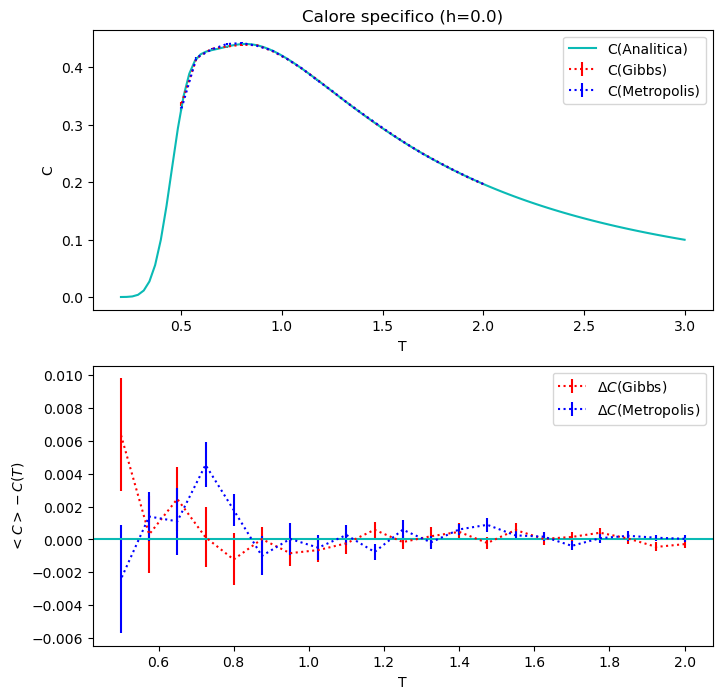

In [21]:
# carica i dati da file
data = np.loadtxt('LSN_lecture_06/Ising_1D/output.heat-Gibbs.0')
x=data[:,0]
yg=data[:,2]
errg=data[:,3]
data = np.loadtxt('LSN_lecture_06/Ising_1D/output.heat-Metro.0')
ym=data[:,2]
errm=data[:,3]

plt.figure(figsize = (8,8))

# disegna il grafico dei dati
plt.subplot(2,1,1)
plt.errorbar(x, yg, yerr = errg, linestyle="dotted", label="C(Gibbs)", color = "r")
plt.errorbar(x, ym, yerr = errm, linestyle="dotted", label="C(Metropolis)", color = "b")
plt.xlabel('T')
plt.ylabel('C')
plt.title('Calore specifico (h=0.0)')


# curva esatta
T = np.linspace(0.2,3.0,num=points)
def c(t):
    beta = 1/t
    J = 1.0
    Ns = 50
    th = np.tanh(J/t)
    thN= th**Ns
    ch = 1/th
    return ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
heat = c(T)
plt.plot(T, heat, label="C(Analitica)", color = '#0ABAB5')
plt.legend()

# disegna l'ingrandimento per gli errori
plt.subplot(2,1, 2)
heat = c(x)
plt.errorbar(x, yg-heat, yerr = errg, linestyle="dotted", label="$\Delta C$(Gibbs)", color = "r")
plt.errorbar(x, ym-heat, yerr = errm, linestyle="dotted", label="$\Delta C$(Metropolis)", color = "b")
plt.axhline(y=0, color ="#0ABAB5")
plt.xlabel('T')
plt.ylabel('$<C> - C(T)$')
plt.legend()

plt.show()

Considerazioni analoghe valgono anche per il calore specifico, osserviamo, in modo ancora più evidente rispetto al caso precedente, la descrescita degli errori sulle stime all'aumentare della temperatura. Questo fatto, giustificabile anche dal diminuire dei valori assoluti di calore specifico, può essere in realtà un suggerimento del fatto che i due algoritmi fatichino ad esplorare efficacemente lo spazio delle fasi a basse temperature, dando luogo a stime più grossolane. (L'accettazione del Metropolis infatti era dell'ordine del 10%).

Le stime, tuttavia, sono comunque precise nell'ordine delle $2.5~\sigma$.

#### 6.1.3 Magnetizzazione

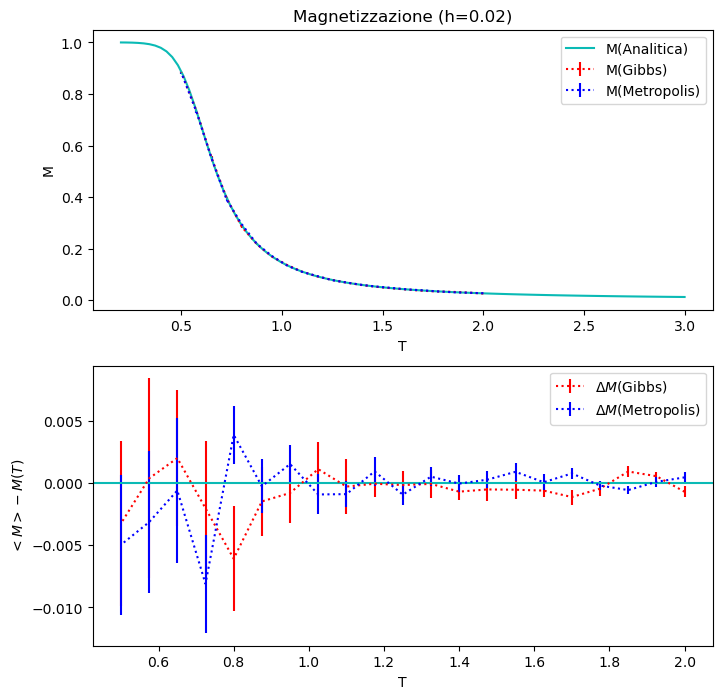

In [22]:
# carica i dati da file
data = np.loadtxt('LSN_lecture_06/Ising_1D/output.mag-Gibbs.02')
x=data[:,0]
yg=data[:,2]
errg=data[:,3]
data = np.loadtxt('LSN_lecture_06/Ising_1D/output.mag-Metro.02')
ym=data[:,2]
errm=data[:,3]

plt.figure(figsize = (8,8))

# disegna il grafico dei dati
plt.subplot(2,1,1)
plt.errorbar(x, yg, yerr = errg, linestyle="dotted", label="M(Gibbs)", color = "r")
plt.errorbar(x, ym, yerr = errm, linestyle="dotted", label="M(Metropolis)", color = "b")
plt.xlabel('T')
plt.ylabel('M')
plt.title('Magnetizzazione (h=0.02)')

# curva esatta
T = np.linspace(0.2,3.0,num=points)
def m(t):
    J = 1.0
    h=0.02 #external field
    b = 1/t
    Ns =50
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
            + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    return M
mag = m(T)
plt.plot(T, mag, label="M(Analitica)", color = '#0ABAB5')
plt.legend()

# disegna l'ingrandimento per gli errori
plt.subplot(2,1, 2)
mag = m(x)
plt.errorbar(x, yg-mag, yerr = errg, linestyle="dotted", label="$\Delta M$(Gibbs)", color = "r")
plt.errorbar(x, ym-mag, yerr = errm, linestyle="dotted", label="$\Delta M$(Metropolis)", color = "b")
plt.axhline(y=0, color ="#0ABAB5")
plt.xlabel('T')
plt.ylabel('$<M> - M(T)$')
plt.legend()

plt.show()

Per effettuare stime significative della magnetizzazione, trattandosi di un ferromagnete, abbiamo bisogno di "accendere" un debole campo esterno $(h = 0.002)$. Nonostante questa differenza, osserviamo un comportamento simile alle simulazioni delle altre quantità, con intervallo di di confidenza lievemente migliore, che sembra eccedere raramente le $2.0~\sigma$.

#### 6.1.4 Suscettibilità magnetica

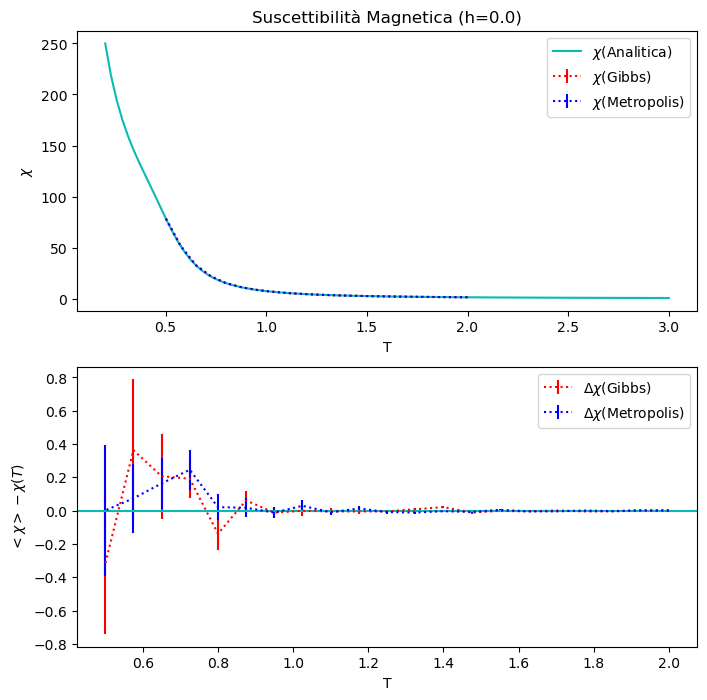

In [23]:
# carica i dati da file
data = np.loadtxt('LSN_lecture_06/Ising_1D/output.chi-Gibbs.0')
x=data[:,0]
yg=data[:,2]
errg=data[:,3]
data = np.loadtxt('LSN_lecture_06/Ising_1D/output.chi-Metro.0')
ym=data[:,2]
errm=data[:,3]

plt.figure(figsize = (8,8))

# disegna il grafico dei dati
plt.subplot(2,1,1)
plt.errorbar(x, yg, yerr = errg, linestyle="dotted", label="$\chi$(Gibbs)", color = "r")
plt.errorbar(x, ym, yerr = errm, linestyle="dotted", label="$\chi$(Metropolis)", color = "b")
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.title('Suscettibilità Magnetica (h=0.0)')

# curva esatta
T = np.linspace(0.2,3.0,num=points)
def chi(t):
    beta = 1/t
    J = 1.0
    Ns = 50
    th = np.tanh(J/t)
    thN= th**Ns
    ch = 1/th
    e = -J*( th + ch*thN )/( 1 + thN )
    X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
    return X
X = chi(T)
plt.plot(T, X, label="$\chi$(Analitica)", color = '#0ABAB5')
plt.legend()

# disegna l'ingrandimento per gli errori
plt.subplot(2,1, 2)
X = chi(x)
plt.errorbar(x, yg-X, yerr = errg, linestyle="dotted", label="$\Delta \chi$(Gibbs)", color = "r")
plt.errorbar(x, ym-X, yerr = errm, linestyle="dotted", label="$\Delta \chi$(Metropolis)", color = "b")
plt.axhline(y=0, color ="#0ABAB5")
#plt.yscale('symlog', linthresh=0.01)
#plt.ylim(-1, +1)
plt.xlabel('T')
plt.ylabel('$<\chi> - \chi(T)$')
plt.legend()

plt.show()

Tra le varie stime, infine, la suscettibilità magnetica sembra presentare il migliore accordo con i valori analitici, con stime che non sembrano mai eccedere le $1.5~\sigma$. Come evidenziato in precedenza, gli errori in questo caso descrescono fortemente (in valore assoluto) all'aumentare della temperatura, tanto da non essere apprezzabili senza un ingrandimento del grafico. Per una visualizzazione migliore si sconsiglia di scommentare le righe:
```python
    plt.yscale('symlog', linthresh=0.01)
    plt.ylim(-1, +1)
```
che visualizzano il grafico degli errori in una scala "simil logaritmica" che linearizza nei dintorni dello zero nell'intervallo specificato dall'opzione ```linthresh```.

Possiamo concludere che, seppur con soli venti blocchi, i due algoritmi presentano un ottimo accordo con i dati analitici. Siamo quindi ora provvisti di uno strumento molto potente che ci permette di *semplificare* enormemente il sampling di variabili casuali.

## 7. Backtracking <a id='##-7'></a>

Proviamo quindi ora a ripetere l'esperimento di [sezione 4](###-4) facendo però uso degli nuovi strumenti a nostra disposizione. La mossa di prova, in questo caso, sarà la variazione delle coordinate della molecola in un intervallo $[x_i-\delta/2; x_i+\delta/2]$, dove $\delta$ è un parametro arbitrario scelto in modo da rispettare la *regola empirica del 50%*. ($\delta_s$ = 0.11, $\delta_l$ = 0.2, $\delta_g$ = 5.0). 

In questo caso, il sistema viene trattato come un ensamble canonico, a temperatura fissa, pertanto dovremo eliminare nel codice l'implementazione di  ```walker[it]```, ovvero l'accumulatore dei valori di temperatura. 
La scelta di cambiare ensamble ci permette però di trattare con maggiore precisione l'interazione a due corpi.

### 7.1 Correzioni di coda

Nella [sezione 4](###-4), per alleggerire il peso computazione del codice, è stato introdotto un *raggio di cut-off*, oltre il quale è stata supposta nulla l'interazione tra due particelle. Questo fatto, seppur vero in prima approssimazione, in realtà introduce un piccolo errore sistematico nella simulazione, che è possibile correggere nel momento in cui riusciamo a conoscere il numero medio di molecole che popola queste code.

Grazie alla scelta del NVT, questo è chiaramente possibile a partire dalle distribuzioni di n particelle
$\rho^{(n)}(r_1...r_N)=\frac{N!}{(N-n)!}\int dr_{n+1}...dr_{N}~\frac{e^{-\beta V(r_1...r_N)}}{Z}$ come:
    $$g^{(n)}(r_1...r_N)\equiv\frac{\rho^{(n)}(r_1...r_N)}{\prod_{i=1}^N\rho^{(1)}(r_i)}\longrightarrow g^{(2)}(r_1,r_2)\equiv\frac{\rho^{(2)}(r_1,r_2)}{\rho^{(1)}(r_1)\rho^{(1)}(r_2)}$$

Dove, nel caso di potenziali invarianti per traslazione possiamo ricavare la distribuzione delle coppie, o **distribuzione radiale** come $g(r)=g^{(2)}(|\vec{r_1}-\vec{r_2}|)$ Questo ci permette quindi di calcolare le **tail corrections** per le quantità macroscopiche come ad esempio:

- $\langle U \rangle_{tail}= 2\pi\rho N \int_{r_c}^{+\infty}r^2dr~U_{LJ}(r)g(r)= 8\pi\rho^* N 
    \left(\frac{1}{9r_c^9}-\frac{1}{3r_c^3}\right)$
- $\langle p \rangle_{tail}= 2\pi\rho N \int_{r_c}^{+\infty}r^2dr~p(r)g(r)= 32\pi\rho^* \frac{N}{V^*} 
    \left(\frac{1}{9r_c^9}-\frac{1}{6r_c^3}\right)$

che abbiamo quindi implementato nel codice come:
```c++
    vtail = 8 * pi * rho * (1.0/(9*pow(rcut,9))-1.0/(3*pow(rcut,3)))* npart;
    ptail = 32* pi * rho * (1.0/(9*pow(rcut,9))-1.0/(6*pow(rcut,3)))* npart/vol;
```

ogni volta correggendo i valori ottenuti salvati nel ```walker``` tramite:
```c++
    walker[iv] = 4.0 * v + vtail;
    walker[ip] = rho*temp + 48. * f /((double)vol*3.) + ptail;
```
dove ```f``` e ```v``` sono definiti come nell'esercitazione 4.

### 7.2 Autocorrelazioni ed errori

Apportate queste correzioni vorremmo quindi effettuare le simulazioni con l'algoritmo di Metropolis per *ensamble canonici* di Molecole di Argon come nelle condizioni della sezione 4, che riportiamo di seguito per comodità:
1. solido: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. liquido: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. gassoso: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

Trascorso un preve periodo per l'equilibrazione del Metropolis (5000 blocchi e, attenzione, la temperatura in questo caso è fissa, pertanto non bisogna termalizzare il sistema), compiamo uno studio per determinare la scelta più opportuna per la lunghezza dei blocchi valutando autocorrelazioni ed errori. 

Per la natura intrinseca dell'algoritmo di Metropolis utilizzato, step consecutivi sono correlati (avranno una certa distanza massima tra loro ben determinata), per tanto sarà necessario prendere blocchi la cui grandezza è di gran lunga superiore al *tempo di correlazione*. In una catena di Markov, l'autocorrelazione $\chi(t)$ sulle stime di una variabile $m(t)$ è data da:
$$\chi(t) = \frac{\frac{1}{t_{max}-t}\sum_0^{t_{max}-t} m(t')m(t'+t)-\frac{1}{t_{max}-t}\sum_0^{t_{max}-t} m(t')\times\frac{1}{t_{max}-t}\sum_0^{t_{max}-t} m(t'+t)}{\frac{1}{t_{max}}\sum_0^{t_{max}} m^2(t')-\left(\frac{1}{t_{max}}\sum_0^{t_{max}} m(t')\right)^2}$$

Di seguito sono state svolte stime dell'energia interna $U$ su $500000$ blocchi da un passo Montecarlo e sono poi state calcolate le autocorrelazioni per i primi $200$ passi.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

tmax = 500000
phase = ["gas", "liquid", "solid"]
colors = ['r', 'b', 'g']

def acov(t, U) :
    s1=0.0
    s2=0.0
    s3=0.0

    for tp in range(tmax-t):
        s1 += U[tp]*U[tp+t]
        s2 += U[tp]
        s3 += U[tp+t]
    
    cost = 1./(tmax-t)
    
    return cost*s1-cost*s2*cost*s3

def chi(t, U) :
    return acov(t ,U)/acov(0, U)

U_g = U_l = U_s = []
U = [U_g, U_l, U_s]

for i in range (0,3):
    U[i] = np.loadtxt('LSN_lecture_07/MDNVE_MCNVT/output_epot_'+phase[i]+'.dat2', usecols=(1), unpack='true')
    print('Loaded '+phase[i])


Loaded gas
Loaded liquid
Loaded solid


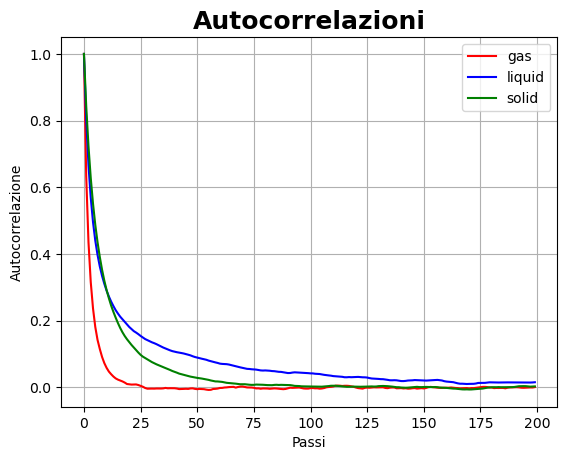

In [25]:
for i in range(0,3):

    y = [chi(t, U[i]) for t in range (200)]

    plt.plot(y, color = colors[i], label = phase[i])
    plt.xlabel("Passi")
    plt.ylabel("Autocorrelazione")
    plt.legend()
    plt.grid()

plt.title("Autocorrelazioni", fontsize = 18, fontweight = "bold")
plt.show()

Osserviamo che per tutte e tre le fasi, le autocorrelazioni decadono esponenzialmente con un tempo caratteristico inferiore a $25$ passi. 

Andiamo quindi ora a valutare l'andamento dell'errore attingendo dai dati del campione precedente. Si sono stimati gli errori ottenuti con la media a blocchi all'aumentare della lunghezza dei blocchi $L$ nell'intervallo $[10; 5000]$. 

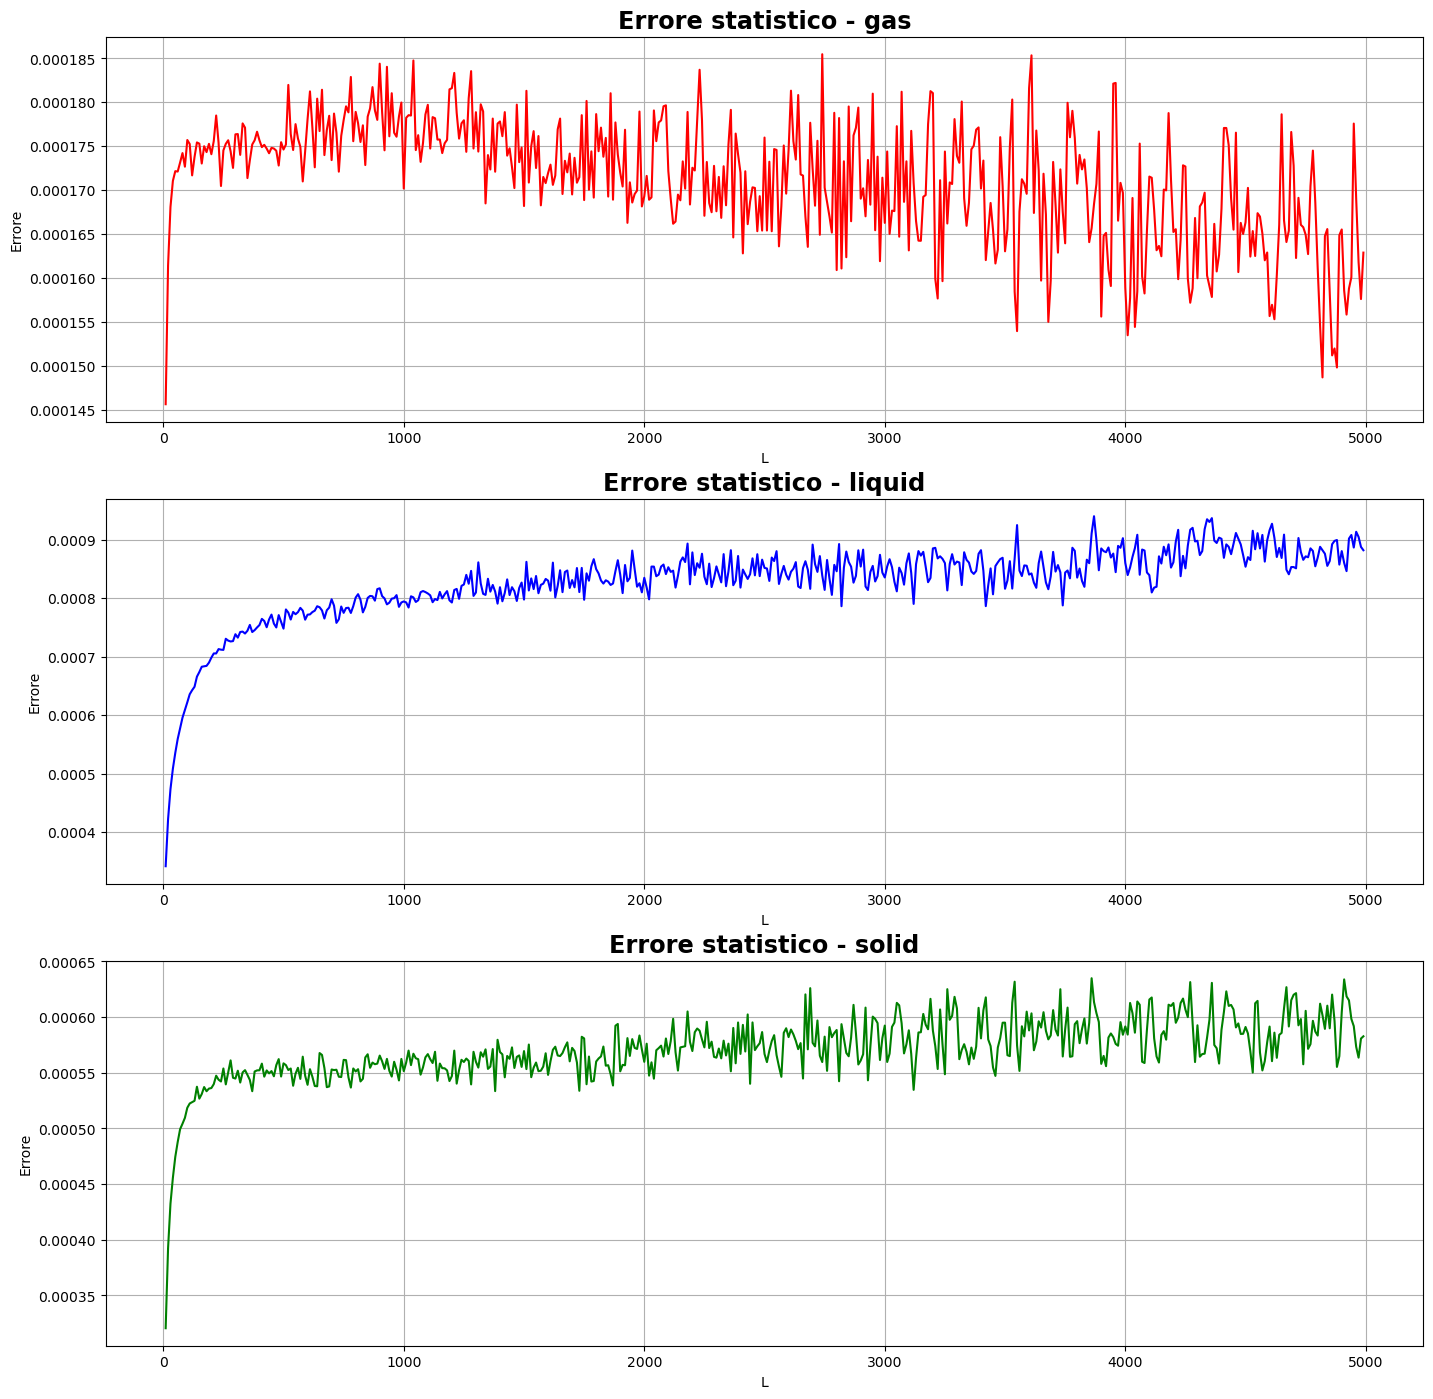

In [26]:
def Error(ave, ave2, n):
    if(n==0): 
        return 0
    return np.sqrt((ave2-ave**2)/n)

def dataBlocking(x, N, L):
    mean=0
    mean2=0
    error=0
    for n in range(N):
        mean_block=0
        for l in range(L):
            mean_block+=x[l+n*L]
        mean_block/=L
        mean=(mean*n+mean_block)/(n+1)
        mean2=(mean2*n+mean_block**2)/(n+1)
        error=Error(mean, mean2,n)
    return error

L_m=10
L_M=5000
M=500000

fig=plt.figure(figsize=(17, 17))

for i in range(0,3):
    plt.subplot(3,1,i+1)
    plt.title("Errore statistico - "+phase[i], size='xx-large', weight='bold')

    y=U[i]
    error=[]
    x=[]

    L_range = range(10,5000, 10)

    for L in L_range: 
        N=int(M/L)
        err=dataBlocking(y,N,L)
        error.append(err)
        x.append(L)

    plt.plot(x, error, label = phase[i], color = colors[i])
        
    plt.ylabel("Errore")
    plt.xlabel('L')
    plt.grid(True)
        
plt.show()

Osserviamo che per tutte e tre le fasi, dopo un iniziale transiente di un migliaio di passi, i valori degli errori iniziano a stabilizzarsi oscillando attorno ad un valore fisso.

Questo comportamento non ci deve stupire: le misure presenti in blocchi corti, come abbiamo verificato in precedenza, saranno fortemente correlate dando luogo a stime accurate, ma poco precise. Al contrario, per blocchi grandi, la correlazione tra le misure sarà pressocchè costante e quasi nulla e le misure saranno sempre all'incirca egualmente diffuse, generando errori più alti, costanti, ma garantendo il corretto funzionamento dell'algoritmo.

Sulla base di quanto osservato finora si è scelto di procedere con la simulazione di $50$ blocchi da $2000$ passi ciascuno.

### 7.3 Distribuzione radiale

Data la sua importanza in questa simulazione, saremmo interessati a vedere l'effettivo profilo della distribuzione radiale. Per fare questo modifichiamo il codice introducendo il calcolo della $g(r)$:

```c++
      min_dist = box/2.0; // risoluzione dell'istogramma della gdr
      bin_index = ng*(dr/min_dist); // posizione nell'istogramma

      if(dr<min_dist){
        gdr[ bin_index ] += 2;
      }
```
Costruiamo quindi un istogramma di ```ng```=$100$ bin ciascuno di larghezza ```box/2.0``` e lo riempiamo ogni volta aggiungendo le coppie di molecole che popolano il bin corrispondente. 

```c++
    for (int i=0; i<100; i++)
    {
    gdr_ave[i]=gdr_ave[i]+gdr[i];
    gdr[i]=0;
    }
```
Accumuliamo quindi i valori campionati nel vettore ```gdr_ave```, liberando ```gdr``` per un nuovo passo.
```c++
     double gdr_norm=0;             
     for(int i=0; i<ng; i++)           // normalizzo le medie della gdr
     {
          double r = i*(min_dist)/ng;  // distanza tra due particelle
          double dr = (min_dist)/ng;   // risoluzione della gdr
          gdr_norm = rho*npart *4.*M_PI/3.0 *(pow(r+dr, 3)-pow(r , 3)); // volume del guscio
          gdr_ave[i] = double(gdr_ave[i]/(double)blk_norm)/gdr_norm;    // medie su gdr.
     }

    for(int i=0; i<ng; i++){
      Gdr << gdr_ave[i] << " "; // stampo le medie di blocco su ogni bin
    }
    Gdr << endl;*/
```
Dal momento che ogni bin in coordinata radiale rappresenta in realtà un guscio nello spazio tridimensionale, è necessario normalizzare i valori di ogni bin sui gusci prima di stampare su file le occupazioni di ogni bin. Alla fine di ogni blocco il vettore ```gdr_ave``` viene poi svuotato per ricominciare il ciclo. In questo modo salviamo su file le stime su ogni blocco dei valori di $g(r)$, mentre il valor medio totale e la relativa incertezza saranno calcolati in fase di grafico nella sezione seguente.

### 7.4 Risultati

Abbiamo quindi simulato con l'algoritmo M(RT)^2 la dinamica di un ensamble canonico di molecole di Argon nelle tre fasi solida, liquida e gassosa. Abbiamo effettuato poi le stime di energia interna, pressione e distribuzione radiale su $50$ blocchi da $2000$ passi ciascuno e rappresentato i risultati nello specchietto che segue.

Il programma che segue calcola anche i valori medi delle occupazioni dei bin della distribuzione radiale, sia nel caso della simulazione con l'algoritmo di Metropolis, sia con quello di Verlet e rappresenta il confronto con errori.

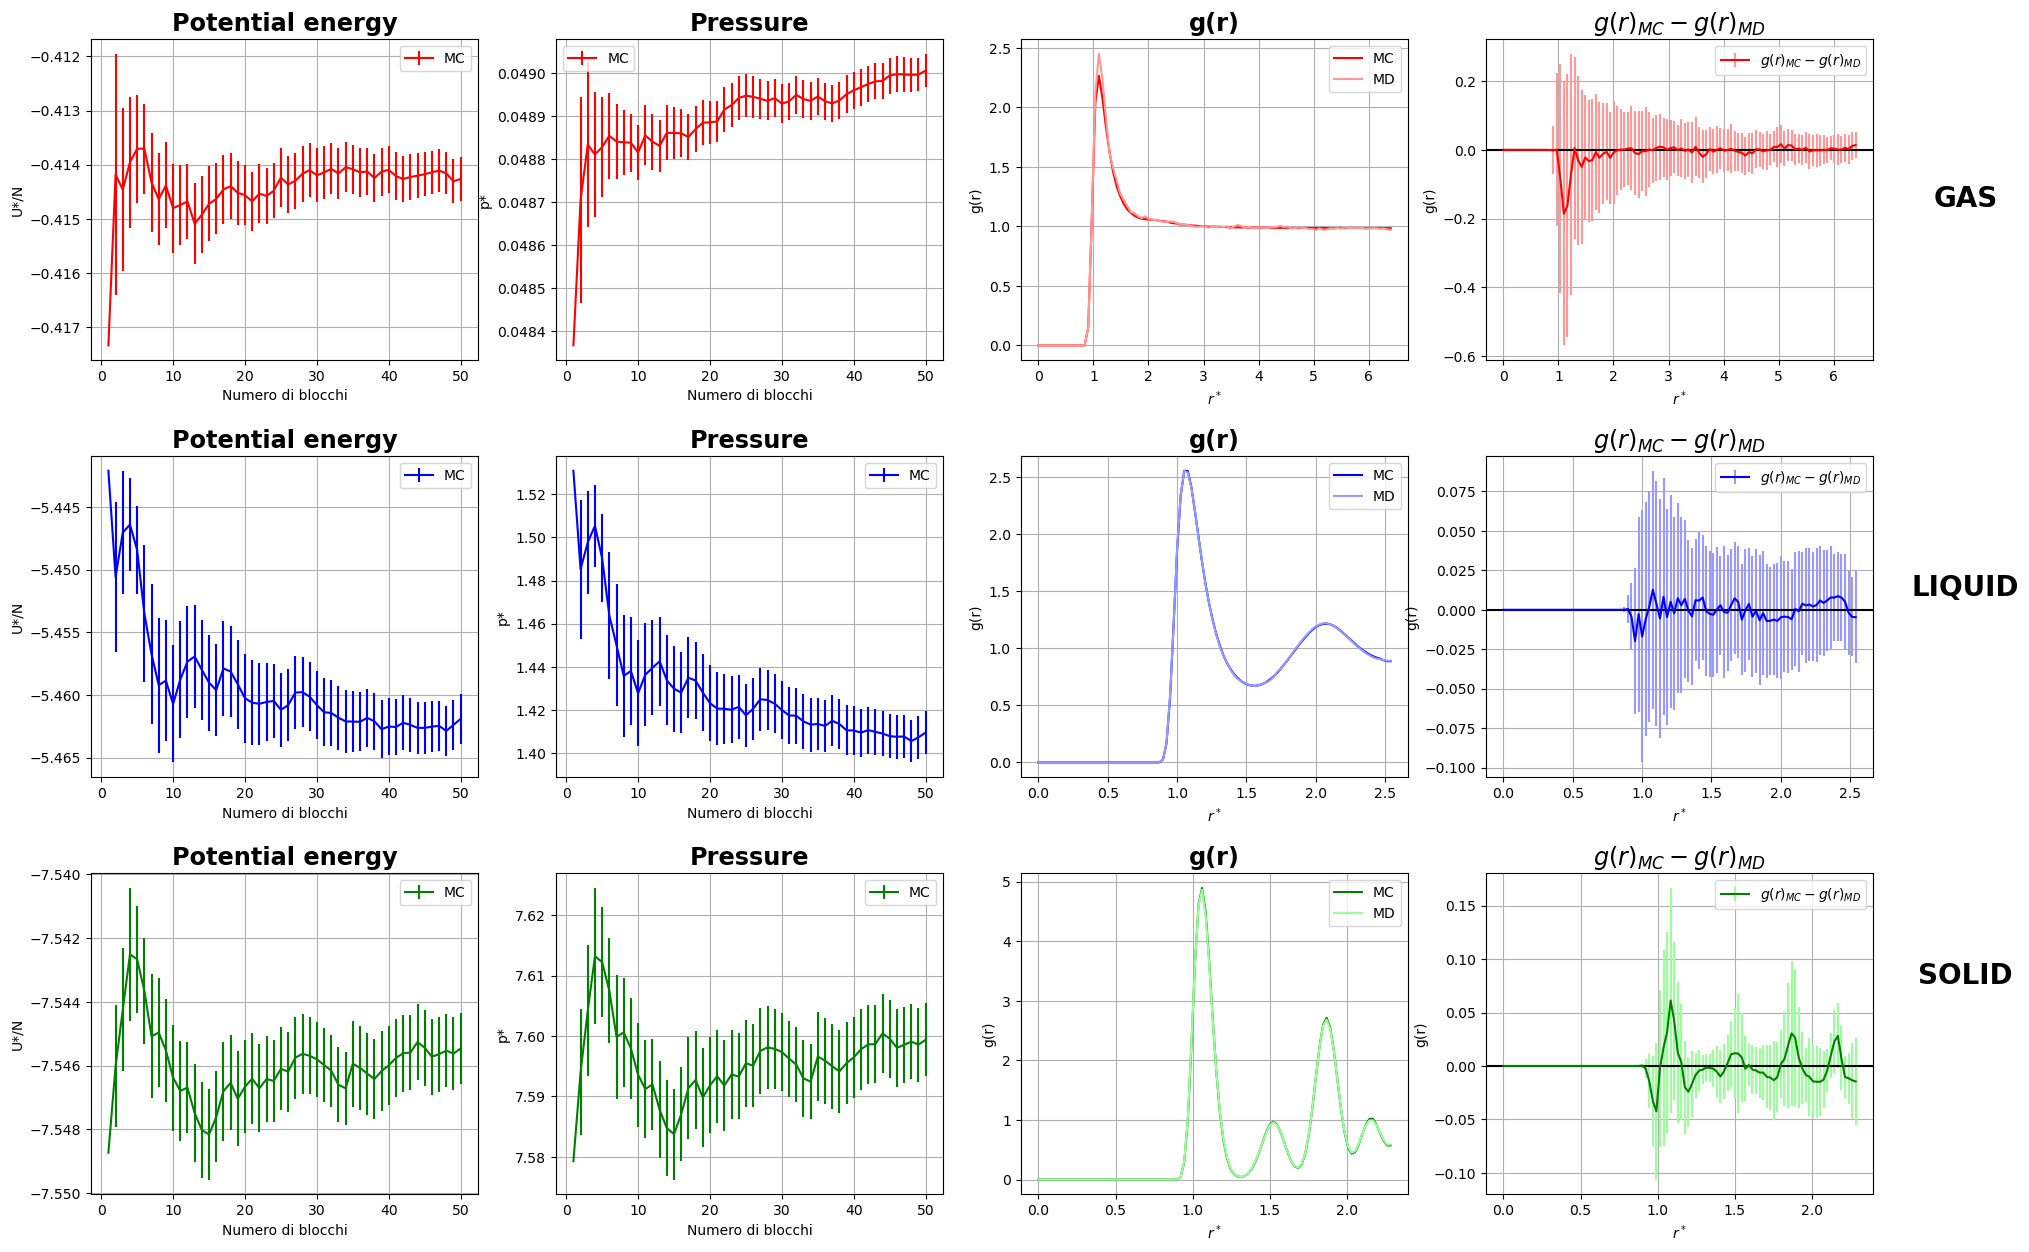

In [27]:
# use 50blks, 2000step
npart = 108

meth = ["NVT", "NVE"]
algorithm = ['MC', 'MD']
colors = [["r", [1,0.6,0.6]],["b",[0.6,0.6,1]],["g",[0.6,1,0.6]]]
phase = ["gas", "liquid", "solid"]

thermod_vars = ["epot",             "pres",             "gdr"        , "gdr_diff"               ]
titles       = ["Potential energy", "Pressure",         "g(r)",        "$g(r)_{MC}-g(r)_{MD}$"  ] 
units        = ["U*/N",             "p*",               "g(r)",        "g(r)"                   ]
ascix        = ["Numero di blocchi","Numero di blocchi","$r^*$",       "$r^*$"                  ]

# box scaling
rho = [0.05, 0.8, 1.1]
L = [0.0,0.0,0.0]
for i in range(3):
    L[i] = ((rho[i]/npart)**(-1/3))/200 # campiona fino a box/2.0 100 bin, è la lunghezza di ogni bin

fig=plt.figure(figsize=(23, 15))
plot_index = 0
i = 0 # phase index
j = 0 # th_var index
k = 0 # alg index

ng = 100
x=np.arange(0,ng)

# ciclo sulle fasi
for ph in phase:
    
    
    # ciclo su U/N, p, gdr, gdr_diff
    for td_v in thermod_vars:

        plot_index +=1
        plt.subplot(3,4,plot_index)

        if td_v == "pres" or td_v == "epot":
            x, y , err= np.loadtxt("LSN_lecture_07/MDNVE_MCNVT/output_"+td_v+"_"+ph+".datNVT", usecols = (0, 2, 3), unpack='true')
            plt.errorbar(x, y, err, marker='', label="MC", color = colors[i][0])

        if td_v == "gdr":
            # ciclo su MC/MD
            for a in range(2):
                gdr = np.loadtxt("LSN_lecture_07/MDNVE_MCNVT/output_"+td_v+"_"+ph+".dat"+meth[a], usecols=range(0,100), unpack='true', max_rows=ng)
                y = np.mean(gdr, axis=1) #calcola la media per ogni bin
                x=np.arange(0,100)
                plt.plot(x*L[i], y, marker='', label=algorithm[a], color = colors[i][k])
                #plt.xlim(0,100)
                k+=1

        if td_v == "gdr_diff":
            # ciclo su MC/MD
            gdrMC = np.loadtxt("LSN_lecture_07/MDNVE_MCNVT/output_gdr_"+ph+".datNVT", usecols=range(0,100), unpack='true', max_rows=ng)
            gdrMD = np.loadtxt("LSN_lecture_07/MDNVE_MCNVT/output_gdr_"+ph+".datNVE", usecols=range(0,100), unpack='true', max_rows=ng)
            y = np.mean(gdrMC, axis=1)-np.mean(gdrMD, axis=1)
            err = np.std(gdrMC, axis=1)+np.std(gdrMD, axis=1)
            x=np.arange(0,100)
            plt.errorbar(x*L[i], y, err, marker='', label="$g(r)_{MC}-g(r)_{MD}$", color = colors[i][0], ecolor = colors[i][1])
            plt.axhline(y=0, color = "k")

        plt.title(titles[j], size='xx-large', weight='bold')
        plt.ylabel(units[j])
        plt.xlabel(ascix[j])
        plt.grid(True)
        plt.legend()
        k=0
        j+=1
        
    j=0
    i+=1

txt = ("GAS\n\n\n\n\n\n\n\n\n\n\n\n"
       "LIQUID\n\n\n\n\n\n\n\n\n\n\n\n"
       "SOLID")
fig.text(0.94, 0.25, txt, ha='center', weight="bold", size=20)

plt.subplots_adjust(hspace=0.3)

plt.show()

Al netto delle differenze nei due modelli, osserviamo una certa coerenza tra i valori simulati di pressione ed energia potenziale simulati qui ed in sezione 4, con la differenza che, in questo caso, le incertezze sono decisamente inferiori e il modello tiene conto delle correzioni di coda.

Possiamo poi osservare le distribuzioni radiali. Nel caso gassoso la distribuzione è uniforme per grandi distanze, mentre presenta un solo picco a piccoli valori della distanza relativa (certifica la rarità nella fase gassosa di stati legati di molecole), mentre nei casi liquido e, ancor più, solido, possiamo osservare l'aumento in valore di questo primo picco e la comparsa di picchi secondari che ci suggeriscono l'organizzazione in sovrastrutture delle varie molecole.

Al netto delle differenze tra i modelli, osserviamo che le distribuzioni radiali campionate con il Metropolis sono in perfetto accordo con quelle derivanti dalla simulazione in dinamica molecolare, fatto che ci abilita a sostenere l'efficacia del Metropolis, che non solo riproduce i risultati del Verlet, ma produce stime più precise e permette di tenere conto di effetti di correzioni di coda.

## 8. Less is more <a id='##-8'></a>

Una vasta classe di problemi reali può essere ricondotta a **problemi di ottimizzazione**: che si tratti del fit di un set di dati sperimentali, della pianificazione di un itinerario o la scelta di un prezzo, minimizzazione di errori e massimizzazione dei profitti sono, con tutta probabilità, i pilastri su cui si fonda la società contemporanea.

La Fisica, infine, nella sua formulazione in termini di *principio di minima azione* o nel formalismo dell'*integrale funzionale* è un gigantesco problema di ottimizzazione.

#### 8.0.1 Tempre simulate

Appurata la rilevanza di questa classe di problemi possiamo quindi chiederci come sia possibile approcciarli per mezzo degli strumenti trattati finora ed, in particolare, del M(RT)^2. 

Una possibile soluzione è fornita dal metodo del **simulated annealing (SA)**. L'idea è la seguente: la soluzione candidata del problema di ottimizzazione viene lasciata evolvere come fosse un metallo ad una temperatura assegnata $T$, dove la probabilità di effettuare la transizione da una configurazione di *costo* $L_i$ a una di costo $L_j$ è data dal rapporto dei rispettivi pesi di Boltzmann: $p_{ij} = \exp(L_j-L_i)/T$. Si procede poi ad abbassare gradualmente la temperatura, in questo modo il sistema, sempre meno mobile, tenderà a "cristallizzarsi" nella configurazione dal costo minore, analogamente a quanto accade nel caso della tempra dei metalli.

Un simile metodo è tanto più efficace quanto più il raffreddamento è lento, e comunque **non garantisce** la sicurezza di aver trovato un minimo globale dal momento che, durante il raffreddamento, il sistema potrebbe ritrovarsi incagliato all'interno di configurazioni *metastabili*. È il caso soprattutto delle *very rugged potential energy surfaces*, dove si procederà sviluppando vari SA in quello che viene chiamato un **parallel tempering** (si veda la [sezione 10](###-10)).

### 8.1 Terra stati

Secondo la teoria delle perturbazioni, in meccanica quantistica il valore di aspettazione di un Hamiltoniana $H$ rispetto ad uno stato di prova $|\Psi_T\rangle$ è limitato inferiormente dall'energia di ground state $E_0$ data da:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

L'obiettivo di questa sezione è determinare variazionalmente il ground state di una particella unidimensionale sottoposta al potenziale:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
Sfruttando il seguente ansatz per la funzione d'onda:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

dove il SA cercherà di determinare i valori ottimali di $\mu$ e $\sigma$.

Ad ogni step di SA, il codice valuta la probabilità di transizione da una configurazione all'altra stimando il valore di aspettazione dell'Hamiltoniana campionando $|\Psi_T^{\sigma,\mu}(x)|^2$ con M(RT)^2 dotato di $T(x|y)=1$. Questo integrale viene ogni volta stimato per mezzo della media su $100$ blocchi da $1000$ passi ciascuno.

Contemporaneamente si svolgono $1000$ blocchi da $10$ mosse di SA alla stessa temperatura dove viene proposta la modifica dei parametri $\mu_0 = 0.8$ e $\sigma_0 = 0.6$ di $\pm\delta = 0.15$. Il valore dell'inverso della temperatura viene poi incrementato ogni volta di $10$ unità a partire da $\beta = 100$.

### 8.2 Risultati

Si riportano di seguito quindi i risultati del SA.

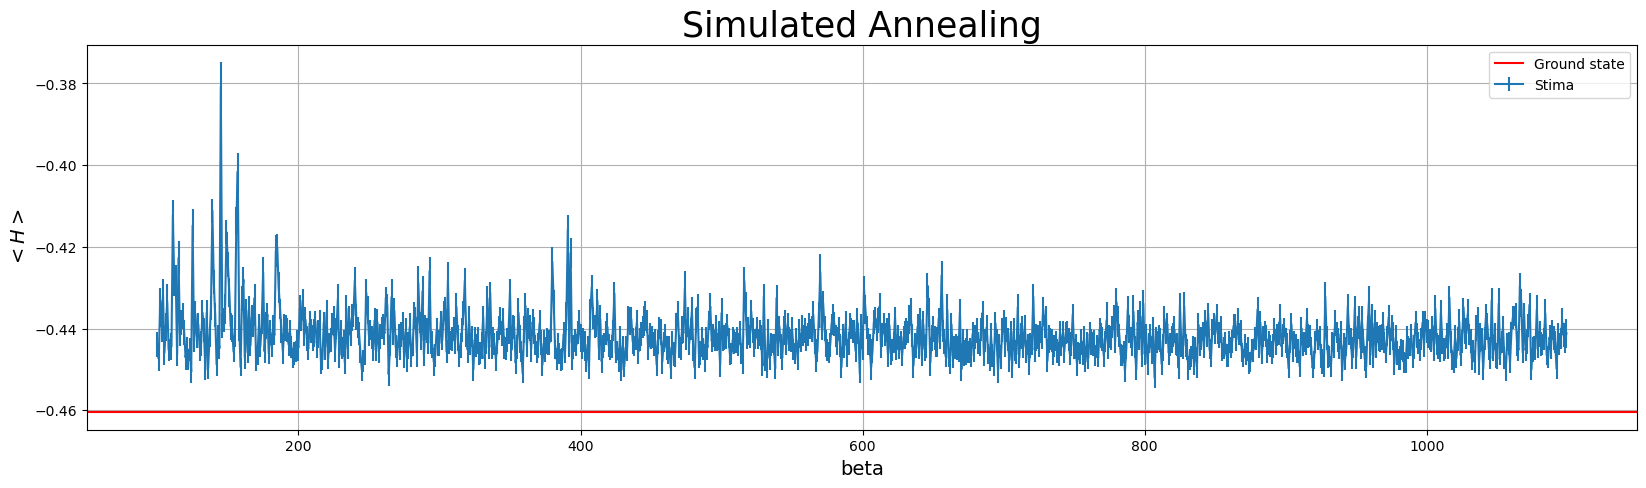

In [28]:
import numpy as np
import matplotlib.pyplot as plt

beta, E, err = np.loadtxt('LSN_lecture_08/energy.dat', usecols = (0,1,2), unpack='true')

fig=plt.figure(figsize = (20,5))
plt.errorbar(beta, E, yerr=err, label = 'Stima')
plt.grid(True)
plt.axhline(y=-0.46046587969271513, color = 'r', linestyle = '-', label = 'Ground state')
plt.xlabel('beta', fontsize = 14)
plt.ylabel('$ <H> $', fontsize = 14)
plt.legend()

plt.title('Simulated Annealing', size = 25)
plt.show()

Da ripetute esecuzioni del programma abbiamo potuto scegliere dei valori iniziali per $\mu$ e $\sigma$ che fossero già abbastanza vicini al valore atteso. Osserviamo che, al diminuire della temperatura, la distanza delle configurazioni visitate dal SA diminuisce costantemente e le stime tendono alla convergenza al valor vero.

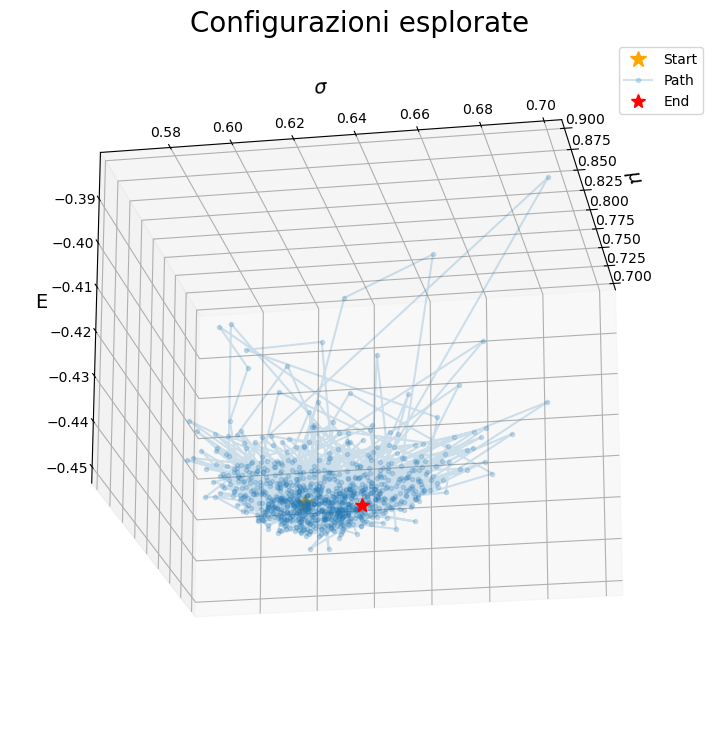

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

mu, sgm = np.loadtxt('LSN_lecture_08/config.dat', usecols = (1,2), unpack = 'true')

ax.plot(mu[0], sgm[0], E[0], marker='*', markersize = 12, color = "orange", label = "Start", linestyle = "")
ax.plot(mu, sgm, E, marker='.', linestyle = "-", label = "Path", alpha=0.2)
ax.plot(mu[-1], sgm[-1],E[-1], marker='*', markersize = 10, color = "r", label = "End", linestyle = "")
ax.set_xlabel('$ \mu $', fontsize = 14)
ax.set_ylabel('$ \sigma $', fontsize = 14)
ax.set_zlabel('E', fontsize = 14)
plt.title("Configurazioni esplorate", size = 20)
ax.legend()

ax.view_init(elev=-20, azim=10) #regola elevazione e azimuth
plt.show()

Da una rappresentazione grafica del percorso del SA possiamo intuire la superficie definita dall'energia nello spazio dei parametri: si tratta di una sorta di paraboloide dalla punta schiacciata centrato circa in $(0.8, 0.6)$. 

L'osservazione del percorso ci permette di confermare la corretta individuazione del minimo, ma la possibilità che l'algoritmo continui a effettuare piccole oscillazioni attorno ad esso potrebbe minare la sua effettiva convergenza al valor vero.

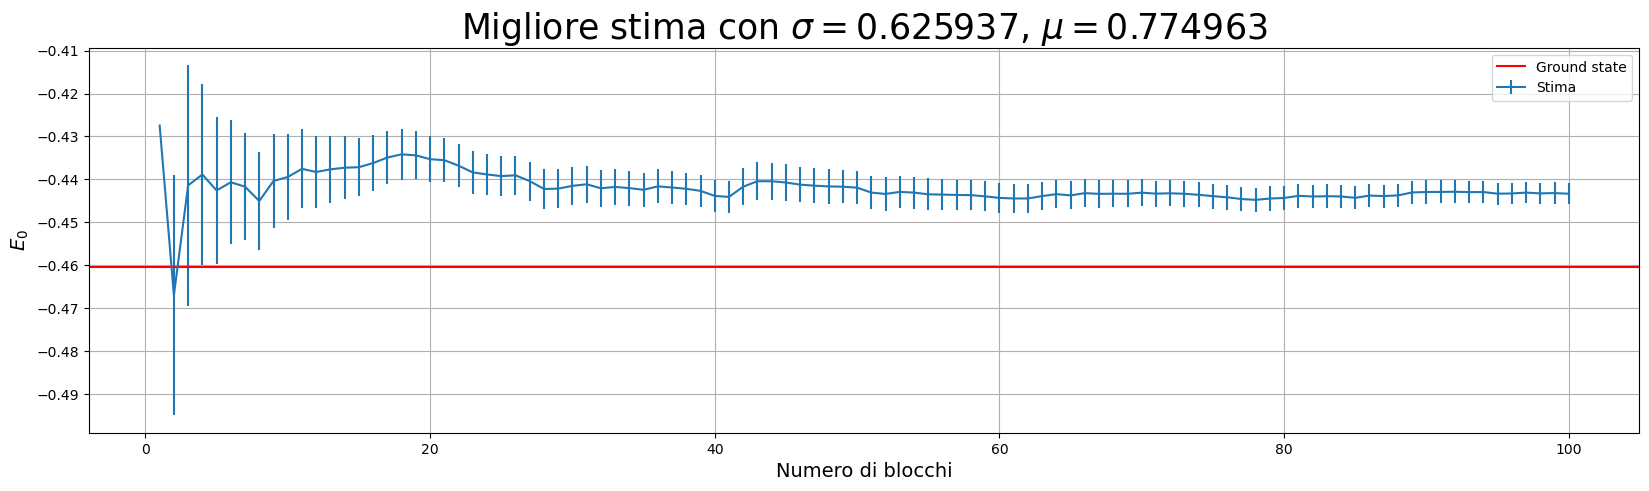

In [30]:
steps, E, err = np.loadtxt('LSN_lecture_08/energy_finale.dat', usecols = (0,2,3), unpack='true')

fig=plt.figure(figsize = (20,5))
plt.errorbar(steps, E, yerr=err, label = 'Stima')
plt.grid(True)
plt.axhline(y=-0.46046587969271513, color = 'r', linestyle = '-', label = 'Ground state')
plt.xlabel('Numero di blocchi', fontsize = 14)
plt.ylabel('$ E_0 $', fontsize = 14)
plt.legend()

plt.title('Migliore stima con $ \sigma = $'+str(sgm[-1])+', $ \mu = $'+str(mu[-1]), size = 25)
plt.show()

La media progressiva del valore di energia ottenuto per i valori dei parametri scelti dall'algoritmo conferma il sospetto di cui sopra: l'algoritmo riesce a determinare per sommi capi la regione del minimo, ma la particolare configurazione del problema gli impedisce di effettuare stime estremamente precise dell'energia di ground state.

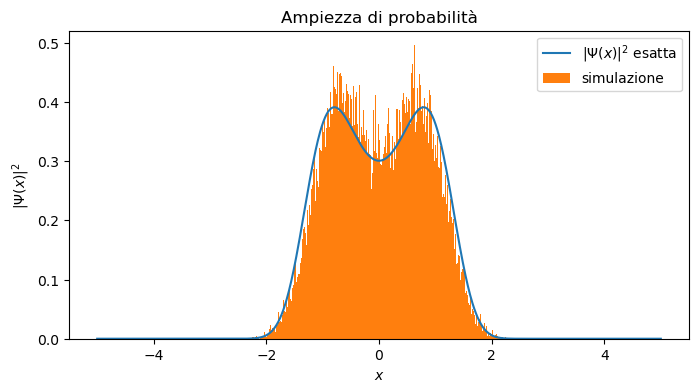

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# leggi i dati da file
dati1 = np.loadtxt('LSN_lecture_08/psi.dat')

#per il calcolo esatto
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#grafichiamo
plt.figure(figsize = (8,4))
plt.plot(x,(psi[0])**2, label="$|\Psi(x)|^2$ esatta")
plt.hist(dati1, bins=300, density=True, label="simulazione")
plt.xlabel('$x$')
plt.ylabel('$|\Psi(x)|^2$')
plt.title('Ampiezza di probabilità')
plt.legend()
plt.show()

Confrontiamo poi i valori campionati di $|\Psi(x)|^2$ rispetto a quelli previsti dalla soluzione esatta. Con un campionamento di $100000$ punti notiamo un buon accordo tra teoria e simulazione, con una lieve sovrastima dei massimi e sottostima dei minimi della distribuzione.

Per migliorare la simulazione sarà probabilmente necessario diminuire gradualmente il valore del parametro di mossa `deltapar` in modo da mantenere l'accettazione attorno al 50%. Non solo, il più grande ostacolo è rappresentata dall'incertezza sulla stima dell'energia, che può quindi portare ad accettare mosse in realtà illegali. Pertanto un'altra modifica importante può essere l'incremento graduale dei punti utilizzati per stimare l'integrale all'abbassarsi delle temperature.

## 9. Selezioni artificiali <a id='##-9'></a>

Nella sezione precedente abbiamo potuto osservare come sia possibile, grazie alla simulazione, giungere alla soluzione di un problema fisico senza direttamente cercare la soluzione al problema in questione (la determinazione del ground state di un sistema quantistico), ma immergendolo piuttosto in un differente problema e ricercando la soluzione di quest'ultimo (l'evoluzione di un sistema sottoposto a raffreddamento).

Un esempio ancora più estremo di questa pratica sono sicuramente gli **algoritmi genetici**. In questo tipo di algoritmi, la soluzione ad un determinato problema fisico viene determinata a partire da una **popolazione** di soluzioni candidate le quali evolvono nel tempo per mezzo di mutazioni, incentivate dal dover minimizzare una certa funzione costo. In questo modo, non sarà praticamente necessario conoscere il contesto del problema da risolvere, ma soltanto poter definire in modo appropriato la funzione costo (e sperare che non presenti troppe configurazioni metastabili).

### 9.1 Valtur

Il problema su cui testeremo il funzionamento di questi algoritmi è il cosiddetto **problema del commesso viaggiatore (TSP)**, che richiede la minimizzazione del percorso impiegato per raggiungere $N$ città differenti tornando sempre al punto di partenza. 

Scegliamo come funzione costo, la norma quadra del percorso, definita come:
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$
Dove le ${\vec{x}_i}$ sono le coordinate spaziali delle città visitate. 
La popolazione di soluzioni candidate sarà costituità da vettori di interi  da $1$ a $N$, ovvero l'ordine con cui si sceglie di visitare le città.

Ad ogni iterazione dell'algoritmo, la popolazione viene ordinata per costo crescente e viene successivamente sottoposta a mutazioni con il metodo ```Population::Mutate()``` che, selezionando con preferenza i primi elementi della lista con il metodo ```Population::Select()```, procede con l'effettuare mutazioni sulla popolazione e dando origine ad una nuova generazione.

Le mutazioni proposte sono le seguenti:
- ```Path::pair_permutation()```: selezionate due città, le scambia tra loro
- ```Path::n_shift();```: shift di $n$ posizioni di blocchi di $m$ città consecutive
- ```Path::m_permutation();```: permutazioni di blocchi di $m$ città
- ```Path::inversion();```: inversione di un blocco di $m$ città

A queste viene poi aggiunta ```Population::crossing_over()``` che, a partire da due invidui genitori, genera un indivuo della nuova generazione formato dall'unione di due blocchi, anche diseguali, dei genitori. Si osserva che questo tipo di mutazione è un ottimo catalizzatore per la convergenza dell'algoritmo, pertanto verrà effettutata con un probabilità più alta rispetto alle altre.

Per una corretta convergenza sarà importante mantenere una buona varietà genetica all'interno della popolazione: una popolazione contraddistinta da un costo medio molto simile al miglior costo non necessariamente sarà in grado di trovare la soluzione del problema. Nel caso l'evoluzione si imbattesse in una configurazione fortemente metastabile, l'algoritmo non avrebbe grandi possibilità di uscirne per mezzo di ```Population::crossing_over()```, che finirebbe per clonare quasi identicamente gli individui nella generazione successiva, e dovrebbe puntare sul solo supporto delle mutazioni ordinarie.

Abbiamo quindi applicato l'algoritmo alla risoluzione di due TSP con $N=34$ città risposte rispettivamente sul bordo di una circonferenza di raggio unitario o all'interno di un quadrato di lato unitario. Le popolazioni sono state scelte di $1000$ individui, di seguito i risultati:

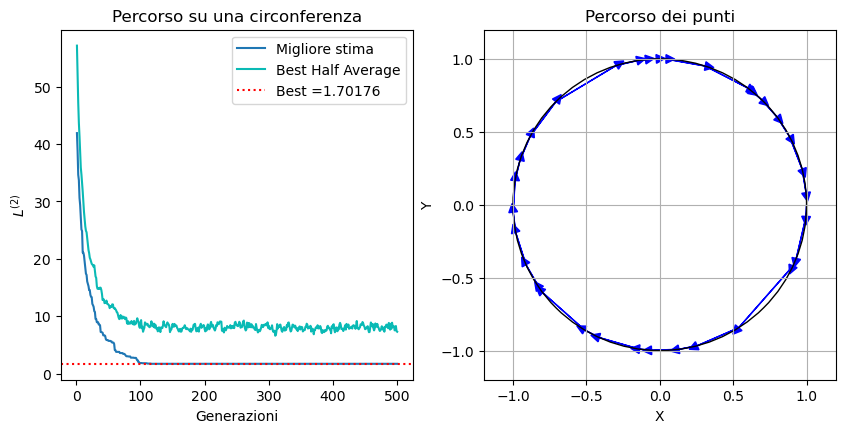

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x, best = np.loadtxt('LSN_lecture_09/circle_best.dat2', usecols=(0,1), unpack = 'true')
av = np.loadtxt('LSN_lecture_09/circle_average.dat2', usecols=(1), unpack = 'true')

fig=plt.figure(figsize = (10,10))
plt.subplot(2,2, 1)
plt.plot(x, best, label = 'Migliore stima')
plt.plot(x, av, label = 'Best Half Average', color = '#0ABAB5')
plt.axhline(y = best[-1], linestyle='dotted', color = 'r', label = 'Best ='+str(best[-1]))
plt.xlabel('Generazioni')
plt.ylabel('$L^{(2)}$')
plt.title('Percorso su una circonferenza')
plt.legend()

plt.subplot(2, 2, 2)
# leggi i dati dai file
x_coords, y_coords = np.loadtxt("LSN_lecture_09/best_final_circle.dat2", usecols = (0,1), unpack = 'true')

# Crea il grafico
for i in range(1, len(x_coords)):
    dx = x_coords[i] - x_coords[i-1]
    dy = y_coords[i] - y_coords[i-1]
    plt.arrow(x_coords[i-1], y_coords[i-1], dx, dy, head_width=0.06, head_length=0.06, fc='blue', ec='blue')

# Aggiungi la circonferenza
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_patch(circle)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Percorso dei punti")
plt.grid(True)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

plt.show()

Nel grafico di destra possiamo osservare come, nel giro di un centinaio di generazioni, l'algoritmo avesse già raggiunto la convergenza. Assieme alla lunghezza del migliore percorso è stata poi rappresentata la lunghezza media della migliore metà della popolazione: osserviamo che anche questo valore tende a convergere, ma rimane ben distante dalla migliore stima, garantendo una buona varietà genetica della popolazione.

Nel grafico di sinistra possiamo poi verificare che il percorso trovato è effettivamente il miglior percorso (ovvero quello che prevede di percorrere le città ordinatamente seguendo la circonferenza).

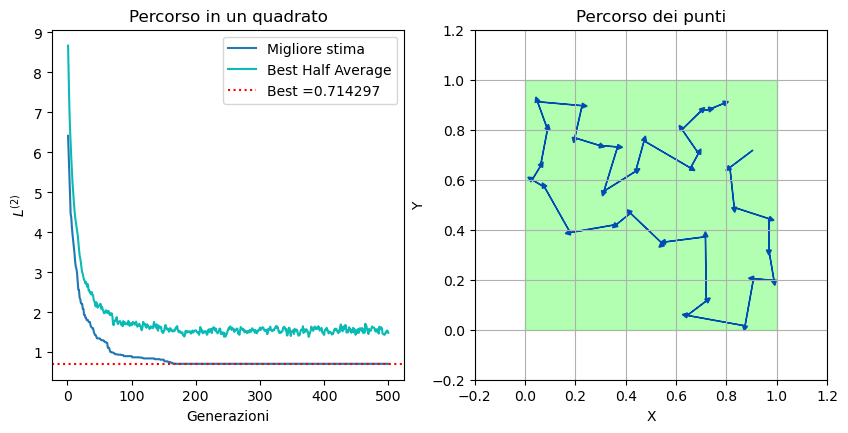

In [20]:
x, best = np.loadtxt('LSN_lecture_09/square_best.dat2', usecols=(0,1), unpack = 'true')
av = np.loadtxt('LSN_lecture_09/square_average.dat2', usecols=(1), unpack = 'true')

fig=plt.figure(figsize = (10,10))
plt.subplot(2,2, 1)
plt.plot(x, best, label = 'Migliore stima')
plt.plot(x, av, label = 'Best Half Average', color = '#0ABAB5')
plt.axhline(y = best[-1], linestyle='dotted', color = 'r', label = 'Best ='+str(best[-1]))
plt.xlabel('Generazioni')
plt.ylabel('$L^{(2)}$')
plt.title('Percorso in un quadrato')
plt.legend()

plt.subplot(2,2, 2)
# leggi i dati dai file
x_coords, y_coords = np.loadtxt("LSN_lecture_09/best_final_square.dat2", usecols = (0,1), unpack = 'true')
# Crea il grafico
for i in range(1, len(x_coords)):
    dx = x_coords[i] - x_coords[i-1]
    dy = y_coords[i] - y_coords[i-1]
    plt.arrow(x_coords[i-1], y_coords[i-1], dx, dy, head_width=0.02, head_length=0.02, fc='blue', ec='blue')

# Disegna il quadrato riempito
square_x = [0, 1, 1, 0, 0]
square_y = [0, 0, 1, 1, 0]
fill_color = (0.0, 1.0, 0.0, 0.3)  # Colore blu con alpha 0.3 per un riempimento meno saturo
plt.fill(square_x, square_y, color=fill_color)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Percorso dei punti")
plt.grid()
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)


plt.show()

Considerazioni analoghe possono essere fatte anche per il percorso nel quadrato, dove la convergenza della migliore stima avviene dopo un numero di generazioni simile (seppur a fronte di una popolazione più ampia), mentre la BHA si mantiene costantemente ad un valore decisamente più alto.

A sinistra possiamo valutare la forma del migliore percorso, che nel caso di percorsi bidimensionali sembra spesso essere una spezzata semplice (chiusa).

## 10. Piani vacanze paralleli <a id='##-10'></a>

Nelle ultime due sezioni abbiamo iniziato a sviluppare tecniche per risolvere *problemi di minimizzazione* che potessero risolvere con profitto un'ampia classe di problemi senza entrarne nel merito della teoria. Abbiamo verificato inoltre che questi algoritmi, seppur efficaci, sono estremamente dipendenti dai dati iniziali, la cui scelta, a discrezione dell'utilizzatore, è in grado di determinare il successo o il fallimento della simulazione stessa. 

Un altro discriminante fondamentale, inoltre, risulta essere il numero di mosse effettuate, il cui aumento per migliorare la convergenza dell'algoritmo comporta però, spesso, un peso computazionale notevole. 

Per questo motivo in questa sezione implementeremo algoritmi di calcolo parallelo che non solo siano in grado di svolgere più speditamente le simulazioni, ma eventualmente anche liberare la simulazione da configurazioni metastabili.

### 10.1 Il Cromosoma Ben Temperato

Per ottenere questo risultato implementeremo il **Parallel Tempering (PT)** di cui abbiamo accennato in [sezione 8](###-8). L'idea è la seguente, data una popolazione di soluzioni candidate, la loro evoluzione sarà determinata come quella di un ensamble NVT sottoposto a SA. Ogni individuo avrà una temperatura di partenza differente e sarà sottoposto alle mutazioni della [sezione precedente](###-9), dove la probabilità di mutazione però non è più definita a priori, bensì è data dal rapporto dei pesi di Boltzmann corrispondenti alle due configurazioni.

Al posto del *crossing-over* è stata poi invece implementata la possibilità da parte degli individui di passare alla temperatura di annealing del vicino con la funzione ```Adjacent_Exchange()```, che effettua lo scambio di SA secondo la probabilità: $p_{ij}=\exp[-(\beta_j-\beta_i)(L_i-L_j)]$. 
```c++
    void Adjacent_Exchange(Path a, Path b)
    {
        double bolz = exp(-(b.beta-a.beta)*(a.L2(cities)-b.L2(cities)));
        if(rnd.Rannyu() < bolz)
        {
            Swap(a, b);     //effettua lo scambio
            SAaccepted ++;  //aggiorna i contatori
        }
        SAattempted++;      //aggiorna i contatori
    }
```

Questa sostanziale modifica, come vedremo, è proprio la mutazione necessaria all'algoritmo per superare eventuali minimi locali, nei quali invece gli annealing adiacenti potrebbero non essersi imbattuti. La soluzione candidata alla soluzione del problema, infine, sarà localizzata sul SA a temperatura più bassa.

#### 10.1.1 More Power to Intelligence

Per quanto riguarda l'efficienza computazionale, invece, si è implementata la **parallelizzazione** del codice con la libreria  ```mpi.h``` (Message Passing Interface). In tal modo è possibile distribuire la simulazione dei diversi SA sui vari processori della macchina. 

All'esecuzione del programma infatti all'utente è richiesto di specificare il numero di *nodi* ```ncore``` che si vogliono effettuare tramite la stringa:
```
    mpiexec -np <ncore> TSP_MPI.exe
```
che saranno poi successivamente identitificabili nel programma tramite l'intero ```rank```.

Il programma costruirà poi un vettore di ```ncore``` popolazioni di $N$ individui ciascuno dotato di un valore determinato di temperatura. Questi individui saranno sottoposti a SA ed effettueranno Adjacent Exchange. Per gli scambi tra elementi consecutivi, ma di ```rank``` differenti sarà poi necessario impiegare la funzione ```Adjacent_Exchange_MPI()``` così implementata:
```c++
void Adjacent_Exchange_MPI(int &rank, int &size, Population pop, MPI_Status stat)
{
        int migrator[Ncities];  //vettore di appoggio, non possiamo spedire direttamente i Path
        for(int j = 0; j < Ncities; j++)
            migrator[j]=pop.Chr[nblk-1].M_Path[j];
        if(rank < size - 1)     //il rank spedisce il suo ultimo elemento al rank successivo
            MPI_Send(migrator, Ncities, MPI_INTEGER, rank + 1, 1, MPI_COMM_WORLD);
        if(rank > 0)
        {                       //riceve l'elemento spedito dal rank che lo precede
            MPI_Recv(migrator, Ncities, MPI_INTEGER, rank - 1, 1, MPI_COMM_WORLD, &stat);
            Path Chr_neigh;     //Path di appoggio per il calcolo di L2
            for(int j = 0; j < Ncities; j++)
                Chr_neigh.M_Path[j]=migrator[j];
            double r = rnd.Rannyu();
            double bolz = exp(-(pop.Chr[0].L2(cities)+Chr_neigh.L2(cities))*(Chr_neigh.beta-pop.Chr[0].beta));
                                //valuta se effettuare lo scambio con probabilità in Lec08, p.30
            if(r <= bolz)       //in caso spedisce il suo primo elemento al rank precedente   
            {
            for(int j = 0; j < Ncities; j++)
                migrator[j]=pop.Chr[0].M_Path[j];
            MPI_Send(migrator, Ncities, MPI_INTEGER, rank - 1, 1, MPI_COMM_WORLD);
            pop.Chr[0] = Chr_neigh;
            SAaccepted ++;
            } else {            //altrimenti rispedisce al mittente
                MPI_Send(migrator, Ncities, MPI_INTEGER, rank - 1, 1, MPI_COMM_WORLD);
            }
            SAattempted ++;
            if(pop.Chr[0].Check()==false){throw runtime_error("Adjacent Exchange Misfunction: Send");}
        }
        if(rank < size - 1)     //il mittente riceve il risultato della scelta
        {
            MPI_Recv(migrator, Ncities, MPI_INTEGER, rank + 1, 1, MPI_COMM_WORLD, &stat);
            for(int j = 0; j < Ncities; j++)
                pop.Chr[nblk - 1].M_Path[j]=migrator[j];
                if(pop.Chr[nblk - 1].Check()==false){throw runtime_error("Adjacent Exchange Misfunction: Receive");}
        }
}
```

In questo modo sarà possibile effettuare la simulazione di un parallell tempering su ```ncore```$\times N$ temperature differenti in un tempo circa ```ncore``` volte inferiore.

### 10.2 Born in the USA

Andiamo quindi a verificare quanto detto finora tentando di risolvere il TSP legato alle **50 capitali** degli stati federati americani. Per fare questo utilizzeremo eseguiremo un parallel tempering su $3000$ temperature differenti divise su $6$ nodi e confronteremo il risultato con quello di un semplice algoritmo genetico come in [sezione 9](###-9) con una popolazione di $3000$ individui.

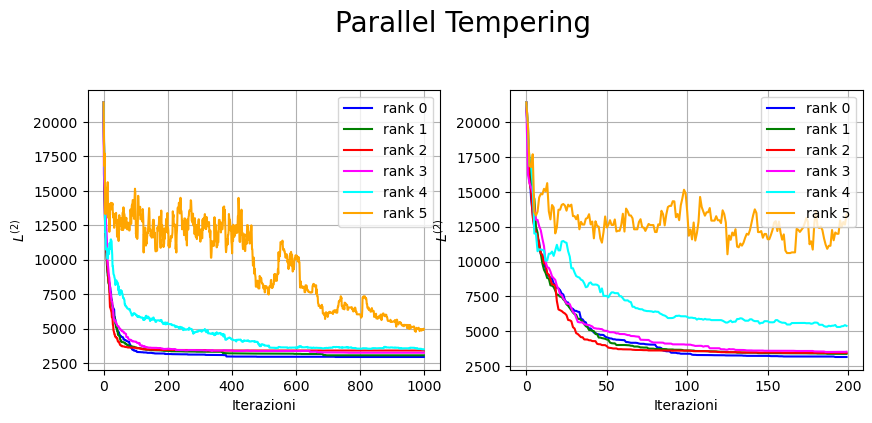

In [13]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'magenta', 'cyan', 'orange']
y = []

fig = plt.figure(figsize = (10, 8))
plt.subplot(2, 2, 1)
for i in range(6):
    a = np.loadtxt('LSN_lecture_10/path_best_mpi_core'+str(i)+'.dat', usecols = (1), unpack = 'true')
    y.append(a)
    plt.plot(a, label = 'rank '+str(i), color = colors[i])
    
plt.xlabel('Iterazioni')
plt.ylabel('$ L ^{(2)}$')
plt.legend()
plt.grid('true')

plt.subplot(2, 2, 2)
for i in range(6):
    x = np.arange(0, 200)
    plt.plot(x, y[i][0:200], label = 'rank '+str(i), color = colors[i])
plt.xlabel('Iterazioni')
plt.ylabel('$ L ^{(2)}$')
plt.legend()
plt.grid('true')

plt.suptitle('Parallel Tempering', size = 20)
plt.show()

In figura possiamo osservare la convergenza delle migliori stime di ciascun rank ad un valore prossimo a $\sim2900$. Nell'ingradimento a fianco è possibile osservare che le migliori stime non hanno un andamento costante, ma presentano come dei piccoli rigonfiamenti. Questi sono gli effetti degli scambi adiacenti che sono in grado di scostare i rank più freddi da posizioni delle quali la funzione costo sembrava iniziare a stazionare, collocandola su una nuova legge di convergenza. 

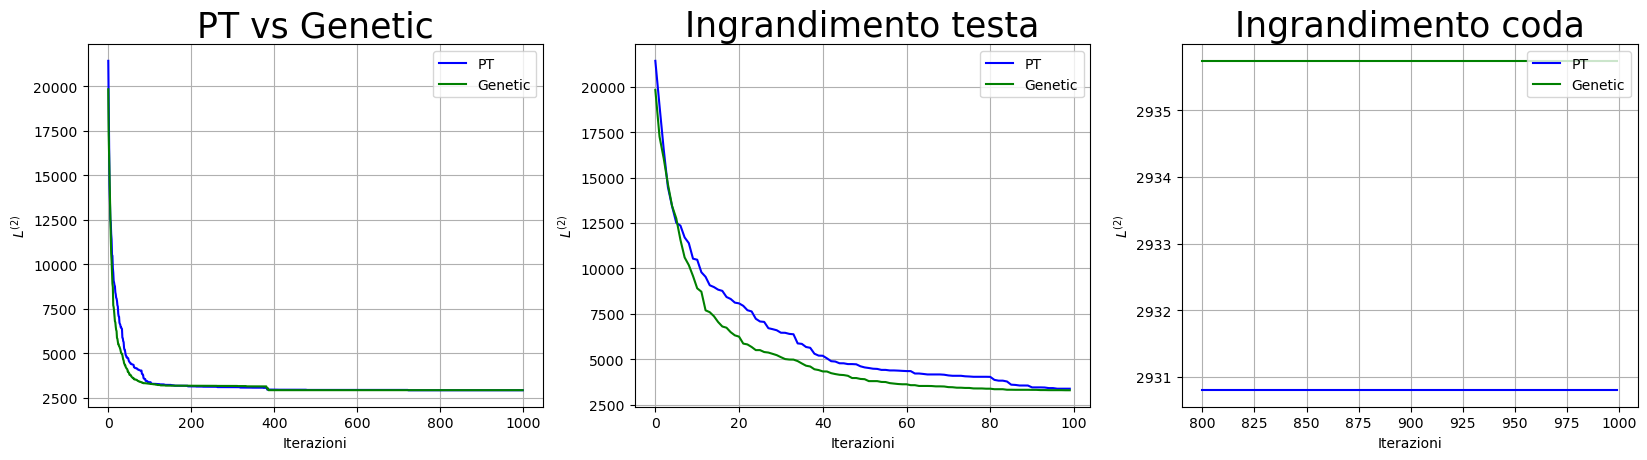

In [15]:
fig = plt.figure(figsize = (20, 16))
plt.subplot(3, 3, 1)
plt.plot(y[0], label = 'PT', color = 'b')
g = np.loadtxt('LSN_lecture_10/path_best.dat', usecols = (1), unpack = 'true')
plt.plot(g, label = 'Genetic', color = 'g')
plt.xlabel('Iterazioni')
plt.ylabel('$ L ^{(2)}$')
plt.legend()
plt.grid('true')
plt.title('PT vs Genetic', size = 25)

plt.subplot(3, 3, 2)
x= np.arange(0,100)
plt.plot(x, y[0][0:100], label = 'PT', color = 'b')
plt.plot(x, g[0:100], label = 'Genetic', color = 'g')
plt.xlabel('Iterazioni')
plt.ylabel('$ L ^{(2)}$')
plt.legend()
plt.grid('true')
plt.title('Ingrandimento testa', size = 25)

plt.subplot(3, 3, 3)
x= np.arange(800,1000)
plt.plot(x, y[0][800:1000], label = 'PT', color = 'b')
plt.plot(x, g[800:1000], label = 'Genetic', color = 'g')
plt.xlabel('Iterazioni')
plt.ylabel('$ L ^{(2)}$')
plt.legend(loc='upper right')
plt.grid('true')
plt.title('Ingrandimento coda', size = 25)


plt.show()

Nella figura sopra vediamo visualizzato il confronto tra la simulazione di Parallel Tempering e un normale algoritmo genetico su una popolazione di $3000$ individui. A fronte di un patrimonio genetico più vario (il genetico effettua crossing-over tra tutti i membri della popolazione, mentre PT esegue solo scambi adiacenti), il genetico sembra convergere più velocemente in una prima fase. Dopo un certo numero di generazioni tuttavia non è in grado di liberarsi da una configurazione metastabile nella quale si è imbattutto, convergendo ad un valore errato.

Il PT invece, pur con tempi di convergenza più lunghi, sembra riuscire agilmente a superare questo ostacolo. (Senza tener conto che, grazie alla parallelizzazione, i tempi di esecuzione sono fino a 6 volte inferiori!).

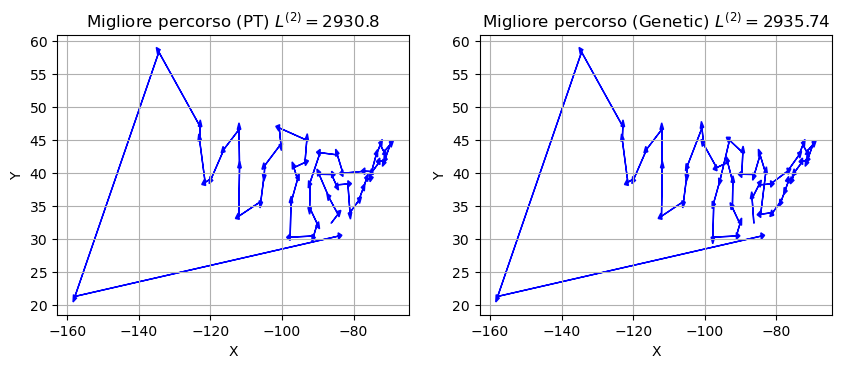

In [18]:
fig = plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
# leggi i dati dai file
data1 = np.loadtxt("LSN_lecture_10/best_final_path_mpi.dat")

# Estrai le coordinate X e Y dai dati
x_coords = data1[:,0]
y_coords = data1[:,1]

# Crea il grafico
for i in range(1, len(x_coords)):
    dx = x_coords[i] - x_coords[i-1]
    dy = y_coords[i] - y_coords[i-1]
    plt.arrow(x_coords[i-1], y_coords[i-1], dx, dy, head_width=1, head_length=1, fc='blue', ec='blue')


plt.xlabel("X")
plt.ylabel("Y")
plt.title("Migliore percorso (PT) $L ^{(2)} = $"+str(y[0][-1]))
plt.grid(True)

plt.subplot(2,2,2)
# leggi i dati dai file
data1 = np.loadtxt("LSN_lecture_10/best_final_path.dat")

# Estrai le coordinate X e Y dai dati
x_coords = data1[:,0]
y_coords = data1[:,1]

# Crea il grafico
for i in range(1, len(x_coords)):
    dx = x_coords[i] - x_coords[i-1]
    dy = y_coords[i] - y_coords[i-1]
    plt.arrow(x_coords[i-1], y_coords[i-1], dx, dy, head_width=1, head_length=1, fc='blue', ec='blue')


plt.xlabel("X")
plt.ylabel("Y")
plt.title("Migliore percorso (Genetic) $L ^{(2)} = $"+str(g[-1]))
plt.grid(True)
# Mostra il grafico
plt.show()

Riportiamo infine i due migliori percorsi stimati da entrambi gli algoritmi. Osserviamo che entrambi sono ancora lontani dalla soluzione del problema, pertanto sarà necessario aumentare la grandezza della simulazione.

Per le considerazioni fatte sopra però, sarà opportuno impiegare un PT che sfrutti un maggior numero di nodi e sviluppi un maggior numero di iterazioni.

## 11. Sbagliando si impara <a id='##-11'></a>

Vogliamo quindi ora compiere un ulteriore passo nella nostra trattazione di problemi di ottimizzazione: abbiamo visto vari algoritmi che ci permettono di ricercare soluzioni a patto di sapere ben *rappresentare* il problema (mediante, ad esempio la definizione di dei cromosomi) e *valutare* la bontà dei risultati per poi prodigarci direttamente nella vera e propria *ottimizzazione*.

Come abbiamo potuto osservare, non sempre questo tipo di algoritmi sono in grado di restituire risultati estremamente soddisfacenti, soprattutto aumentando il numero di parametri da ottimizzare. 

In questa contesto si inseriscono le tecniche di **Machine Learning ML**, che non solo si propongono di trovare la soluzione ad un determinato problema, ma di farlo imparando nel mentre informazioni sul modello e usandole a proprio vantaggio (come se un SA valutasse, in esecuzioni consecutive, la bontà delle leggi con cui fa scalare le temperatura per determinare quella ottimale per raggiungere la convergenza). 

#### 11.0.1 Tarocchi

Vogliamo quindi affrontare **problemi di predizione** sfruttando gli strumenti di *Deep Learning* forniti dalla API Keras. L'idea è, a partire da un campione di dati $(x_i,y_i)$, determinare l'eventuale forma funzionale $f(x)$ utilizzata per generare il campione secondo: 

$$
    y_i= f(x_i) + \eta_i,
$$

dove le $\eta_i$ costituiscono un contributo di rumore bianco, ovvero con $\langle \eta_i \rangle=0$, $\langle \eta_i \eta_j \rangle = \delta_{ij}$.

Nelle sezioni seguenti genereremo dati secondo funzioni test $f$ ben conosciute e verificheremo le capacità della rete neurale nel riconoscere il modello al variare dei parametri che la costituiscono.
Partiremo da un certo numero di dati test dove la rete neurale inizierà a valutare le sue capacità nel compiere il fit, generando a sua volta elementi del modello (almeno secondo la sua prezione) e cercando ogni volta di minimizzare una determinata funzione di costo tra i dati analizzati e quelli generati (tra le più comuni ricordiamo la media quadratica degli scarti MSE).

Successivamente effettueremo la predizione su un secondo set di dati inedito (per verificare che la rete abbia effettivamente imparato a svolgere questo compito) chiedendo alla rete di generare dati che secondo lei appartengono al modello in esame e valutandone la compatibilità analogamente.

### 11.1 Rette

Iniziamo quindi a considerare il semplice caso:
$$ f(x) = 2x+1$$

e iniziamo con il rappresentarla e generare i campioni per il test (5000) e la validazione finale (50), per poi predirne i valori in $[-1;1]$.

2023-06-19 18:35:41.898114: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


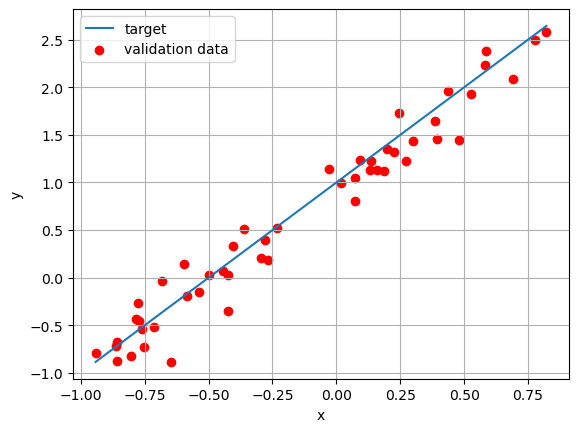

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In questo caso abbiamo posto $\sigma=0.2$, evitando di produrre un campione o troppo diffuso (su cui quindi la rete neurale faticherà a determinare con precisione i parametri della retta) o eccessivamente preciso (che invece non fornirebbe alla rete una varietà necessaria per eseguire la regressione su un set di dati qualsiasi).

Procediamo quindi con il comporre il modello:

In [38]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Per i nostri scopi basta una semplice rete neurale sequenziale dotata di un solo neurone con funzione di risposta lineare, il quale restituisce per definizione ad un input $x$ un output del tipo $wx+b$ che la rete cercherà di ottimizzare (che confermato dallo specchietto sopra prodotto da ```model.summary()```)

La funzione costo è stata fissata come MSE, mentre l'opzione ```optimizer``` definisce la scelta dell'algoritmo impiegato per l'evoluzione dei parametri, in questo caso lo *Stochastic gradient descent SGD*, che calcola sbrigativamente il grediente della funzione costo per compiere una mossa in quella direzione. L'opzione ```metrics```, infine, specifica la funzione con la quale valuteremo la bontà del fit proposto dalla rete. 

Procediamo ora con l'allenamento del modello. Effettueremo 50 *epoche* di training, nelle quali modello dividerà il campione di test in *batch* di 32 dati ciascuna e su cui performerà l'allenamento, determinando i valori candidati dei parametri. 

In [39]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          verbose =0,   # in tutte le simulazioni seguenti è settata a 0 per evitare di riempire il notebook
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
w, b = model.get_weights()
print('Funzione stimata: ')
print(str(w)+'*x + '+str(b))

Funzione stimata: 
[[2.002076]]*x + [1.0011624]


Effettuiamo infine la valutazione della nostra predizione:

2/2 [==============================] - 0s 2ms/step - loss: 1.8351e-06 - mse: 1.8351e-06
 Performance : 
Test loss: 1.8351155404161545e-06
Test accuracy: 1.8351155404161545e-06
4/4 [==============================] - 0s 834us/step


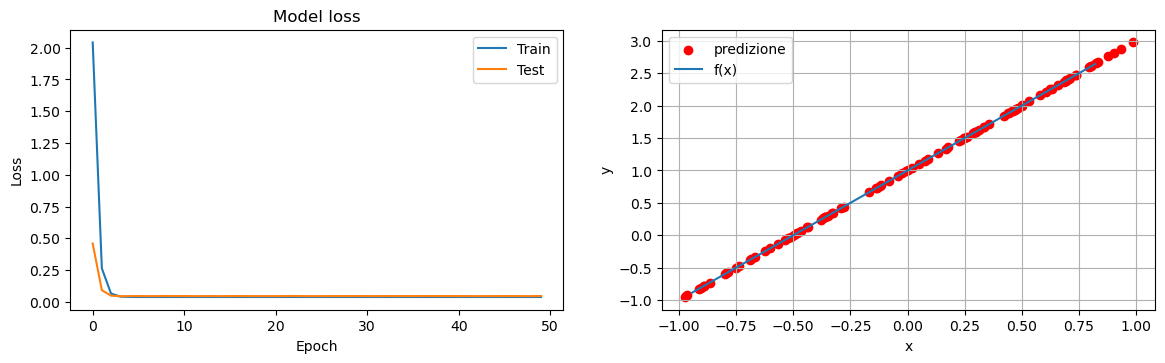

In [40]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print('========================================\n Performance : ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(2, 2, 2)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label = 'predizione')
plt.plot(x_valid, y_target, label = 'f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Osserviamo che, all'aumentare della diffusione del campione $\sigma$, la rete richiede un maggiore allenamento che può essere fornito o aumentanto il campione di training o il numero di epoche con la prima opzione che, per questo caso in particolare, sembra essere più efficace.

### 11.2 Polinomi

Se l'architettura della rete è risultata piuttosto immediata per il fit di una retta, notiamo in realtà che proprio questo sia uno degli ingredienti fondamentali al corretto funzionamento di una rete neurale.

Consideriamo quindi ora il caso di una funzione:

$$f(x) = 4-3x-2x^2+3x^3 $$

Non esistendo funzioni di attivazione cubiche, la struttura della rete è diventata non banale. Una scelta plausibile potrebbe essere rappresentata dalla scelta di neuroni con funzioni di risposta di tipo ```tanh```, coordinati da un quarto che ne organizza le posizioni nello spazio. Effettuiamo il training su un set di 100000 punti, in 50 epoche dividendo in 32 batch.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
 Performance (dati di validazione) : 
Test loss: 0.050523314625024796
Test accuracy: 0.050523314625024796
 Performance : 
Test loss: 0.012071522884070873
Test accuracy: 0.012071522884070873
4/4 [==============================] - 0s 827us/step


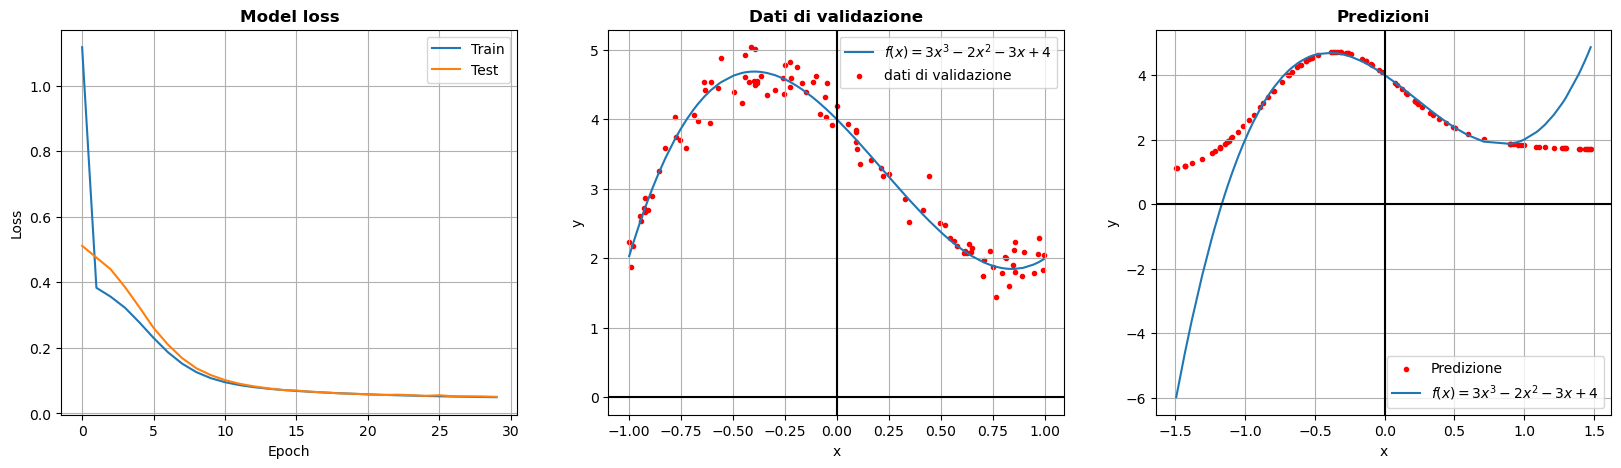

In [41]:
def f(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(3, input_shape=(1,), activation ='tanh'))
model.add(Dense(1, activation ='elu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          verbose = 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# print performance
print('========================================\n Performance (dati di validazione) : ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

# print performance
print('========================================\n Performance : ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.figure(figsize=(20,5))

# Plot training & validation loss values
plt.subplot(1,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()

# generate predictions
x_predicted = np.random.uniform(-1.5, 1.5, 100) 
y_predicted = model.predict(x_predicted) # ha dimensione diversa da x_predicted se non finisco con un solo nodo

# (re)plot validation and target dataset
plt.subplot(1,3,2)
plt.plot(x_valid, y_target, label = "$f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='dati di validazione ')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dati di validazione", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()

# plot
plt.subplot(1,3,3)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Predizione")
x_predicted.sort()
y_target_ext = f(x_predicted) # target polinomial function
plt.plot(x_predicted, y_target_ext, label = "$f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predizioni", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

Con questo tipo di architettura, seppur non sofisticatissima, riusciamo a ottenere predizioni con un'accuratezza dell'ordine di $0.01$. La scelta della funzione di attivazione per il quarto neurone è preferibile come ```relu``` o ```elu``` o lineare, mentre scelte come ```sigmoid``` o ```tanh``` danneggiano gravemente il funzionamento della rete. 

La migliore scelta per l'ottimizzatore resta ```sgd``` con risultati simili ottenuti da ```adam```, a fronte delle pessime performance di ```adadelta``` e ```adagrad```. Le funzioni costo più performanti sono ```mse``` o ```mae```.

Osserviamo che le predizioni del modello sono accurate solo nell'intervallo su cui eseguito il test, mentre la funzione viene approssimata costante al di fuori (stiamo usando, d'altronde, delle tangenti iperboliche).

Proviamo ora a costruire un modello più complesso e confrontare i risultati:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 6         
                                                                 
 dense_4 (Dense)             (None, 20)                80        
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 947
Trainable params: 947
Non-trainable params: 0
_________________________________________________________________
 Performance (dati di validazione) : 
Test loss: 0.04581

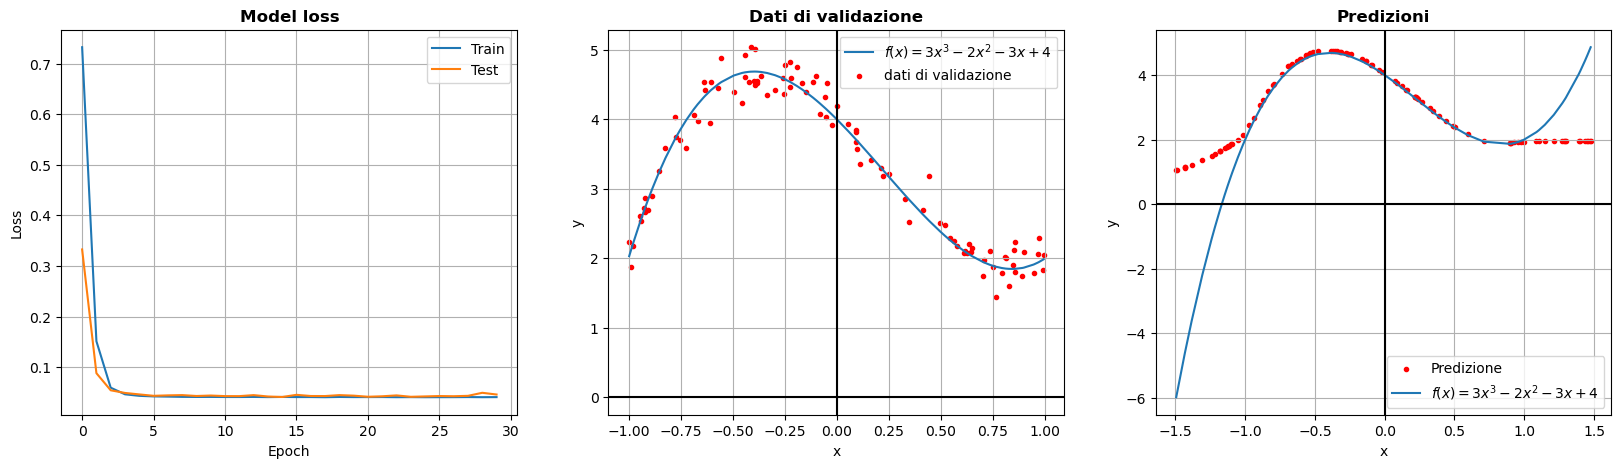

In [42]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(3, input_shape=(1,), activation ='tanh'))
model.add(Dense(20, activation ='relu'))
model.add(Dense(20, activation ='relu'))
model.add(Dense(20, activation ='relu'))
model.add(Dense(1, activation ='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          verbose = 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# print performance
print('========================================\n Performance (dati di validazione) : ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

# print performance
print('========================================\n Performance : ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.figure(figsize=(20,5))

# Plot training & validation loss values
plt.subplot(1,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()

# generate predictions
x_predicted = np.random.uniform(-1.5, 1.5, 100) 
y_predicted = model.predict(x_predicted) # ha dimensione diversa da x_predicted se non finisco con un solo nodo

# (re)plot validation and target dataset
plt.subplot(1,3,2)
plt.plot(x_valid, y_target, label = "$f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='dati di validazione')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dati di validazione", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()

# plot
plt.subplot(1,3,3)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Predizione")
x_predicted.sort()
y_target_ext = f(x_predicted) # target polinomial function
plt.plot(x_predicted, y_target_ext, label = "$f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predizioni", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

Abbiamo ora costruito una rete che, al un primo strato di 3 neuroni ```tanh``` associa poi altri 3 strati nascosti di neuroni ```relu```, prima di concludere con l'ultimo strato comune al modello precedente, per un totale di 947 parametri.
Questa scelta è dettata dal fatto che l'utilizzo di *hidden layers* aumenta enormemente i poteri di rappresentazione. \
È stata provata, infatti, la validità di un **teorema di approssimazione** che stabilisce che la sola presenza di un singolo strato nascosto permette a una rete di approssimare una qualsiasi funzione continua in più variabili con precisione arbitraria (Cybenko, 1989, Hornik, 1991).
Non solo, una sua successiva generalizzazione sancisce la possibilità di approssimare qualsiasi funzione *Lebesgue integrabile* su dominio n-dimensionale facendo uso di strati nascosti di larghezza n+4 dotati di funzioni di attivazione ```relu``` ( Lu et al. , 2017).

Questa variante permette, in media, il dimezzamento della *loss*, a fronte però dell'introduzione di 944 parametri in più. L'aggiunta di ulteriori strati nascosti, o l'aumento di popolazione di quelli già esistenti presentano effetti simili in termini di accuratezza, che comunque non scende di molto rispetto ai risultati ottenuti. 

Osserviamo infine che, nonostante l'architettura estremamente più complessa, la predizione della rete continua a fallire al di fuori dell'intervallo di allenamento.

### 11.3 Superfici

Forti delle conoscenze acquisite estendiamo ora l'azione della nostra rete neurale al caso del fit della funzione bidimensionale:
$$f(x,y) = \sin(x^2+y^2)$$
nell'intervallo $[-3/2,3/2]\times[-3/2,3/2]$, su un campione di 100000 dati di training in 30 epoche, dividendo in batch da 32.

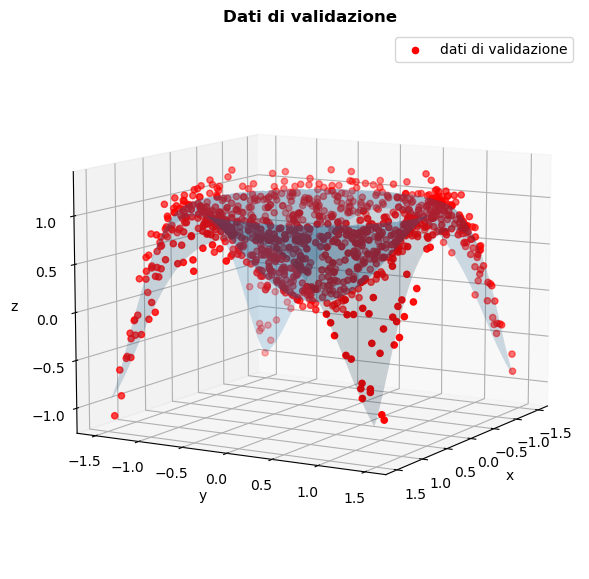

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                96        
                                                                 
 dense_9 (Dense)             (None, 40)                1320      
                                                                 
 dense_10 (Dense)            (None, 40)                1640      
                                                                 
 dense_11 (Dense)            (None, 40)                1640      
                                                                 
 dense_12 (Dense)            (None, 40)                1640      
                                                                 
 dense_13 (Dense)            (None, 1)                 41        
                                                                 
Total params: 6,377
Trainable params: 6,377
Non-traina

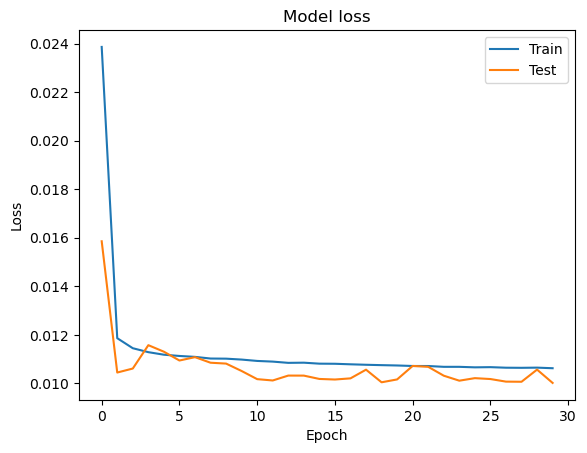

32/32 [==============================] - 0s 606us/step


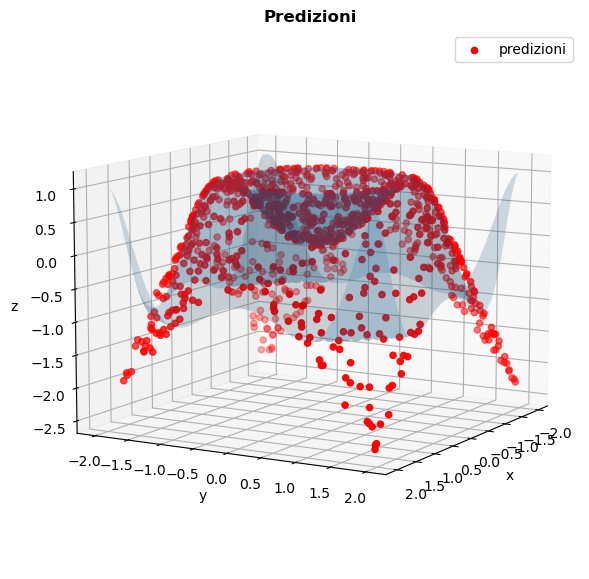

In [43]:
from mpl_toolkits.mplot3d import Axes3D


# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 100000)
x_valid = np.random.uniform(-1.5, 1.5, 1000)

y_train = np.random.uniform(-1.5, 1.5, 100000)
y_valid = np.random.uniform(-1.5, 1.5, 1000)

XY_train = np.column_stack((x_train,y_train))      # 'model.fit' vuole in input delle matrici
XY_valid = np.column_stack((x_valid,y_valid))      

def f(x, y) :
    return np.sin((x**2+y**2))

z_target = f(x_valid, y_valid)

sigma = 0.1 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(f(x_train, y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

# plot validation and target dataset
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection='3d')
x = np.arange(-1.5, 1.5, 0.05)
y = np.arange(-1.5, 1.5, 0.05)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, f(X,Y), alpha = 0.2)

ax.scatter(x_valid, y_valid, z_valid, color='r', label='dati di validazione')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Dati di validazione', fontweight = "bold")
ax.grid(True)
ax.view_init(10, 30)
plt.show()

# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(2,), activation ='tanh'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='nadam', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=XY_train, y=z_train, 
          batch_size=32, epochs=30,
          verbose = 0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(XY_valid, z_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(XY_valid, z_valid, batch_size=32, verbose=1)

# print performance
print('========================================\n Performance (dati di validazione): ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(XY_valid, z_valid, batch_size=32, verbose=1)

# print performance
print('========================================\n Performance : ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-2.0, 2.0, 1000)
y_predicted = np.random.uniform(-2.0, 2.0, 1000)
XY_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(XY_predicted)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_predicted, y_predicted, z_predicted[:,0],color='r', label = 'predizioni')
x = np.arange(-2.0, 2.0, 0.05)
y = np.arange(-2.0, 2.0, 0.05)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, f(X,Y), alpha = 0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.view_init(10, 30)
plt.title('Predizioni', fontweight = "bold")
plt.grid(True)
plt.show()

Si è quindi costruita una rete neurale con la seguente struttura:
- 32 neuroni di tipo ```tanh``` per costruire 8 funzioni gradino bidimensionali
- 4 hidden layers da 40 neuroni tipo ```relu``` per aumentare il potere di rappresentazione
- 1 strato finale da 1 neurone ```relu``` per raccogliere tutte le informazioni

Osserviamo che una diretta applicazione di quanto imparato nel caso unidimensionale ci ha permesso di implementare con profitto il fit multidimensionale, anche in questo caso, però, la predizione resta sensata solo all'interno dell'intervallo di training.

## 12. Agnizione <a id='##-12'></a>

Se le capacità pressocchè universali delle reti neurali di svolgere fit di funzioni n-dimensionali sono già di per loro una ragione estremamente convincente per incentivarne lo studio e l'utilizzo in ambito fisico (ma non solo), ciò che mostreremo in questa sezione ci convincerà della loro fondamentale importanza nello sviluppo della storia tecnologica dell'uomo. 

L'obiettivo di questo esercizio sarà infatti costruire delle reti neurali in grado di **riconoscere delle immagini** a partire dal facile esempio di cifre manoscritte da 1 a 9, contenute nel database MNIST.
Questo database raccoglie $70000$ cifre salvate come immagini di $28\times28$ pixel. Ciascun pixel può assumere una tra $256$ sfumature di grigio identificate da un valore intero in $\{0;...;255\}$. L'obiettivo è quello quindi di condurre un generico **problema di classificazione** di dati in 10 categorie differenti (le cifre).

In [44]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

Procediamo quindi con l'importare i dati da ```mnist``` e convertirli nel formato adeguato per essere processati dalla rete, in particolare la matrice dei pixel ```X``` verrà convertita in un singolo vettore di $28\cdot28 = 784$ componenti di reali in $[0;1]$, mentre l'identità del numero ```Y``` verrà convertita in un vettore binario di 9 componenti grazie al metodo ```to_categorical()```(dove il valore 1 nella posizione i-esima identifica il numero come la cifra i-esima).

In [45]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

### 12.1 Deep Neural Networks

Implementiamo ora una DNN che sia in grado di svolgere il compito prefissato. A due strati di neuroni ```relu``` aggiungiamo uno strato di ```Dropout``` che "spegne" dei neuroni (solo in fase di allenamento), prevenendo casi di overfitting dei dati (altrimenti la rete non riuscirà a riconoscere cifre scritte con calligrafie anche leggermente differenti dallo standard) e uno strato di 10 neuroni con funzione di attivazione ```softmax``` deputati al riconoscimento delle dieci categorie (con il risultato più netto possibile, perciò si è scelta questa funzione di attivazione).

In [46]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


Si procede poi alla compilazione del modello ed al suo allenamento, per il quale sono state scelte 30 epoche e divisioni in batch da 32.

Model compiled successfully and ready to be trained.
313/313 [==============================] - 0s 1ms/step - loss: 0.1558 - acc: 0.9807

 Performance : 
Test loss: 0.1557590514421463
Test accuracy: 0.9807000160217285


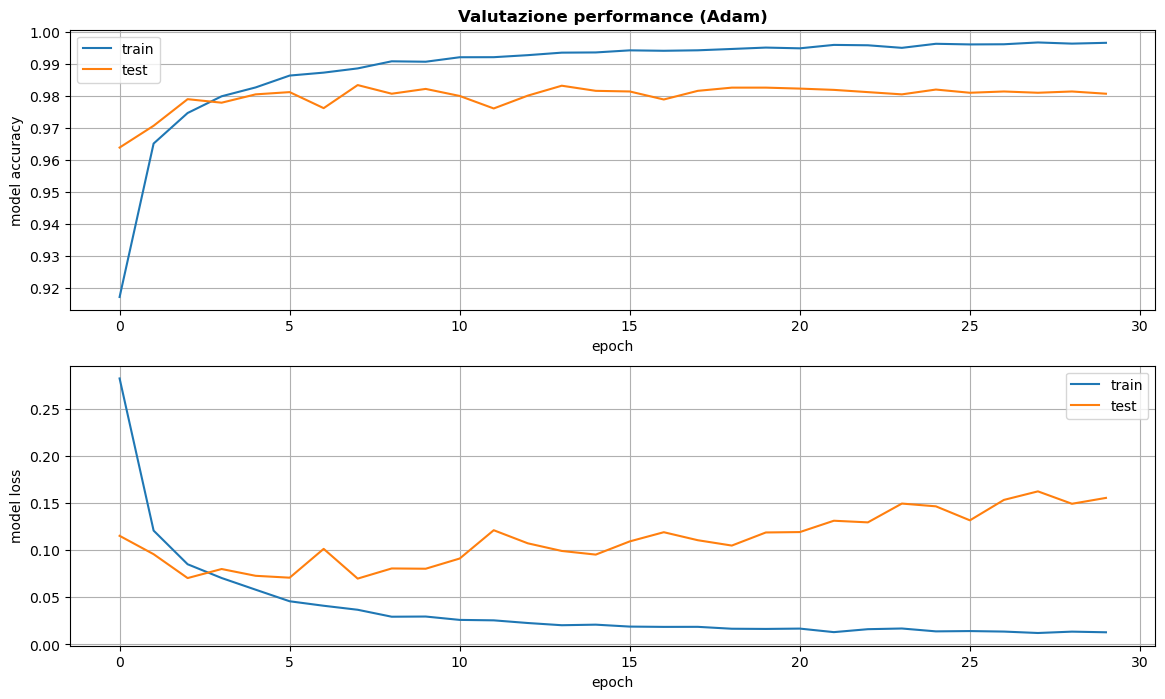

313/313 [==============================] - 0s 1ms/step
 Predizioni : 


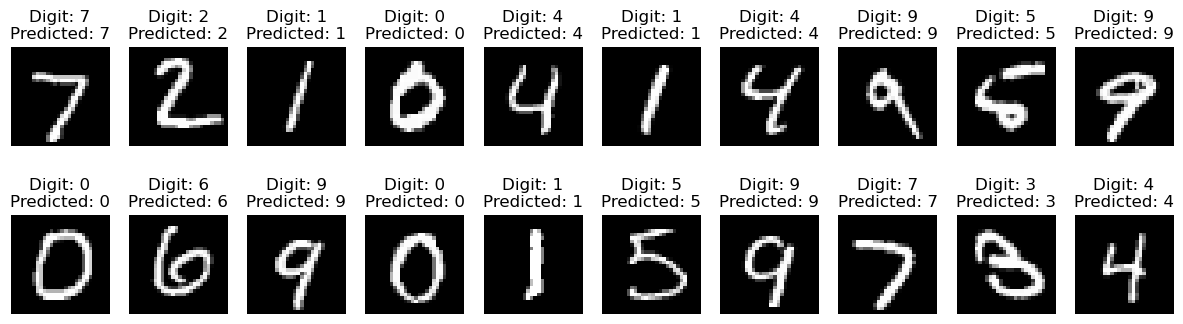

In [47]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    # Adam, RMSprop, Adamax, Nadam prevede anche il 5, Adadelta lo riconosce come 2
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(), 
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

# training parameters
batch_size = 32 # ma è un numero sensato? potrei non trovarle tutte e 10
epochs = 30     # è in realtà positivo perchè evita che la rete possa andare per "esclusione"

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('================================================================================\n Performance : ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

plt.figure(figsize=(14,8))
# summarize history for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid('true')
plt.title('Valutazione performance (Adam)', fontweight = 'bold')

# summarize history for loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid('true')
plt.show()

predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
print('================================================================================\n Predizioni : ')
plt.figure(figsize=(15,4)) 
for i in range(20):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Nella simulazione sopra si è utilizzata la funzione di loss ```categorical_crossentropy```, particolarmente indicata per i problemi di classificazione in cui è necessario identificare i valori di una variabile tra $\{0;1\}$. Come ottimizzatore è stato scelto ```Adam```, una variante di ```sgd``` che la documentazione di Keras definisce "particolarmente azzeccata per problemi ampi in termini di dati/parametri". 

Come possiamo osservare, la scelta è decisamente azzeccata dal momento che nelle 30 epoche di allenamento è riuscita a superare un notevolissimo 99% di precisione, oltre ad essere in grado di riconoscere alla perfezione i 20 valori riportati a schermo (alcuni non semplicissimi nemmeno ad occhio umano).

![SGD](LSN_lecture_12/SGD.png)

Di tutto rispetto sarebbe stata anche la scelta di ```sgd``` stesso che comunque in 20 epoche riesce a superare il 97% di accuratezza, tuttavia faticandono a riconoscere quello strano 5 nella prima riga. Simili risultati forniscono le scelte di ```RMSprop```, ```Adamax``` e ```Nadam```.

![Adadelta](LSN_lecture_12/Adadelta.png)
Sconsigliata invece è la scelta di ```Adadelta``` che sembrerebbe piuttosto "allergico" ai 5.

### 12.2 Convolutional neural networks

Finora abbiamo approcciato il problema del riconoscimento delle cifre in modo generico senza tenere in conto di eventuali proprietà speciali degli oggetti studiati. 

I dati caratterizzanti della cifra 9, per esempio, sono un cerchio e una stanghetta, indipendentemente dalla loro orientazione, tutte le cifre che seguono, infatti, sono 9, aldilà della loro particolare inclinazione o posizione (eccetto se rovesciati, chiaramente!):

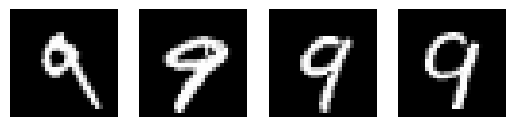

In [48]:
num = [7, 9, 12, 16]
for i in range(4):    
    ax = plt.subplot(2, 4, i + 1)    
    plt.imshow(X_test[num[i], :, :, 0], cmap='gray')       
    plt.axis('off') 

Vogliamo quindi costruire delle reti neurali "invaranti per traslazioni" che sappiano riconoscere le correlazioni locali tra pixel di una stessa cifra, al di là della particolare posizione.

Per fare questo impiegheremo i seguenti strati di neuroni:
- Uno strato *convoluzionale* bidimensionale: che applica una serie di filtri (nel nostro caso 10) che scorrono su sottoregioni dei nostri dati ed effettuano la convoluzione tra i pesi del filtro e quelli della regione corrispondente
- Uno strato di *pooling*: che riassume i dati in formati più piccoli, identificando informazioni per sottozone più ampie dei singoli pixel ed evitando il rischio di overfitting. In questo caso blocchi $2\times2$.
- Uno strato *flatten*: che ristabilisce i dati nella corretta dimensione dopo i due strati precedenti
- Due strati densi di ```relu``` come nel caso DNN
- Uno strato di 10 ```softmax``` per la determinazione delle cifre

In [55]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#-----------------------------------------------
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#-----------------------------------------------

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(400, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model architecture created successfully!')
print('Model compiled successfully and ready to be trained.')

Model architecture created successfully!
Model compiled successfully and ready to be trained.


Procediamo quindi all'allenamento del modello per effettuare un confronto alla pari con la DNN della sezione precedente.

313/313 [==============================] - 1s 3ms/step - loss: 0.0383 - acc: 0.9885

 Performance : 
Test loss: 0.03831474483013153
Test accuracy: 0.9884999990463257


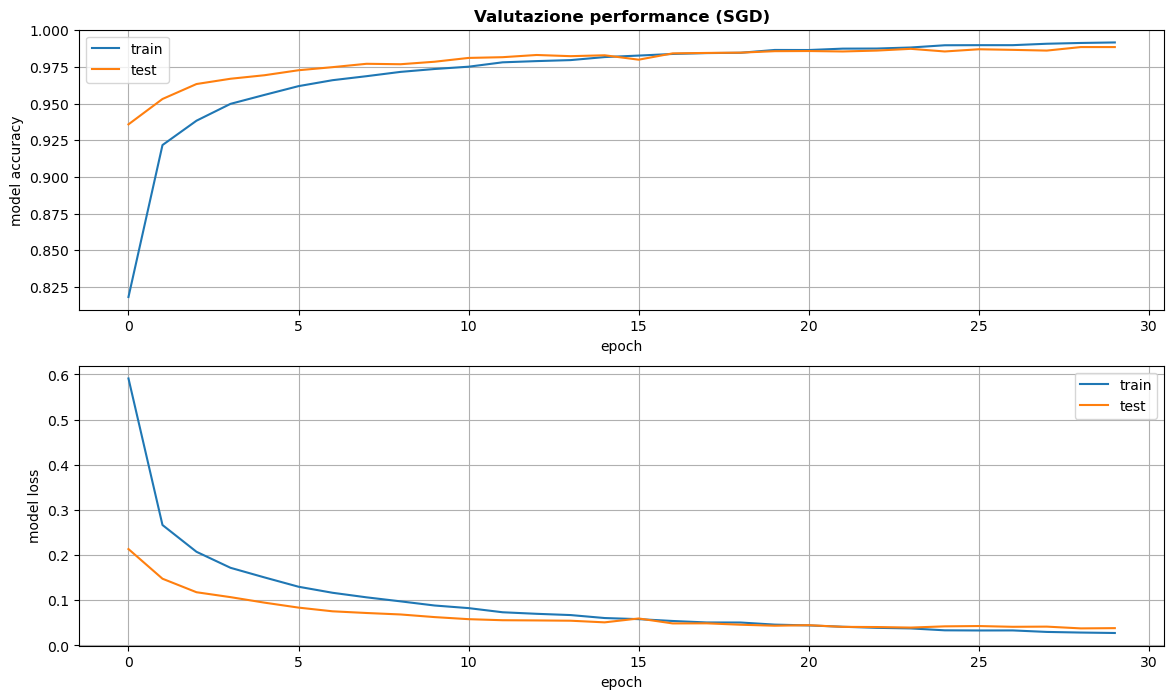

313/313 [==============================] - 1s 3ms/step
 Predizioni : 


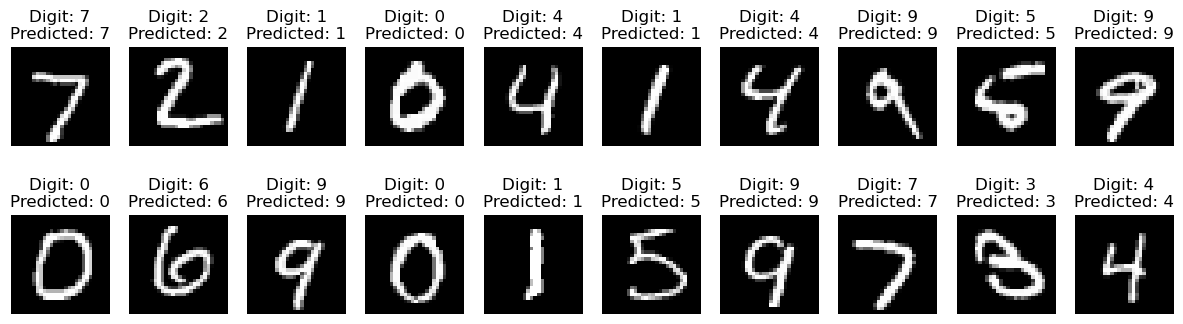

In [56]:
# training parameters
batch_size = 32
epochs = 30

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('================================================================================\n Performance : ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

plt.figure(figsize=(14,8))
# summarize history for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid('true')
plt.title('Valutazione performance (SGD)', fontweight = 'bold')

# summarize history for loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid('true')
plt.show()

predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
print('================================================================================\n Predizioni : ')
plt.figure(figsize=(15,4)) 
for i in range(20):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In questo caso, seppur a fronte di una minore accuratezza, preferiamo ```sgd``` ad ```Adam```, che al contrario non è stato in grado di identificare il 3 della seconda riga, scambiandolo per un 8 (fatto comunque decisamente comprensibile, anche per quanto detto finora sulle CNN).

### 12.3 Scontro finale

Procediamo quindi al test definitivo che possa sancire la supremazia dell'uno e dell'altro algoritmo. Sono state preparate con **gimp** 10 immagini raffiguranti le 10 cifre anche in formati insoliti rispetto a quelli contenuti nel MNIST. L'algoritmo che meglio performerà sarà degno dell'applicazione in lavori futuri di massima importanza (magari potrà essere evoluto fino all'essere preposto al testing dei CAPTCHA).

1/1 [==============================] - 0s 21ms/step
 Predizioni DNN : 


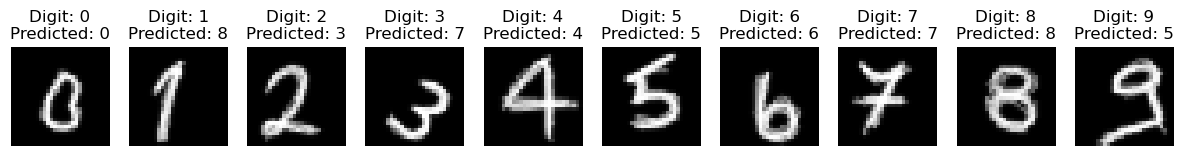

1/1 [==============================] - 0s 22ms/step
 Predizioni CNN : 


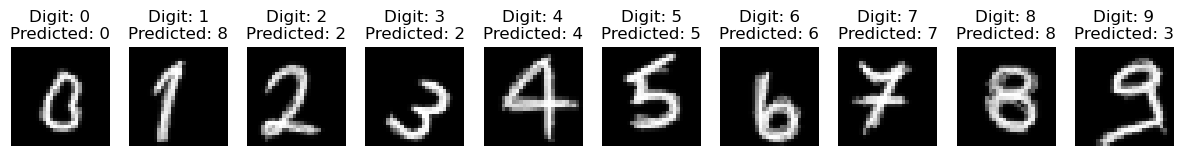

In [57]:
from PIL import Image
import os

data = []

for i in range(10):
    digit_filename = "LSN_lecture_12/image"+str(i)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    im = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            im[i,j]=pix[j,i]/ 255
    data.append(im)

# DNN predictions
predictions = []
for i in range(10):
    data[i] = data[i].reshape(1,xdim*ydim)
    pred_0 = model_DNN.predict(data[i])
    predictions.append(pred_0)
    data[i] = data[i].reshape(xdim,ydim)

print('================================================================================\n Predizioni DNN : ')
plt.figure(figsize=(15,4)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i], cmap='gray')    
    plt.title("Digit: "+str(i)+"\nPredicted: {}".format(np.argmax(predictions[i])))   
    plt.axis('off') 
plt.show()

# CNN predictions
predictions = []
for i in range(10):
    data[i] = data[i].reshape(1,xdim,ydim,1)
    pred_0 = model_CNN.predict(data[i])
    predictions.append(pred_0)
    data[i] = data[i].reshape(xdim,ydim)

print('================================================================================\n Predizioni CNN : ')
plt.figure(figsize=(15,4)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i], cmap='gray')    
    plt.title("Digit: "+str(i)+"\nPredicted: {}".format(np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

![](LSN_lecture_12/Risultati_confronto.png)
Osserviamo che le prestazioni dei due algoritmi restano simili, con la DNN che però sembra faticare di più a riconoscere numeri ruotati o deformati, che la CNN invece riconosce ottimamente, faticando nella determinazione di cifre dalla scrittura insolita.